# Author: Conrado Zárate Badillo.
## Creation date:  Monday July 04, 2022.

<A name="TableOfContents"> </A> <h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
<li><a href="#ProblemContext">Predictions of fraud in the presentation of claims of the "Ideal Insurance Company" or IIC</a></li>
<a href="#LearnedInsights"><span style='background:aqua'>10 lessons and perspectives learned in this use case</span></a><br>
<a href="#DataFieldFeats">Data File and Features</a><br>
<a href="#Feats1">Description of:Product type, Policy type details, Claim payment type description</a><br>
<a href="#Clues">Immediate possible clues derived from the information provided about the problem</a><br>
<li><a href="#Libraries">Optional Libraries and settings</a></li>
<br><br>    
<li><a href="#EDA1">First EDA</a></li>
<a href="#EDA7Feats">EDA on 7 out of 10 first features and their relationship with fraud</a><br>
&nbsp<a href="#EDA_fraud">Number of frauds and not frauds in the whole dataframe</a><br>
&nbsp<a href="#EDA_tpa">Third Party administrator ID or 'tpa' and its relationship with fraud</a><br>
&nbsp<a href="#EDA_PolicyRef_MemberId">'policy_ref' and 'member_id' and their relationship with fraud</a><br>
&nbsp<a href="#EDA_sex">'sex' and its relationship with fraud</a><br>
&nbsp<a href="#EDA_prod_code">Product Type or 'prod_code' and its relationship with fraud</a><br>
&nbsp<a href="#EDA_policy_type">Policy Type or 'policy_type' and its relationship with fraud</a><br>
&nbsp<a href="#EDA_sum_insured">'sum_insured' and its relationship with fraud</a><br>
<li><a href="#FeatEng1">Feature Engineering 1</a></li>
<a href="#DealingWithMissingData1">Dealing With Missing Data.</a><br>
&nbsp<a href="#ConvertCategoricals1">Convert categorical variables to numerics</a><br>
&nbsp&nbsp<a href="#RemovesCategorical1">Remove categorical features</a><br>
&nbsp&nbsp<a href="#ImputesNaN_SexFctz">Imputes NaN's `sex_fctz` (by sklearn.experimental IterativeImputer) with a balanced ratio similar to the original one of Male/Female ratio= 1.14</a><br>
<a href="#SumInsuredOuliers">Get 'sum_insured' outliers and remove them</a><br>
<a href="#CreateSets1">Create sets and normalize them for SML models</a><br>    
<li><a href="#Summ1"><span style='background:lightblue'>Summary of essential operational processes to construct first ML models related to operate the collected data by the current transaction processing system (ERP) when the policy is issued</span></a></li>
<li><a href="#TwoModels">Supervised ML models of: 1)LogisticRegression and 2)Random Forest Classifier (RFClf)</a></li>
<a href="#EvalMetricsRFClf">Evaluation metrics for best RFClf model: Accuracy, Precision Recal Curve, ROC, AUC</a><br>
<li><a href="#FeatureOptimization1">Feature Optimization 1</a></li>
<a href="#CollinearColumns1">Collinear Columns1</a><br>
<a href="#CorrelationHeatmap1">Correlation Heatmap 1</a><br>
<a href="#ScoresIfDropNegCorrFeats1">Scores if remove columns or features 1</a><br>
<a href="#FeaturesLessImp1">Features that are less important 1</a><br>
&nbsp<a href="#LassoRegression1">Lasso Regression 1</a><br>
&nbsp<a href="#UnivariateSelection1">Univariate Selection by SelectKBest 1</a><br>
&nbsp<a href="#FeatImpFroMod1">Feature Importance from Tree Based Classifiers 1</a><br>
<li><a href="#Conclusions1">Conclusions of part 1</a></li>
    <br><br>
<li><a href="#EDA2">Second EDA supported by the power of feature engineering.</a></li>
<li><a href="#Summ2"><span style='background:lightblue'>Summary of essential cells previous to construct SECOND and THIRD group of SML models(first without considering unbalanced target class, later with oversampling of minority target class).</span></a></li>
<a href="#SMLModels2">SECOND SML models group to test current features importance (all numerical and none explicit date-time) to predict frauds without considering unbalanced target data class.</a><br>    
<a href="#LogReg2">Logistic Regression SML 2 (without considering the unbalanced target data class).</a><br>
<a href="#RFCl2">Random Forest Classifier SML2 (without considering the unbalanced target data class).</a><br>
<a href="#EvalMetsRFClfSML2">Evaluation metrics for RFClf SML2: Accuracy, Precision Recal Curve, ROC, AUC</a><br>    
<li><a href="#SMLModels3">THIRD SML3 models group to test current features importance to predict frauds with random oversampling with imblearn</a></li>
<a href="#LogReg3">Logistic Regression SML 3</a><br>
<a href="#RFCl3">Random Forest Classifier SML3</a><br>
<a href="#EvalMetsRFClfSML3">Evaluation metrics for RFClf SML3: Accuracy, Precision Recal Curve, ROC, AUC</a><br>
<li><a href="#FeatImpFroMod2">Importance  of features with  the balanced target class.</a></li>
<li><a href="#Conclusions2">Conclusions of SECOND and THIRD SML models</a></li>
<br><br>      
<li><a href="#EDA3">Third EDA supported on some of the points (specified by questions) used by the "Ideal Insurance Company" claims processing team to create their fraud score.</a></li>
<a href="#Q1">1. Is the policyholder raising reimbursement claims from a non-network hospital?</a><br>
<a href="#Q2">2. Are multiple claims raised from a single policy (except group policies) or policyholder?</a><br>
<a href="#Q3">3. Are there multiple group claims from the same hospital?</a><br>
<a href="#Q4">4. Is the claim raised close to the policy expiry date?</a><br>
&nbsp<a href="#days_claimdt_endpolicy">Create "days_claimdt_endpolicy" for the elapsed time between claim raised (claim_dt) and 'policy_end_dt'</a><br>  
&nbsp&nbsp<a href="#DropOutlsDaysClaimdtEndPolicy">Drop 3 outliers of "days_claimdt_endpolicy" so they can not impact the scaling in range 0 to 1 to deal with the negative values</a><br>
&nbsp&nbsp<a href="#Scales_DaysClaimdtEndPolicy">Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_endpolicy"</a><br>
<a href="#Q5">5. Is the claim raised close to the policy inception date?</a><br>
 &nbsp<a href="#days_claimdt_startpolicy">Create "days_claimdt_startpolicy" for the elapsed time between claim raised (claim_dt) and inception of policy ('policy_start_dt')</a><br>
&nbsp<a href="#DropOutlsDaysClaimdtStartPolicy">Drop outliers rows of "days_claimdt_startpolicy" so they can not impact the scaling in range 0 to 1 to deal with the negative values</a><br>
&nbsp<a href="#Scales_DaysClaimdtStartPolicy">Scales the values of 'days_claimdt_startpolicy' in range 0 to 1 to deal with the negative values of "days_claimdt_startpolicy"</a><br>
<a href="#Q6">6. Is there no pre- or post-claim to the main claim?</a><br>
<a href="#Q7">7. Is there misrepresentation of material information identified in the report?</a><br>    
<a href="#Q8">8. Was the claim submitted on a weekend?</a><br>
    &nbsp<a href="#claimdt_day_week">Create "claimdt_day_week" to declared the name of the day when raised the claim (claim_dt) </a><br>
    &nbsp<a href="#claimdt_on_weekend">Create "claimdt_on_weekend"as it may be important to determine frauds</a><br>    
<a href="#Q9">9. Are there “costlier” investigations?</a><br>
<a href="#Q10">10. Are there high doctor fees?</a><br>  
<a href="#Q11">11. Was the claim reported one day before discharge?</a><br>
&nbsp<a href="#days_claimdt_discharge">Create "days_claimdt_discharge" for claims raised (claim_dt) before discharged (discharge_dt)</a><br>
&nbsp<a href="#ScaleDaysClaimdtDischarge">Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_discharge"</a><br>
<a href="#Q12">12. Did the claim intimation happen after 48 h of admission?</a><br>
&nbsp<a href="#days_claimdt_admitdt">Create "days_claimdt_admitdt" for claims raised (claim_dt) after admission (admit_dt)</a><br>
&nbsp<a href="#ClaimsSameDayAdmited">Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_admitdt"</a><br>
<li><a href="#SelectingFeatures4Model">Preparing final columns or features  in order to create final models</a></li>
    <a href="#DropingColumns2">Drop all but numeric and 'fctzd' features</a><br>
    <a href="#RearrangeFeatures">Rearranges features to facilitate view of correlation with fraud</a><br>    
<a href="#FeatureSelection">Feature Selection</a><br>
    &nbsp<a href="#CollinearColumns">Collinear Columns</a><br>
    &nbsp<a href="#CorrTest">Test linear correlation</a><br>
    &nbsp<a href="#DropLessCorrWF">For close correlated features each other, removes the less correlated features with fraud</a><br>
    <a href="#CreateSets4SML">Creates sets for Supervised ML models</a><br>   
<li><a href="#BalancedClassModels">With 3 BALANCED techniques on fraud class, creates models of Random Forest Classifier (RFClf)</a></li>
<li><a href="#ROS">Random over-sampling with imblearn</a></li>
    <a href="#RFCl_Resampled">Random Forest Classifier with Random over-sampling</a><br>
    <a href="#FeatImpMod3">Importance of features with balanced target class.</a><br>
    <a href="#4FeatImp"><span style='background:lawngreen'>What if create the model with only 4 out of top 10  important features to fraud?</span></a><br>   
<li><a href="#USTomek">under-sampling Tomek links</a></li>
    <a href="#RFCl_Tomek">Random Forest Classifier with Under-sampling: Tomek links</a><br>
<li><a href="#smote">Synthetic minority over-sampling technique</a></li>
    <a href="#RFClSMOTE">Random Forest Classifier with over-sampling: SMOTE</a><br>
    
<li><a href="#References">References</a></li>
</ul>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="ProblemContext"> </A> <h1>Predictions of fraud in the presentation of claims of the "Ideal Insurance Company" or IIC</h1>

This is about the case study Ideal Insurance on fraud detection, based on the Chapter 25 from the book (["Essentials of Business Analytics"](https://link.springer.com/chapter/10.1007/978-3-319-68837-4_25)).<br> Pochiraju, B., Seshadri, S., & (Editors). (2019). Essentials of Business Analytics: An Introduction to the Methodology and its Applications. Springer.

The dataset was freely obtained from the electronic supplementary material of this chapter's book at:
<https://link.springer.com/chapter/10.1007%2F978-3-319-68837-4_25>

Here the analysis aims to get insights about the problem of noy identifying frauds on settling claims. These claims are screened and qualified as either **Genuine**, **Discuss** or **Investigate** by the current **rule-based decision support systems (RBDSS)** of the **"Ideal Insurance Company"** or (**IIC**). These systems are having a very poor performance specially on claims classified as Genuine but really were frauds. Then a main desired solution is to improve or create a better solution than the current one.<br> **A Supervised Machine Learning (SML) algorithm** could in principle be a good and fair starting point to address this fraud problem.

This approach and development assumes the following:
>1. A gradual learning and knowlege about python features, SML and the business problem and its efforts trying to address the frauds.<br>
>2. A lack of awareness and experience with unbalanced datasets.

So, through incremental analysis, attempts, and their various phases, it is discovered that no tested algorithm with its tight hyperparameter settings could perform better than the current IIS system, until the unbalanced fraud class issue was addressed. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="LearnedInsights"> </A> <h2>10 lessons and perspectives learned in this use case</h2>

The main learnings were the recognition of:<br>
>1)  The need to follow or adhere to a methodology or framework. 
>>For example in this case you can apply the data mining framework known as "CRoss-Industry Standard Process for Data Mining" or (CRIPS-DM).

>2) Try to understand the business problem (phase I CRISP-DM) as well as previous advances in solving it (frequently it is not necessary to reinvent the wheel and to innovate almost always implies the increase of gradual improvements). 
>>Otherwise, there is a high risk of having greater difficulties in the data analysis process, of making mistakes in selecting and choosing the most relevant characteristics that impact fraud, as well as frustration and increased expenses such as time. Specially during this phase is where I clearly saw and understood the danger zone of the "Drew Conway's data science Venn diagram".

>3) Create prototypes or SML models as soon as possible.
>>This implies going through phases II, III, IV and V of the CRISP-DM both sequentially and iteratively, including returning to phase I.
>>Also when trying the prototypes or models of SML, aspects previously not contemplated are rediscovered, research needs, recognition of limitations and errors, as well as knowledge and possibilities of new ideas for both technical improvements (python, SML, etc.) and business problems are accumulated.

>4) Patience and perseverance or discipline.
>> "The path of learning is never-ending. It takes patience, time, commitment, and hard work. The path is not easy but with commitment a lot can be achieved." (Verdhan, 2020). Verdhan, V. (2020). Supervised Learning with Python: Concepts and Practical Implementation Using Python. Apress.

>5) Segment the problem into more logical and manageable pieces.
>>This idea came to me by reading about the IIC's processes over time in the processing of claims.

>6) Trying to classify an imbalanced class  is the worst issue to achieve an acceptable classification model, even with the best feature engineering and optimized hyperparameters selection.

>7) Feature Engineering of converting categorical features to dummy variables for classification SML models, lead to severe performance problems.
>>Then converting categorical to numeric by other techniques different than dummy variables(such as label enconder), might be a much better option.<br>

>8) Despite the significant usefulness and easy of use of "IterativeImputer" to address missing values in a multivariate fashion, I have the impression that there is very little information on examples of how to use it and the problems it helps to solve. 
>> Could this be because it is still in the experimental phase or could it be that there are other better techniques to impute missing values such as "Multivariate Imputation By Chained Equations algorithm" or MICE (perhaps more reliable or easier to use?). Or is it so simple the use of  IterativeImputer that it needs no further explanation? Or perhaps there is a lack of knowledge of the existance of the IterativeImputer and then an opportunity to disseminate and implement it more frequently?<br>
Similar thoughts like mine can be found in https://andymdc31.github.io/missing_data_and_using_sklearns_iterativeimputer

>9) I am very surprised for the predictive power of supervised modeling with machine learning. Since in this case with no more than 10 characteristics the model is highly predictive and even over adjusted. Overfitting can be reduced by selecting the most suitable features and nearly to taste or business needs or machine resources. These highly effective and efficient models are basically achieved with three factors.
>>1) Having selected and applied the appropriate sampling technique (in this case random over-sampling with "RandomOverSampler").

>>2) Having select the most convenient model (in this case "Random Forest Classifier").

>>3) Having Identied the most important characteristics.

>10) Notwithstanding the tremendous predictive power that can be achieved by the simple modeling mentioned above, it is also important to try to incorporate the knowledge or substantive experience of experts and interest groups. For example, for this use case, having analyzed the 12 fraud qualification questions of the IIC system, 6 new characteristics were created. Once the most important features were identified and implemented in a model, only 3 of these new features and one of the existing features were enough to achieve an excellent 99% prediction that can be reduced if necessary.
See <a href="#4FeatImp">What if create the model with only 4 out of top 10  important features to fraud?</a>

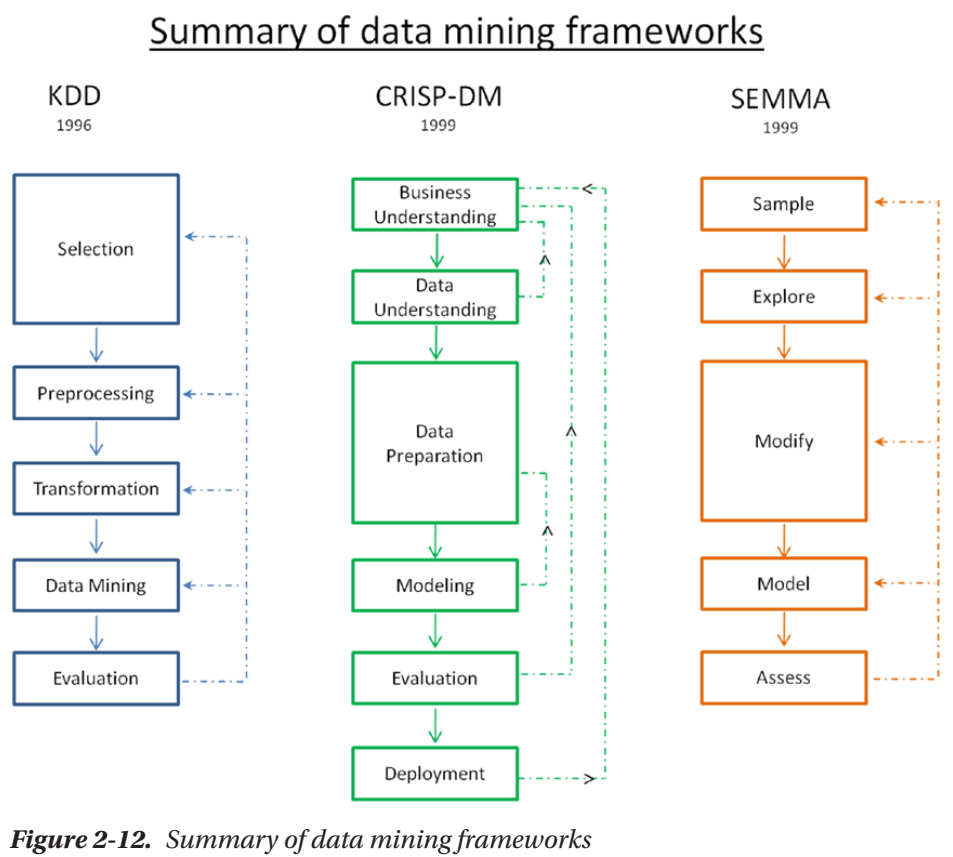

#### KDD: Knowledge Discovery in Databases.<br> CRISP: Cross-Industry Standard Process for Data Mining.<br> SEMMA: Sample, Explore, Modify, Model, Assess.

Three popular data mining frameworks according to the book: "Mastering Machine Learning with Python in Six Steps: A Practical Implementation Guide to Predictive Data Analytics Using Python", Second Edition. Manohar Swamynathan. 2019 Ed.Apress

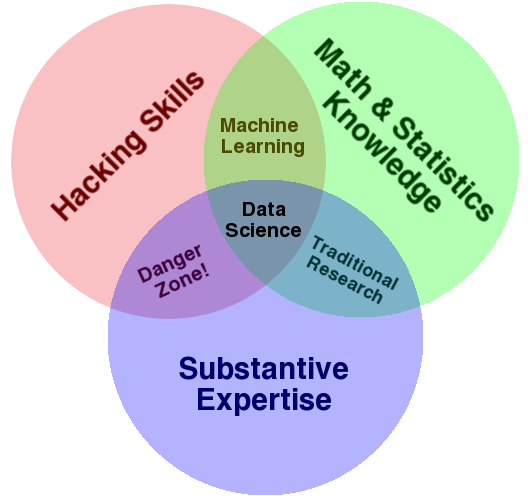

The data science venn diagram. source: http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="DataFieldFeats"> </A> <h1>Data File and Features</h1>

**Data File**
>    **healt_insurance_claims.csv** <br>

**File. Original Features and Dtype**
>    **healt_insurance_claims.csv** <br>

|Cons.| Variable/Feature | Description|Dtype|
| :--- | :---: | :---: | :---: |
1|tpa|Third-party administrator ID|object|
2|policy_ref|Policy reference number|object|
3|member_id|Insured member ID|object|
4|sex|Sex of the insured member|object|
5|dob|Date of birth of the insured member|object|
6|policy_start_dt|Date of commencement of policy|object|
7|policy_end_dt|Date of expiry of policy|object|
8|**prod_code**|Product type (refer description)|object|
9|**policy_type**|Policy type (refer description)|object|
10|sum_insured|Maximum sum insured available to policyholder|int64|
11|claim_ref|Claim reference number|object|
12|claim_dt|Date of claim intimation to insurer|object|
13|hospital_id|Unique ID given to hospital|object|
14|hos_zipcode|Zip code of the hospital|object|
15|admit_dt|Date of admission in hospital|object|
16|discharge_dt|Date of discharge from hospital|object|
17|payment_dt|Date of settlement of the claim|object|
18|claim_amt|Amount claimed by the claimant|float64|
19|nursing_chg|Nursing charges incurred during treatment|float64|
20|surgery_chg|Surgery charges incurred during treatment|float64|
21|cons_fee|Doctor consultation charges incurred during treatment|float64|
22|test_chg|Investigation charges of medical tests prescribed by the doctor|float64|
23|pharmacy_cost|Medicines consumed during treatment|float64|
24|other_chg|Any other charges that cannot be categorized in above|float64|
25|pre_hosp_exp|Amount claimed for pre-hospitalization treatment|float64|
26|post_hosp_exp|Amount claimed for post-hospitalization treatment|float64|
27|other_chg_non_hosp|Other non-hospital charges (laundry, paid TV channels, guest F&B, etc.)|float64|
28|copayment|Co-payment or excess if applicable|float64|
29|settle_amt|Final amount paid to the insured or to the medical service provider on behalf of insured|int64|
30|**payment_type**|The mode of payment (refer description)|object|
31|hosp_type|Whether hospital is networked, Y/N|object|
32|recommendation|Classified as Green/Discuss/Investigate by the claim settlement team|object|
33|fraud|Classified as Fraud/Non-Fraud by an expert consultant|int64|

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Feats1"> </A> <h2>Description of:Product type, Policy type details,  Claim payment type description </h2>

prod_code 	Product type	policy_type 	Policy type details	payment_type 	Claim payment type description
A 	Basic policy	A 	Individual	A 	Cashless settlement
B 	Hospital cash plan	B 	Individual floater	B 	Reimbursement to claimant
C 	Outpatient coverage	C 	Group	C 	Cash benefit
D 	Universal health policy	D 	Group floater	D 	Per diem basis
E 	Microinsurance policy	E 	Declaration	E 	Lump-sum basis
F 	Package policy (covering more than one type of health above)	F 	Declaration floater	F 	Cashless to the insured
G 	Hybrid policy (covering other than health also)	G 	Declaration with group insurance		
O 	Any other product type	H 	Declaration floater with group insurance		
		O 	Any other cover type		
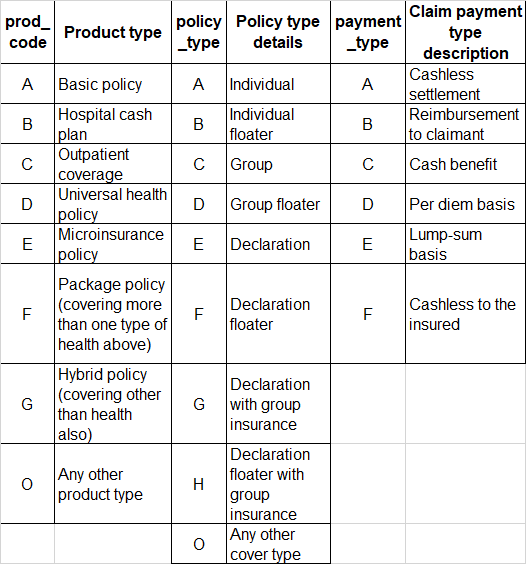

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Clues"> </A> <h2>Immediate possible clues derived from the information provided about the problem</h2>

The Data Description section provides 3 groups of clues:
1) Number of frauds identified by an expert

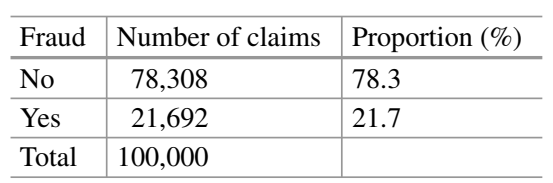

<br>2) Recommendations of the current system (rule-based decision support systems) or RBDSS
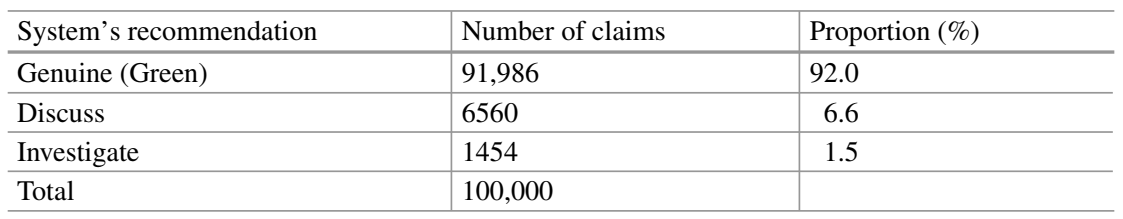

<br>3) Description of three variables:
>1. Type of product. (Basic Policy, Hospital Cash Plan, Outpatient Coverage, etc.)

>2. Details of the type of policy. (Individual, individual float, group, etc.)

>3. The mode of payment. (Cashless Settlement, Claimant Reimbursement, Cash Benefit, etc.)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Libraries"> </A> <h2>Optional Libraries and settings to be used</h2>

OPTIONAL if desired or needed "jupyter themes" for a different jupyter appearance. Specially useful for night time<br> **NOTE**: These themes slow down a little bit the whole environmet of general operations. ALSO. The freeze_header function does not work so it does not improve the view of dataframe with several rows.

In [1]:
# https://github.com/dunovank/jupyter-themes
from jupyterthemes import get_themes
import jupyterthemes as jt
#from jupyterthemes.stylefx import set_nb_theme

In [2]:
! jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
# https://stackoverflow.com/questions/69077866/changing-jupyter-notebook-theme-nameerror-name-jt-is-not-defined
# to execute "jupyterthemes as jt" terminal commands in Jupyter Notebook cells
# they have to be prepending by an exclamation mark (!) to the beginning of the command
# FOR DAYTIME I LIKE THIS THEME
! jt -t grade3 -T -N -kl -cellw 90% -lineh 170

In [26]:
# toggle toolbar ON and notebook name ON -T -N 
# toggle kernel logo. -kl
# adjust cell width (% screen width) and line height
# jt -t chesterish -cellw 90% -lineh 170
# FOR NIGHT TIME I LIKE THIS THEME
! jt -t monokai -T -N -kl -cellw 90% -lineh 170

In [95]:
# TO RESTORE DEFAULTS OR NOT JUPYTER THEMES
# restore default theme
# NOTE: Need to delete browser cache after running jt -r
# If this doesn't work, try starting a new notebook session.
! jt -r

Reset css and font defaults in:
C:\Users\conza\.jupyter\custom &
C:\Users\conza\AppData\Roaming\jupyter\nbextensions


In [3]:
# freeze_header DOES NOT FUNCTION IF USING JUPYTER THEMES or after being used
# the function was taken from:
# https://stackoverflow.com/questions/28778668/freeze-header-in-pandas-dataframe
# sometimes it is needed many restore of jupyter
# libraries and function to improve the view of dataframe with several rows and columns
from ipywidgets import interact, IntSlider
from IPython.display import display

In [4]:
def freeze_header(df, num_rows=30, num_columns=10, step_rows=1,
                  step_columns=1):
    """
    Freeze the headers (column and index names) of a Pandas DataFrame. A widget
    enables to slide through the rows and columns.

    Parameters
    ----------
    df : Pandas DataFrame
        DataFrame to display
    num_rows : int, optional
        Number of rows to display
    num_columns : int, optional
        Number of columns to display
    step_rows : int, optional
        Step in the rows
    step_columns : int, optional
        Step in the columns

    Returns
    -------
    Displays the DataFrame with the widget
    """
    @interact(last_row=IntSlider(min=min(num_rows, df.shape[0]),
                                 max=df.shape[0],
                                 step=step_rows,
                                 description='rows',
                                 readout=False,
                                 disabled=False,
                                 continuous_update=True,
                                 orientation='horizontal',
                                 slider_color='purple'),
              last_column=IntSlider(min=min(num_columns, df.shape[1]),
                                    max=df.shape[1],
                                    step=step_columns,
                                    description='columns',
                                    readout=False,
                                    disabled=False,
                                    continuous_update=True,
                                    orientation='horizontal',
                                    slider_color='purple'))
    def _freeze_header(last_row, last_column):
        display(df.iloc[max(0, last_row-num_rows):last_row,
                        max(0, last_column-num_columns):last_column])

In [17]:
#https://towardsdatascience.com/explore-pandas-dataframe-with-datatile-59c425b55d01#
from datatile.summary.df import DataFrameSummary #A library for managing, summarizing, and visualizing

In [76]:
'''
https://www.scikit-yb.org/en/latest/
https://github.com/DistrictDataLabs/yellowbrick
https://pypi.org/project/yellowbrick/

yellowbrick used here to visualize the ROCAUC metrics
'''
import yellowbrick
from yellowbrick.classifier import ROCAUC

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

Many of the essential cells (within the detailed or long development) to be executed are preceded by the following cell that indicates them as essential:

<span style='background:plum'>Essential operation</span>

The detailed or long development is an optional but very informative part of the Exploratory Data Analysis (EDA). Some of the most important findings of the EDA are:


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA1"> </A> <h1>First EDA</h1>

"EDA is the key to success. Sometimes proper EDA might solve the business case" **(Verdhan, 2020)**. Verdhan, V. (2020). Supervised Learning with Python: Concepts and Practical Implementation Using Python. Apress.

<span style='background:plum'>Essential operation</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None) #displays all columns contained into the dataframe
pd.set_option('display.precision',2)

In [2]:
#loads healt_insurance_claims.csv into dataframe HeltInsClms_df
HeltInsClms_df = pd.read_csv("health_insurance_claims.csv")

In [5]:
# gets a quick known of number of rows or samples and columns or features
HeltInsClms_df.shape

(100000, 33)

In [6]:
# gets some rows to get an idea of the values
HeltInsClms_df.head(15)

tpa     policy_ref   member_id  sex          dob policy_start_dt  \
0    A  RK1-1XKBF65NW  XK8-H47QX8    M  14-Apr-1978     20-Aug-2009   
1    A  YD9-1XBLA13AJ  OD6-R24XM3    M  18-Feb-1935      5-Apr-2009   
2    A  YD9-1XBLA13AJ  WZ8-O40WT6    F  14-Mar-1936      5-Apr-2009   
3    A  YD9-1XBLA13AJ  WZ8-O40WT6    F  14-Mar-1936      5-Apr-2009   
4    A  YD9-1XBLA13AJ  WZ8-O40WT6    F  14-Mar-1936      5-Apr-2009   
5    A  YD9-1XBLA13AJ  SV5-X94YN8    F  23-Mar-1978      5-Apr-2009   
6    A  YD9-1XBLA13AJ  BX3-C68US6    F  23-Feb-1982      5-Apr-2009   
7    A  YD9-1XBLA13AJ  FD3-K71XE2    F  22-Mar-1979      5-Apr-2009   
8    A  YD9-1XBLA13AJ  AZ4-K18CH2    M  28-Jan-1949      5-Apr-2009   
9    A  YD9-1XBLA13AJ  AZ4-K18CH2    M  28-Jan-1949      5-Apr-2009   
10   A  YD9-1XBLA13AJ  AZ4-K18CH2    M  28-Jan-1949      5-Apr-2009   
11   B  VQ1-1VFOG72GF  HE2-I64ZY1  NaN  29-Jan-1986     18-Jun-2008   
12   A  UY3-9BWSL34YU  WB3-V20GG7    M   3-Jan-1985      4-Apr-2008   
13   A  UY3-9BWSL34YU  WB3-V20GG7    M   3-Jan-1985      4-Apr-2008   
14   B  WB6-4SPZA80PB  CU9-E85FS6    M  15-Aug-1974     24-Mar-2008   

   policy_end_dt prod_code policy_type  sum_insured   claim_ref     claim_dt  \
0    19-Aug-2010         A           D         8750  LS3-F51V56  27-Dec-2009   
1     8-Mar-2010         A           D        25000  LQ8-V12K42  13-Jan-2009   
2     8-Mar-2010         A           D        25000   ZH0-U8I16  23-Dec-2009   
3     8-Mar-2010         A           D        25000  HI3-K93J44  24-Dec-2009   
4     8-Mar-2010         A           D        25000   DL5-O9K48  26-Nov-2009   
5     8-Mar-2010         A           D        25000  DG2-K24L45  28-Nov-2009   
6     8-Mar-2010         A           D        25000  CX1-H41R46  14-Dec-2009   
7     8-Mar-2010         A           D        25000  NR0-G67I46  17-Feb-2010   
8     8-Mar-2010         A           D        25000   VF1-N8F68  18-Dec-2009   
9     8-Mar-2010         A           D        25000  QL1-Z45N45  22-Nov-2009   
10    8-Mar-2010         A           D        25000   VF1-N8F68   2-Feb-2010   
11   17-Jun-2009         A           D            0  WL9-B78A69  10-Apr-2008   
12   26-Oct-2009         A           C        15000  UJ8-W32V34  31-Dec-2009   
13   26-Oct-2009         A           C        15000  HM8-N18C11  30-Dec-2009   
14   23-Mar-2009         A           D            0  IE4-D28F51  25-Jul-2008   

   hospital_id hos_zipcode     admit_dt discharge_dt   payment_dt  claim_amt  \
0   YGV-YGC685    TX25ID35  28-Nov-2009  22-Dec-2009  17-Jan-2010     922.99   
1   YGV-YGC685    FA21FY42  13-Feb-2009  13-Jun-2009  31-Dec-2009    3151.08   
2   YGV-YGC685    FA21FY42  17-Dec-2009  22-Dec-2009  18-Jan-2010    6798.14   
3   YGV-YGC685     OY17AQ3  23-Dec-2009  28-Feb-2010  18-Jan-2010    3988.11   
4   YGV-YGC685     OY17AQ3  22-Nov-2009  27-Nov-2009  27-Nov-2009    1294.92   
5   YGV-YGC685    FA21FY42  25-Nov-2009  10-Dec-2009  30-Dec-2009    2722.26   
6   YGV-YGC685     IZ2BB85  12-Oct-2009  15-Dec-2009  19-Jan-2010    3691.49   
7   YGV-YGC685     PR29QC8  17-Feb-2010  22-Feb-2010   1-Sep-2010    2148.52   
8   YGV-YGC685    JK34TA24  18-Dec-2009  19-Dec-2009  18-Jan-2010    2680.53   
9   YGV-YGC685    JK34TA24  10-Aug-2009  10-Sep-2009  28-Dec-2009    2112.04   
10  YGV-YGC685    JK34TA24  29-Dec-2009  29-Dec-2009   2-Mar-2010     986.28   
11  ZHZ-OPM187     PX1QF17  26-Aug-2008  28-Aug-2008  20-Sep-2008     632.41   
12  YGV-YGC685    TY22HV36  14-Aug-2009  15-Aug-2009  26-Jan-2010    1237.35   
13  YGV-YGC685    TY22HV36   8-Jan-2009   8-Apr-2009  25-Jan-2010    1303.58   
14  BVA-NUX484     WJ9QR62   7-Jul-2008   7-Aug-2008  23-Aug-2008     814.10   

    nursing_chg  surgery_chg  cons_fee  test_chg  pharmacy_cost  other_chg  \
0          0.00          0.0      0.00      0.00            0.0       0.00   
1          0.00          0.0      0.00      0.00            0.0       0.00   
2          0.00          0.0      0.00      0.00            0.0       

In [9]:
# example of freeze_header use
#freeze_header(df=HeltInsClms_df.head(15), num_rows=15, num_columns=33)
#freeze_header(df=HeltInsClms_df, num_rows=15, num_columns=33)
#freeze_header()

100,000 Samples or rows and 33 columns or features

In [15]:
# example of describe for whole datafrema with include='all'
HeltInsClms_df.describe(include='all')

tpa     policy_ref   member_id    sex          dob policy_start_dt  \
count   100000         100000      100000  94494       100000          100000   
unique      23          46552       86295      2        24935            1454   
top          D  UA3-7IIIO74AU  SY3-R66SR6      M  20-Oct-1949      4-Dec-2007   
freq     21557           4511         585  50269          585            4484   
mean       NaN            NaN         NaN    NaN          NaN             NaN   
std        NaN            NaN         NaN    NaN          NaN             NaN   
min        NaN            NaN         NaN    NaN          NaN             NaN   
25%        NaN            NaN         NaN    NaN          NaN             NaN   
50%        NaN            NaN         NaN    NaN          NaN             NaN   
75%        NaN            NaN         NaN    NaN          NaN             NaN   
max        NaN            NaN         NaN    NaN          NaN             NaN   

       policy_end_dt prod_code policy_type  sum_insured   claim_ref  \
count         100000    100000      100000     1.00e+05      100000   
unique          1416         8           9          NaN       92633   
top      28-Feb-2009         A           D          NaN  TA7-Q69S62   
freq            5099     92659       41237          NaN        1176   
mean             NaN       NaN         NaN     8.47e+04         NaN   
std              NaN       NaN         NaN     5.12e+06         NaN   
min              NaN       NaN         NaN     0.00e+00         NaN   
25%              NaN       NaN         NaN     2.50e+03         NaN   
50%              NaN       NaN         NaN     5.00e+03         NaN   
75%              NaN       NaN         NaN     1.00e+04         NaN   
max              NaN       NaN         NaN     1.13e+09         NaN   

          claim_dt hospital_id hos_zipcode     admit_dt discharge_dt  \
count       100000       78607      100000       100000       100000   
unique        1576       13302        2815         1662         1671   
top     1-Apr-2010  YGV-YGC685    ZD25KR16  24-Mar-2010  17-Mar-2010   
freq           450       25413       23081          317          314   
mean           NaN         NaN         NaN          NaN          NaN   
std            NaN         NaN         NaN          NaN          NaN   
min            NaN         NaN         NaN          NaN          NaN   
25%            NaN         NaN         NaN          NaN          NaN   
50%            NaN         NaN         NaN          NaN          NaN   
75%            NaN         NaN         NaN          NaN          NaN   
max            NaN         NaN         NaN          NaN          NaN   

         payment_dt  claim_amt  nursing_chg  surgery_chg   cons_fee  \
count        100000   1.00e+05     1.00e+05    100000.00  100000.00   
unique         1457        NaN          NaN          NaN        NaN   
top     29-Apr-2010        NaN          NaN          NaN        NaN   
freq            743        NaN          NaN          NaN        NaN   
mean            NaN   4.95e+03     2.43e+02       210.35     295.41   
std             NaN   1.44e+05     6.32e+03      1831.02    7641.29   
min             NaN   0.00e+00     0.00e+00         0.00       0.00   
25%             NaN   5.24e+02     0.00e+00         0.00       0.00   
50%             NaN   1.04e+03     0.00e+00         0.00      11.41   
75%             NaN   1.94e+03     1.69e+02         0.00     157.39   
max             NaN   3.91e+07     1.44e+06    295584.58  951012.43   

         test_chg  pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  \
count   100000.00      100000.00   1.00e+05     100000.00      100000.00   
unique        NaN            NaN        NaN           NaN            NaN   
top           NaN            NaN        NaN           NaN            NaN   
freq          NaN            NaN        NaN           NaN            NaN   
mean       185.93         297.79   3.45e+02         12.88          37.69   
std       4

In [16]:
# example of describe for a single feature or column with include='all'
HeltInsClms_df.policy_ref.describe(include='all')

count            100000
unique            46552
top       UA3-7IIIO74AU
freq               4511
Name: policy_ref, dtype: object

In [21]:
HeltInsClms_df.sum_insured.describe(include='all')

count    1.00e+05
mean     8.47e+04
std      5.12e+06
min      0.00e+00
25%      2.50e+03
50%      5.00e+03
75%      1.00e+04
max      1.13e+09
Name: sum_insured, dtype: float64

In [20]:
# example of DataFrameSummary use
DataFrameSummary(HeltInsClms_df, plot=True)

In [10]:
# To help in undestanding  the kind of data we are dealing with (numerical/categorical/date)
HeltInsClms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tpa                 100000 non-null  object 
 1   policy_ref          100000 non-null  object 
 2   member_id           100000 non-null  object 
 3   sex                 94494 non-null   object 
 4   dob                 100000 non-null  object 
 5   policy_start_dt     100000 non-null  object 
 6   policy_end_dt       100000 non-null  object 
 7   prod_code           100000 non-null  object 
 8   policy_type         100000 non-null  object 
 9   sum_insured         100000 non-null  int64  
 10  claim_ref           100000 non-null  object 
 11  claim_dt            100000 non-null  object 
 12  hospital_id         78607 non-null   object 
 13  hos_zipcode         100000 non-null  object 
 14  admit_dt            100000 non-null  object 
 15  discharge_dt        100000 non-null

<span style='background:sandybrown'>We notice the missing data for **'sex'** and **'hospital_id'** features</span><br> For `sex` there are 100,000 - 94,494 =  5, 506 NaNs or 6% aprox. of total(100,000) samples or records.<br>For `hospital_id` there are 100,000 - 78,607 =  21,393 NaNs or 21.4% aprox. of total samples or records.<br><br><span style='background:paleturquoise'> Swamynathan (2019) menctions a couple important things on this regard:</span><br>
> I. There are four most commonly used techniques for missing data imputation:<br> 
 >> 1) Delete.<br> 2) Replace with the summary (i.e.mean, mode, etc.).<br> 3) Random replace.<br> 4) Using a predictive model.<br>
    
> II. Less than 5% of number of missing values row count is insignificant compared with the overall record count. <br><br><span style='background:sandybrown'> Then, in this case 6% and 21% could not be trivial quantities of missing values to simply delete them.</span> <span style='background:lightblue'>Nevertheless, in order to get a model or to get experience as soon as possible (as it was my case on the first attempts), removing NaNs is an option to be considered.</span>


In [25]:
HeltInsClms_df.dtypes.value_counts()

object     19
float64    11
int64       3
dtype: int64

Next we see a **predominant number of object (or string) dtype features**. This could be an indicator of a good amount of work for conversions, such as date and numerical values..<br>For example the feature of `sex` surely will have to be converted to a numeric somehow, and `dob`, `policy_start_dt`, `policy_end_dt`, `claim_dt`, `admit_dt`,`discharged_dt`, `payment_dt`, might be needed to converted to datetime feature.<br> Also, it seems that all numeric features (except fraud) refer to **monetary values**<br>As `fraud` is an integer, surely will be either 0 or 1, then that leads to a **binary feature and binary classification task**. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA7Feats"> </A> <h2>EDA on 7 out of 10 first features and their relationship with fraud</h2>

From the **book** where this case is analyzed, the section **"4. Claims Processing"** provides some details of the process for claiming health insurance. From those details, we can identify some features (into the parethesis)<br>
1. "The initial contact between the firm and the policyholder is made via the call center or local office/agent. Often, this step is undertaken by a person close to the holder or by the healthcare provider, because the holder may be incapacitated." <br> 
2. "The firm’s call center obtains and records basic information from the client" (`member_id` feature), "including details regarding the type of policy" (`policy_type` feature, also maybe `tpa`,`sex`, `prod_code` and `sum_insured`) "that the holder owns" (`policy_ref`)," the hospital to which the holder has been taken"(`hospital_id`) , "and the injury/ailment with which the holder has been afflicted" (no specific variable for injury/ailment is provided into the .csv file).<br><br>
For the features `dob`,`policy_start`, `policy_end`, we could assume they should be automatically updated by the time the call is made.<br>
Also for practical reasons in order to simplify and get as soon as possible the **first prototype of SML model**, these 3 features are not going to be analyzed.<br>
So these 3 date time features are not included into this first **CRISP-DM iteration**.<br>Armed with this information, the call-center employee forwards the necessary details to the claims processing team.

Then with the above information, we could try to create a first prototype or SML model.<br> We should remember what was said in the section <a href="#ProblemContext">Detection of frauds in the presentation of claims of the Ideal Insurance company</a> regarding : <br> 
>"A gradual learning and knowlege about python features, SML and the business problem and its efforts trying to address the frauds" and

><br >implement the use of the CRISP-DM framework,  as these was one of the main learnings when developing this use case of IIS.<br>

>Also, by analizying these first 7 out of 10 features and prototyping a model, we are segmenting the problem into more logical and manageable pieces according to the IIC's processes over time in the processing of claims.

<span style='background:plum'>Essential operation</span>

In [10]:
# create a new dataframe to shorten and improve the visibility of commands  
HIC=pd.read_csv("health_insurance_claims.csv")

In [17]:
HIC.columns

Index(['tpa', 'policy_ref', 'member_id', 'sex', 'dob', 'policy_start_dt',
       'policy_end_dt', 'prod_code', 'policy_type', 'sum_insured', 'claim_ref',
       'claim_dt', 'hospital_id', 'hos_zipcode', 'admit_dt', 'discharge_dt',
       'payment_dt', 'claim_amt', 'nursing_chg', 'surgery_chg', 'cons_fee',
       'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp',
       'post_hosp_exp', 'other_chg_non_hosp', 'copayment', 'settle_amt',
       'payment_type', 'hosp_type', 'recommendation', 'fraud'],
      dtype='object')

<span style='background:plum'>Essential operation</span>

In [11]:
# keep only necessary columns
HIC=HIC[['tpa', 'policy_ref', 'member_id', 'sex',
         'prod_code', 'policy_type', 'sum_insured', 'fraud']]

In [19]:
HIC.shape

(100000, 8)

In [334]:
HIC.head(15)

tpa     policy_ref   member_id  sex prod_code policy_type  sum_insured  \
0    A  RK1-1XKBF65NW  XK8-H47QX8    M         A           D         8750   
1    A  YD9-1XBLA13AJ  OD6-R24XM3    M         A           D        25000   
2    A  YD9-1XBLA13AJ  WZ8-O40WT6    F         A           D        25000   
3    A  YD9-1XBLA13AJ  WZ8-O40WT6    F         A           D        25000   
4    A  YD9-1XBLA13AJ  WZ8-O40WT6    F         A           D        25000   
5    A  YD9-1XBLA13AJ  SV5-X94YN8    F         A           D        25000   
6    A  YD9-1XBLA13AJ  BX3-C68US6    F         A           D        25000   
7    A  YD9-1XBLA13AJ  FD3-K71XE2    F         A           D        25000   
8    A  YD9-1XBLA13AJ  AZ4-K18CH2    M         A           D        25000   
9    A  YD9-1XBLA13AJ  AZ4-K18CH2    M         A           D        25000   
10   A  YD9-1XBLA13AJ  AZ4-K18CH2    M         A           D        25000   
11   B  VQ1-1VFOG72GF  HE2-I64ZY1  NaN         A           D            0   
12   A  UY3-9BWSL34YU  WB3-V20GG7    M         A           C        15000   
13   A  UY3-9BWSL34YU  WB3-V20GG7    M         A           C        15000   
14   B  WB6-4SPZA80PB  CU9-E85FS6    M         A           D            0   

    fraud  
0       1  
1       0  
2       1  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  
10      1  
11      0  
12      0  
13      0  
14      0

We notice sum_insured=0 for a couple rows, one of them even with sex="NaN"

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA_fraud"> </A> <h3>Number of frauds and not frauds in the whole datframe</h3>

In [50]:
# first it might be useful to know the total fraus and not frauds
HIC['fraud'].value_counts()

0    78308
1    21692
Name: fraud, dtype: int64

78,308 not frauds. About 78% not frauds.<br> 21,692 Frauds. About 22% frauds.

In [9]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [10]:
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='monokai')

In [15]:
sns.set_style("whitegrid")

In [13]:
# Smallest context:
sns.set_context("paper")

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='count'>

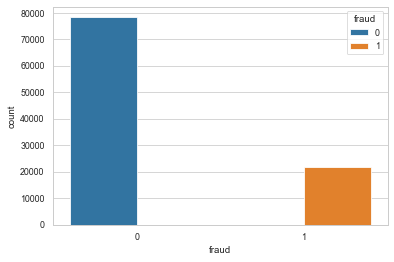

In [16]:
sns.countplot(HIC.fraud,hue='fraud',data=HIC)

From the above plot We notice an aproximate ratio of 3:1. There are 3 times more no frauds than frauds. This indicates an imbalanced class, that even when it is not that big, it will affect the performance of most SML algorithms (as it will be shown latter).

In [ ]:
# could not plot a pie for an unknow reason
#HIC.groupby(['fraud']).value_counts().plot(kind='pie', subplots=True)

In [ ]:
# could not plot a pie for an unknow reason
#plt.pie(HIC['fraud'])

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA_tpa"> </A> <h3>Third Party administrator ID or tpa and its relationship with fraud</h3>

In [ ]:
# Largest Context:
sns.set_context("poster")

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tpa', ylabel='count'>

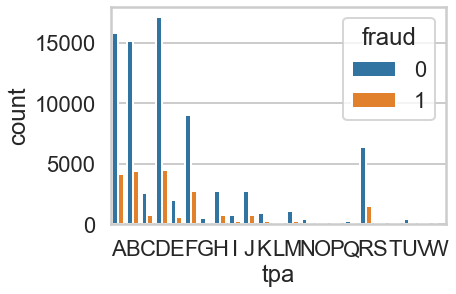

In [21]:
# plots the number of samples or rows per each tpa class and their  number of frauds 
# or not frauds also per each tpa class.
sns.countplot(HIC.tpa,hue='fraud',data=HIC)

In [74]:
# per tpa class gets and shows the number of not frauds(lambda_0), frauds(count_nonzero) and
# number of samples(size) 
HIC.groupby('tpa').agg({'fraud':(lambda x: np.count_nonzero(x==0), np.count_nonzero, np.size)})

fraud                     
    <lambda_0> count_nonzero   size
tpa                                
A        15771          4191  19962
B        15115          4371  19486
C         2554           729   3283
D        17101          4456  21557
E         1997           624   2621
F         9049          2789  11838
G          551           180    731
H         2739           805   3544
I          727           244    971
J         2747           808   3555
K          916           268   1184
L           82            18    100
M         1111           278   1389
N          400           113    513
O           84            34    118
P          106            29    135
Q          261            72    333
R         6408          1496   7904
S            1             1      2
T           12             5     17
U          424           138    562
V          147            43    190
W            5             0      5

`tpa` classes with higher number of frauds are: A,B,D,F and R (Thousands of frauds).

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA_PolicyRef_MemberId"> </A> <h3>'policy_ref' and 'member_id' and their relationship with fraud</h3>

In [134]:
HIC['policy_ref'].value_counts()

UA3-7IIIO74AU    4511
TR3-9TDMJ84JK    3109
IS6-5VMIV49QE    1666
NO5-5RVTM52PT    1261
KN4-2BRHU70AA    1111
                 ... 
YF7-4ZFSN84VN       1
KI9-6AEDT69EA       1
KO6-8XJJI29TR       1
OU9-3YKPP43PB       1
AX5-2QBXP19MI       1
Name: policy_ref, Length: 46552, dtype: int64

In [135]:
HIC['member_id'].value_counts()

SY3-R66SR6    585
EO5-A43NN4    214
RS4-B18SU2    194
TX5-V43JS7    171
VG6-N90CE6    144
             ... 
SQ7-Y16RR8      1
JB4-Z50YU7      1
TB4-T11UB0      1
PV5-A97OU1      1
DT1-J47BQ5      1
Name: member_id, Length: 86295, dtype: int64

<span style='background:coral'>It is very high the number of classes of `policy_ref`(46,553) and `member_id`(86,295). Then it should be a way o mechanism to consider this values into the SML model, for example maybe creating a new feature to stablish a relationship of these two features with fraud.</span>

In [143]:
HIC.groupby(['policy_ref','member_id']).agg({'fraud':(lambda x: np.count_nonzero(x==0),
                                                      np.count_nonzero, np.sum)})

fraud                  
                         <lambda_0> count_nonzero sum
policy_ref    member_id                              
AA0-2BQCU72BC LC3-Y93IK7          1             0   0
AA0-2USAU66SQ IY9-I86BR1          1             0   0
              XQ9-M65NP8          1             0   0
AA0-3DRBU19XR KL2-K26KV6          1             0   0
AA0-3JOJG57PS HB8-X74UB6          1             0   0
...                             ...           ...  ..
ZZ9-6DTXD85LS FU4-S35UX5          2             0   0
ZZ9-6UDYM66GY FU6-A97FT6          1             0   0
ZZ9-7ARPV27RM KU4-M78ES8          1             0   0
ZZ9-8XGDO33PQ IV2-Z33EG7          1             0   0
ZZ9-9YHZE52LT YH6-V87YE8          1             0   0

[88017 rows x 3 columns]

We notice a `policy_ref`='AA0-2USAU66SQ' feature with more than one `member_id`. There should be more of this. These might be related with the `policy_type`

In [26]:
HIC.groupby(['policy_ref',
             'member_id',
             'policy_type']).agg({'fraud':(lambda x: np.count_nonzero(x==0),
              np.count_nonzero, np.sum)})

fraud                  
                                     <lambda_0> count_nonzero sum
policy_ref    member_id  policy_type                             
AA0-2BQCU72BC LC3-Y93IK7 A                    1             0   0
AA0-2USAU66SQ IY9-I86BR1 C                    1             0   0
              XQ9-M65NP8 C                    1             0   0
AA0-3DRBU19XR KL2-K26KV6 A                    1             0   0
AA0-3JOJG57PS HB8-X74UB6 A                    1             0   0
...                                         ...           ...  ..
ZZ9-6DTXD85LS FU4-S35UX5 C                    2             0   0
ZZ9-6UDYM66GY FU6-A97FT6 G                    1             0   0
ZZ9-7ARPV27RM KU4-M78ES8 B                    1             0   0
ZZ9-8XGDO33PQ IV2-Z33EG7 A                    1             0   0
ZZ9-9YHZE52LT YH6-V87YE8 B                    1             0   0

[89681 rows x 3 columns]

In [152]:
HIC2=HIC.groupby(['policy_ref',
             'member_id',
             'policy_type']).agg({'fraud':(np.count_nonzero)})

In [154]:
freeze_header(HIC2, num_rows=30, num_columns=10)

fraud
policy_ref    member_id  policy_type       
AA0-2BQCU72BC LC3-Y93IK7 A                0
AA0-2USAU66SQ IY9-I86BR1 C                0
              XQ9-M65NP8 C                0
AA0-3DRBU19XR KL2-K26KV6 A                0
AA0-3JOJG57PS HB8-X74UB6 A                0
AA0-8XJSW35UU ET3-N17GT2 O                1
AA1-1AYYH64AC DN5-S84FS5 D                0
              FC6-I94SI5 D                0
              GR6-R27KB6 D                1
              HO1-U76VD0 D                0
              KI7-X97BH1 D                0
              KJ6-U27CB3 D                1
              LD3-M14DE6 D                0
              LY3-P60CZ5 D                1
              MA2-M15ZH2 D                0
              XC9-M48TZ7 D                0
              XZ6-M86MG4 D                0
              YT9-E57OG9 D                1
AA1-1BWEO56PJ IF0-N31FZ9 D                0
              UR5-B12RM5 D                0
AA1-4XYJM25IV FN4-L21IZ3 A                0
AA1-6HHPW25YN LK6-M11QK0 B                0
AA1-8LDXG39JS SU4-W65IZ1 A                1
AA2-1GGHB55UD XF5-K38CT9 B                0
AA2-2GYKK33KU FX5-C47II5 B                0
AA2-4AKSN69WT JJ1-Z72ZR0 A                0
AA2-5OFBQ74GT JX2-X54JZ9 A                0
AA2-6FSBQ43KU ME5-D72GG1 A                0
AA2-6SYDY41JO TY1-Y49PC4 A                0
AA2-7LHAM76BG EX1-Y52TI2 A                1

We now notice that at least the previous policy_ref='AA0-2USAU66SQ' it is a 'C' policy_type or a 'Group' policy. So, at this point one of the questions would be: Do group policy_type or policy_type=C have more, less or equal number of frauds compared to policy_type=A or individual policies, or policy_type=D (Group floater) or any other policy_type?

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA_sex"> </A> <h3>sex and its relationship with fraud</h3>

In [135]:
# review the number of Males='M' and Females='F'
HIC.sex.value_counts()

M    50269
F    44225
Name: sex, dtype: int64

In [139]:
MFratio=50269/44225
print("Male/Female ratio",MFratio)

Male/Female ratio 1.1366647823629168


In [140]:
# review the number of Males='M' and Females='F'
HIC.sex.value_counts(dropna=False)

M      50269
F      44225
NaN     5506
Name: sex, dtype: int64

In [28]:
# default context:
sns.set_context("notebook")

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

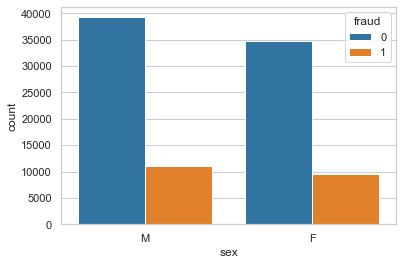

In [29]:
# plots the number of samples or rows per each sex class and their  number of frauds 
# or not frauds also per each sex class.
sns.countplot(HIC.sex,hue='fraud',data=HIC)

In [111]:
# per prod_code class gets and shows the number of not frauds(lambda_0), frauds(count_nonzero) and
# and number of samples(size) including the NaNs
HIC.groupby('sex', dropna=False).agg({'fraud':(lambda x: np.count_nonzero(x==0),
                                               np.count_nonzero, np.size)})

fraud                     
    <lambda_0> count_nonzero   size
sex                                
F        34694          9531  44225
M        39239         11030  50269
NaN       4375          1131   5506

We noticed more Male than Female, then more frauds for Males. This same trend should also be for NaN.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA_prod_code"> </A> <h3>Product Type or 'prod_code' and its relationship with fraud</h3>

In [30]:
# medium or near largest context:
sns.set_context("talk")

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_code', ylabel='count'>

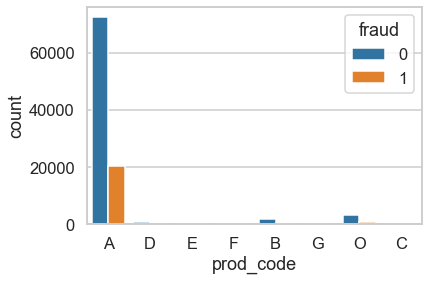

In [31]:
# plots the number of samples or rows per each prod_code class and their  number of frauds 
# or not frauds also per each tpa class.
sns.countplot(HIC.prod_code,hue='fraud',data=HIC)

In [32]:
# per prod_code class gets and shows the number of not frauds(lambda_0), frauds(count_nonzero) and
# number of samples(size) 
HIC.groupby('prod_code').agg(
    {'fraud':(lambda x: np.count_nonzero(x==0), np.count_nonzero, np.size)})

fraud                     
          <lambda_0> count_nonzero   size
prod_code                                
A              72503         20156  92659
B               1610           449   2059
C                 18             5     23
D                577           166    743
E                  9             4     13
F                103            32    135
G                150            40    190
O               3338           840   4178

Most frauds are within prod_code=A or Basic Policy

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA_policy_type"> </A> <h3>Policy Type or 'policy_type' and its relationship with fraud</h3>

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_type', ylabel='count'>

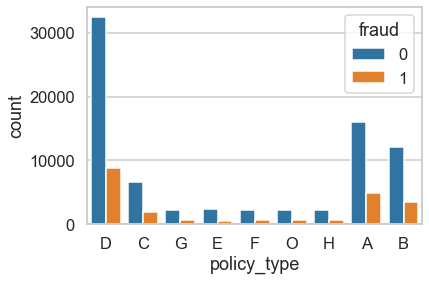

In [33]:
# plots the number of samples or rows per each policy_type class and their  number of frauds 
# or not frauds also per each tpa class.
sns.countplot(HIC.policy_type,hue='fraud',data=HIC)

In [34]:
# per policy_type class gets and shows the number of not frauds(lambda_0), frauds(count_nonzero) and
# number of samples(size) 
HIC.groupby('policy_type').agg(
    {'fraud':(lambda x: np.count_nonzero(x==0), np.count_nonzero, np.size)})

fraud                     
            <lambda_0> count_nonzero   size
policy_type                                
A                15963          4800  20763
B                12089          3423  15512
C                 6613          1847   8460
D                32482          8755  41237
E                 2321           540   2861
F                 2176           581   2757
G                 2202           560   2762
H                 2210           595   2805
O                 2252           591   2843

`policy_type` classes with higher number of frauds are: A,B,C,D (Thousands of frauds).

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA_sum_insured"> </A> <h3>'sum_insured' and its relationship with fraud</h3>

In [336]:
HIC['sum_insured'].describe()

count    1.00e+05
mean     8.47e+04
std      5.12e+06
min      0.00e+00
25%      2.50e+03
50%      5.00e+03
75%      1.00e+04
max      1.13e+09
Name: sum_insured, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='sum_insured'>

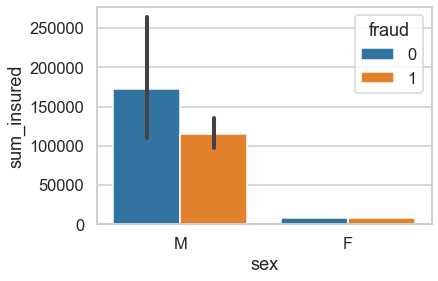

In [35]:
sns.barplot(x="sex", y="sum_insured", hue="fraud", data=HIC)

In [37]:
# Largest Context:
sns.set_context("poster")

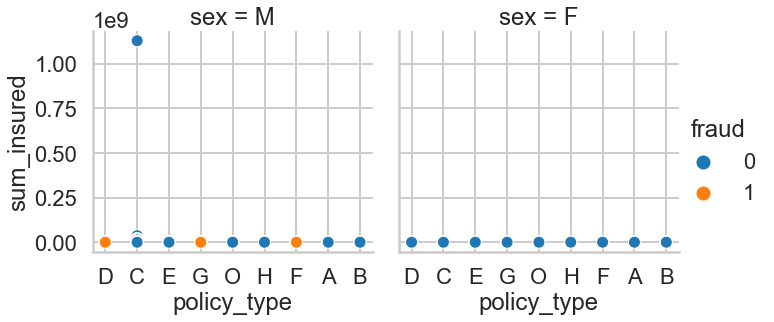

In [38]:
sns.relplot(x="policy_type", y="sum_insured", hue="fraud", col='sex', data=HIC)

In [49]:
HIC.groupby('sex', dropna=False).agg({'sum_insured':(np.mean, np.min, np.max),
                                      'policy_type':(np.min, np.max),
                                      'fraud':(lambda x: np.count_nonzero(x==0),
                                               np.count_nonzero, np.size)})

sum_insured                  policy_type           fraud                \
           mean amin        amax        amin amax <lambda_0> count_nonzero   
sex                                                                          
F       7814.29    0      500000           A    O      34694          9531   
M     159778.52    0  1129913800           A    O      39239         11030   
NaN    16471.61    0    50000000           A    D       4375          1131   

            
      size  
sex         
F    44225  
M    50269  
NaN   5506

mean `sum_insured` could be a good indicator to fillnan sex features (without considering outliers).

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="FeatEng1"> </A> <h2>Feature Engineering 1</h2>

"There is a thin line between **EDA** and the **data-cleaning phase**. Apparently, the steps overlap between **data preparation**, **feature engineering**, **EDA**, and **data-cleaning phases**." **(Verdhan, 2020)**. Verdhan, V. (2020). Supervised Learning with Python: Concepts and Practical Implementation Using Python. Apress.

"An important part of the model development process is called **feature engineering** in machine learning. This can describe **any data transformation or analytics** that extract information from a raw dataset that may be useful in a modeling context." **(McKinney, 2018)**. McKinney, W. (2018). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 2nd. Ed. O’Reilly

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="DealingWithMissingData1"> </A> <h3>Dealing with Missing Data</h3>

From **(Swamynathan, 2019)**:
>Missing data can mislead or create problems for analyzing the data. In order to avoid
any such issues, you need to **impute missing data**. There are four most commonly used
techniques for **data imputation**:<br>

>1) DELETE: You could simply delete the rows containing missing values.
>>This technique is **more suitable and effective when a number of missing values row count is insignificant (say <5%)** compared with the overall record count.

>2) REPLACE with the summary: **This is probably the most commonly used imputation technique**.
>> Summarization here is the mean, mode, or median for a respective column. For continuous or quantitative variables, either mean/average or mode or median value of the respective column can be used to replace the missing values.<br>
>> Whereas for **categorical or qualitative** variables, the mode (most frequent) summation technique works better.

>3)RANDOM REPLACE: You can also replace the missing values with a randomly picked value from the respective column. **This technique would be appropriate where missing values row count is
insignificant**.

>4) USE A PREDICTIVE MODEL: This is **an advanced technique**.<br>Here you can train a **regression model** for continuous variables and a **classification model** for categorical variables with the available data and use the model to predict the missing values.

In [186]:
HIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   tpa          100000 non-null  object
 1   policy_ref   100000 non-null  object
 2   member_id    100000 non-null  object
 3   sex          94494 non-null   object
 4   prod_code    100000 non-null  object
 5   policy_type  100000 non-null  object
 6   sum_insured  100000 non-null  int64 
 7   fraud        100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


<AxesSubplot:xlabel='sex', ylabel='sum_insured'>

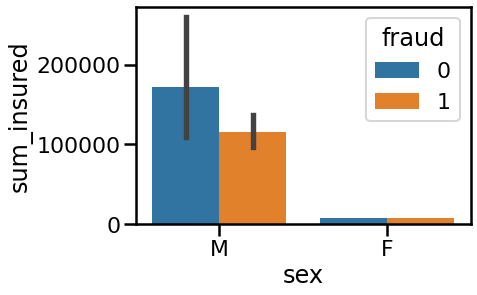

In [5]:
#  largest context:
sns.set_context("poster")
sns.barplot(x='sex',y='sum_insured',hue='fraud', data=HIC)

A barplot represents **an estimate of central tendency for a numeric variable** with the height of each rectangle **and provides some indication of the uncertainty around that estimate using error bars**.<br>In the above plot, the estimate for 'M' is about 160,000 and for 'F' is not clear the central tendency. But in <a href="#EDA_sum_insured">'sum_insured' and its relationship with fraud</a> we saw that the means for `sum_insured` were:<br>
For 'M': 159,778.52<br>
For 'F':   7,814.29.<br>
We can now include the values for the NaNs `sex`

In [174]:
from statistics import mode

In [177]:
HIC.groupby('sex', dropna=False).agg({'sum_insured':(np.mean, np.min, np.max, mode),
                        'policy_type':(np.min, np.max,mode),
                        'fraud':(lambda x: np.count_nonzero(x==0),
                                 np.count_nonzero, np.size)})

sum_insured                        policy_type                fraud  \
           mean amin        amax  mode        amin amax mode <lambda_0>   
sex                                                                       
F       7814.29    0      500000  5000           A    O    D      34694   
M     159778.52    0  1129913800  5000           A    O    D      39239   
NaN    16471.61    0    50000000  7500           A    D    D       4375   

                          
    count_nonzero   size  
sex                       
F            9531  44225  
M           11030  50269  
NaN          1131   5506

<span style='background:lightblue'>One simple and easy option to impute NaN sex would be by the strategy of most frequent value. i.e. 'M'. But that will lead to a more unbalanced data.</span>

In [10]:
# impute NaN sex by the strategy of most frequent value.
# from sklearn.impute import SimpleImputer
#impS=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
#HIC2.sex = impS.fit_transform(HIC2['sex'].values.reshape(-1,1))[:,0]

The above commented cell is possible to successfuly executed at this point. But it is not what I'm looking for to accomplish.

<span style='background:lightblue'>Another option for NaN `sex` would be to replace them by the 'mean' of maximum sum insured (`sum_insured`) of each sex.</span><br> So when `sum_insured` <= 7,814.29 sex='F'   "else"   sex='M'<br> 

<span style='background:palegreen'>Then, in order to try a more robust impute such as **Iterative imputer**, it is first needed **to convert categorical** or object features to numeric.</span>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="ConvertCategoricals1"> </A> <h4>Convert categorical variables to numerics</h4>

<span style='background:coral'> Trying to deal with missing data led to converting categorical variables. And this in turn leads to trimming of the data frame.</span><br> Therefore, we are excluding the `policy_ref` and `member_id` functions, as they have a very high number of classes and are not needed at the moment for the first stage of prototyping a first supervised machine learning model.

In [187]:
HIC.columns

Index(['tpa', 'policy_ref', 'member_id', 'sex', 'prod_code', 'policy_type',
       'sum_insured', 'fraud'],
      dtype='object')

<span style='background:plum'>Essential operation</span>

In [4]:
# excludes features 'policy_ref' and 'member_id'
HIC=HIC[['tpa', 'sex', 'prod_code', 'policy_type', 'sum_insured', 'fraud']]

In [5]:
HIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   tpa          100000 non-null  object
 1   sex          94494 non-null   object
 2   prod_code    100000 non-null  object
 3   policy_type  100000 non-null  object
 4   sum_insured  100000 non-null  int64 
 5   fraud        100000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


From **Swamynathan, 2019**:
> "Most of the ML libraries are designed to work well with numerical variables. So categorical variables in their original form of text description can’t be directly used for model building."<br>
>Some of the common methods of handling categorical data based on their number of levels, provided by Scikit-learn functions are:<br>
>> Create a **dummy variable** (also know as "**One Hot Encoder**"): This is a Boolean variable that indicates the presence of a category with the value 1 and 0 for absence.

>>**Convert to number** (also know as "**Label Encoder**"): Another simple method is to represent the text description of each level with a number by using the Label Encoder function

<br> Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. A Practical Implementation Guide to Predictive Data Analytics Using Python (2nd Ed.). Apress.

<span style='background:coral'>NOTE: In my experience implementing dummy variables (due to the conversion of categorical to numeric features) for classification SML models, lead to severe performance problems.</span><br><span style='background:mediumaquamarine'> Then converting categorical to numeric by other techniques different than dummy variables, might be a much better option.</span><br>  Alternatively to sklearn package's LabelEncoder function it can bu use a simple `factorize` pandas function.


<span style='background:plum'>Essential operation</span>

In [6]:
## Feature Engineering on sex,tpa, prod_code, policy_type
# convert categorical variables to numerics
HIC['tpa_fctzd'] = pd.factorize(HIC['tpa'])[0]
HIC['sex_fctzd'] = pd.factorize(HIC['sex'])[0]
HIC['prod_fctzd'] = pd.factorize(HIC['prod_code'])[0]
HIC['policy_fctzd'] = pd.factorize(HIC['policy_type'])[0]

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="RemovesCategorical1"> </A> <h4>Remove categorical features</h4>

<span style='background:plum'>Essential operation</span>

In [7]:
# removes categorical features by keeping the factorized features
HIC= HIC[['tpa_fctzd', 'sex_fctzd', 'prod_fctzd', 'policy_fctzd', 'sum_insured', 'fraud']]

In [8]:
HIC.head(15)

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
0           0          0           0             0         8750      1
1           0          0           0             0        25000      0
2           0          1           0             0        25000      1
3           0          1           0             0        25000      0
4           0          1           0             0        25000      0
5           0          1           0             0        25000      0
6           0          1           0             0        25000      0
7           0          1           0             0        25000      0
8           0          0           0             0        25000      0
9           0          0           0             0        25000      0
10          0          0           0             0        25000      1
11          1         -1           0             0            0      0
12          0          0           0             1        15000      0
13          0          0           0             1        15000      0
14          1          0           0             0            0      0

Males are now 0 `sex_fctzd`=0, and Females=1 `sex_fctzd`=1<br>
We notice that previous NaN sex converted to numeric have now NaN `sex_fctzd` = -1 values.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="ImputesNaN_SexFctz"> </A> <h4>Imputes NaN's `sex_fctz` (by sklearn.experimental IterativeImputer) with a balanced ratio similar to the original one of Male/Female ratio= 1.14</h4>

A couple of good videos that explain some of the advantages of imputing by ML such as IterativeImputer are : <br>
https://www.youtube.com/watch?v=fYhr8eF1ubo<br>
https://www.youtube.com/watch?v=m_qKhnaYZlc<br>
Unfortunately I could not find neither a book nor a video with simple and clear enough code example with explanations of why and how to apply the IterativeImputer for a dataframe. So I hope my proyect contributes in helping to guide people who like me wants and need  more and complete use case or context to why and how apply this and other libraries.

From the help of "IterativeImputer?" we have the following documentation and my opinions:<br>
*Docstring: Multivariate imputer that estimates each feature from  all  the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.*<br> i.e The IterativeImputer is a sort of ML classifier where target are the NaNs or what is specified as NaN as we did it in our case. The round-robbin fashion could be undesrtood as a process of taking turns. Then the imputed missing values are a function of each feature first one at the time and later as a whole, like a multivariate equation.<br>


One of the parameters of IterativeImputer is "estimator". By default the estimator is the "BayesianRidge()". Other estimators are menctioned in the page https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py 


<span style='background:plum'>Essential operation: Next 4 cells</span>

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

To indicate NaNs to IterativeImputer we can do by the parameter missing_values=-1.

In [10]:
# creates an instance of the IterativeImputer with the enclosed parameters
ItImper=IterativeImputer(missing_values=-1,
                         initial_strategy='most_frequent',
                         random_state=0)

In [11]:
# trains or fits the whole dataframe returning the transformed or imputed values
Imputed=ItImper.fit_transform(HIC)

In [12]:
# applies the NaN's Imputed values into the dataframe
HIC=pd.DataFrame(Imputed, columns=HIC.columns)

<span style='background:plum'>Essential operation end block of 4 cells</span>

In [13]:
HIC.head(15)

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
0         0.0        0.0         0.0           0.0       8750.0    1.0
1         0.0        0.0         0.0           0.0      25000.0    0.0
2         0.0        1.0         0.0           0.0      25000.0    1.0
3         0.0        1.0         0.0           0.0      25000.0    0.0
4         0.0        1.0         0.0           0.0      25000.0    0.0
5         0.0        1.0         0.0           0.0      25000.0    0.0
6         0.0        1.0         0.0           0.0      25000.0    0.0
7         0.0        1.0         0.0           0.0      25000.0    0.0
8         0.0        0.0         0.0           0.0      25000.0    0.0
9         0.0        0.0         0.0           0.0      25000.0    0.0
10        0.0        0.0         0.0           0.0      25000.0    1.0
11        1.0        0.5         0.0           0.0          0.0    0.0
12        0.0        0.0         0.0           1.0      15000.0    0.0
13        0.0        0.0         0.0           1.0      15000.0    0.0
14        1.0        0.0         0.0           0.0          0.0    0.0

We noticed Imputed feature of 0.5. But we need to be either 0 or 1.

In [199]:
HIC['sex_fctzd'].value_counts(dropna=False)

0.0    50269
1.0    44225
0.5      683
0.5      620
0.5      309
       ...  
0.5        1
0.5        1
0.5        1
0.5        1
0.5        1
Name: sex_fctzd, Length: 468, dtype: int64

<span style='background:coral'>We noticed that many of most Imputed features are 0.5.</span><br> But we need to be either 0 or 1.

In [200]:
# gets the imputed rows  
HIC[HIC.sex_fctzd.gt(0) & HIC.sex_fctzd.lt(1)]

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
11           1.0       0.50         0.0           0.0          0.0    0.0
30           2.0       0.50         0.0           0.0      10000.0    0.0
31           2.0       0.50         0.0           0.0      10000.0    0.0
32           2.0       0.50         0.0           0.0      10000.0    1.0
38           1.0       0.50         0.0           0.0          0.0    0.0
...          ...        ...         ...           ...          ...    ...
98050        3.0       0.49         0.0           1.0       2500.0    0.0
98064        3.0       0.50         0.0           0.0      15000.0    0.0
99788        3.0       0.50         0.0           0.0       5000.0    0.0
99789        3.0       0.50         0.0           0.0       5000.0    1.0
99790        3.0       0.50         0.0           0.0       5000.0    1.0

[5506 rows x 6 columns]

The range of `sex_fctzd` > 0  and  `sex_fctzd` < 1 are the imputed 5,506 NaN values.<br><span style='background:lightblue'> Then we can look for a  `sex_fctzd` value to divide Males and Females.</span>

In [201]:
# get the number of imputated values between sex_fctzd>0 and sex_fctzd<=0.5
# these values could be assigned to Female sex. i.e.sex_fctzd=1
HIC[HIC.sex_fctzd.gt(0) & HIC.sex_fctzd.le(0.50)]

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
32           2.0       0.50         0.0           0.0      10000.0    1.0
71           2.0       0.50         0.0           0.0      20000.0    1.0
72           2.0       0.50         0.0           0.0      40000.0    1.0
80           2.0       0.50         0.0           0.0      30000.0    1.0
5056         1.0       0.50         0.0           0.0      30000.0    0.0
...          ...        ...         ...           ...          ...    ...
97954        1.0       0.50         0.0           0.0      20000.0    1.0
97964        1.0       0.49         0.0           1.0       5000.0    0.0
97965        1.0       0.49         0.0           1.0       5000.0    0.0
97966        1.0       0.49         0.0           1.0       5000.0    0.0
98050        3.0       0.49         0.0           1.0       2500.0    0.0

[1775 rows x 6 columns]

In [202]:
# get the number of imputated values betweensex_fctzd>0.5 and sex_fctzd<1
# these values could be assigned to Male sex. i.e.sex_fctzd=0
HIC[HIC.sex_fctzd.gt(0.50) & HIC.sex_fctzd.lt(1)]

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
11           1.0        0.5         0.0           0.0          0.0    0.0
30           2.0        0.5         0.0           0.0      10000.0    0.0
31           2.0        0.5         0.0           0.0      10000.0    0.0
38           1.0        0.5         0.0           0.0          0.0    0.0
39           1.0        0.5         0.0           0.0          0.0    0.0
...          ...        ...         ...           ...          ...    ...
97935        1.0        0.5         0.0           0.0      15000.0    0.0
98064        3.0        0.5         0.0           0.0      15000.0    0.0
99788        3.0        0.5         0.0           0.0       5000.0    0.0
99789        3.0        0.5         0.0           0.0       5000.0    1.0
99790        3.0        0.5         0.0           0.0       5000.0    1.0

[3731 rows x 6 columns]

The above selected ranges seem appropiate to divide NaN imputed values for Females and Males. We noticed that their sum 1775 + 3731 = 5,506 matches the NaN rows and the indices for both groups are different each other. 

In [178]:
# Calls for the original Male/Female raio.
MFratio

1.1366647823629168

<span style='background:plum'>Essential operation: Next 2 cells</span>

In [13]:
# get the number of imputated values between sex_fctzd>0 and sex_fctzd<=0.5
# these values could be assigned to Female sex. i.e.sex_fctzd=1
# gets the index of those rows or samples that complies with the logic operation
# and assign them '1' as value for Female .i.e `sex_fctzd`=1 or previously `sex`='F'
HIC.loc[HIC.sex_fctzd.gt(0) & HIC.sex_fctzd.le(0.50)]=1

In [14]:
# get the number of imputated values betweensex_fctzd>0.5 and sex_fctzd<1
# these values could be assigned to Male sex. i.e.sex_fctzd=0
# gets the index and assign them 0 as value for Male
HIC[HIC.sex_fctzd.gt(0.50) & HIC.sex_fctzd.lt(1)]=0

In [15]:
HIC['sex_fctzd'].value_counts(dropna=False)

0.0    54000
1.0    46000
Name: sex_fctzd, dtype: int64

The original Male/female rate was 1.14 aprox.<br>
see <a href="#EDA_sex">'sex' and its relationship with fraud</a><br>
The proposed Male/female ratio for NaN values would be: 3731 + 1775 = 2.1<br>
This proposed ratio is not much different from the original one 'MFratio'=1.14.
The final Male/Female ratio would be: 54000/46000 = 1.7 <br>
Then final Male/Female ratio it is very simmilar to the original one. <br>
So this preserves the balanced sex classes.

In [17]:
HIC.head(15)

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
0         0.0        0.0         0.0           0.0       8750.0    1.0
1         0.0        0.0         0.0           0.0      25000.0    0.0
2         0.0        1.0         0.0           0.0      25000.0    1.0
3         0.0        1.0         0.0           0.0      25000.0    0.0
4         0.0        1.0         0.0           0.0      25000.0    0.0
5         0.0        1.0         0.0           0.0      25000.0    0.0
6         0.0        1.0         0.0           0.0      25000.0    0.0
7         0.0        1.0         0.0           0.0      25000.0    0.0
8         0.0        0.0         0.0           0.0      25000.0    0.0
9         0.0        0.0         0.0           0.0      25000.0    0.0
10        0.0        0.0         0.0           0.0      25000.0    1.0
11        0.0        0.0         0.0           0.0          0.0    0.0
12        0.0        0.0         0.0           1.0      15000.0    0.0
13        0.0        0.0         0.0           1.0      15000.0    0.0
14        1.0        0.0         0.0           0.0          0.0    0.0

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="SumInsuredOuliers"> </A> <h3>Get 'sum_insured' outliers and remove them</h3>

In [20]:
HIC['sum_insured'].describe()

count    1.00e+05
mean     8.38e+04
std      5.12e+06
min      0.00e+00
25%      1.50e+03
50%      5.00e+03
75%      1.00e+04
max      1.13e+09
Name: sum_insured, dtype: float64

In [21]:
#investigate how many samples are with sum_insured > 1e07
HIC[HIC['sum_insured'].gt(1.00e07) ]

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
55893        5.0        0.0         0.0           1.0     1.13e+09    0.0
55894        5.0        0.0         0.0           1.0     1.13e+09    0.0
55924        1.0        0.0         0.0           1.0     1.10e+07    0.0
55925        1.0        0.0         0.0           1.0     1.10e+07    0.0
55926        1.0        0.0         0.0           1.0     1.10e+07    0.0
...          ...        ...         ...           ...          ...    ...
57144        3.0        0.0         0.0           1.0     1.26e+07    0.0
57145        3.0        0.0         0.0           1.0     1.26e+07    0.0
57146        3.0        0.0         0.0           1.0     1.26e+07    0.0
57147        3.0        0.0         0.0           1.0     1.26e+07    0.0
57148        3.0        0.0         0.0           1.0     1.26e+07    0.0

[268 rows x 6 columns]

In [26]:
#investigate how many samples are with sum_insured > 1e08
HIC[HIC['sum_insured'].gt(1.00e08) ]

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
55893        5.0        0.0         0.0           1.0     1.13e+09    0.0
55894        5.0        0.0         0.0           1.0     1.13e+09    0.0

<span style='background:plum'>Essential operation</span>

In [27]:
# remove a couple of wealthy outliers of sum_insured=1.13e09.
HIC.drop([55893,55894],inplace=True)

In [28]:
HIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tpa_fctzd     99998 non-null  float64
 1   sex_fctzd     99998 non-null  float64
 2   prod_fctzd    99998 non-null  float64
 3   policy_fctzd  99998 non-null  float64
 4   sum_insured   99998 non-null  float64
 5   fraud         99998 non-null  float64
dtypes: float64(6)
memory usage: 5.3 MB


<A name="CreateSets1"> </A> <h3>Create sets and normalize them for SML models</h3>

<span style='background:plum'>Essential operation</span>

In [29]:
## Creates sets and normalize them for ML models
# separate the features and targets
XGen=HIC.loc[:,'tpa_fctzd':'sum_insured'] 
yGen=HIC.iloc[:,-1]  # selects the first column fraud as target
# whith a clean and expanded dataframes (X,y) we can then proceed to the modeling phase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XGen, yGen, random_state=0)

# NORMALIZING BY SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NORMALIZING BY standardization
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Summ1"> </A> <h2>Summary of essential operational processes to construct first ML models related to operate the collected data by the current transaction processing system (ERP) when the policy is issued</h2>

The following big cell contains the essential commands to get the dataframe and sets(X_train, y_train, X_test, y_test) ready to be used by several Supervised Machine Learning models for classification.

Summary of essential operational processes to construct first ML models related to operate the collected data by the current transaction processing system (ERP) when the policy is issued

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.precision',2)
'''
Initial "Exploratory Data Analysis" (EDA) to be able to construct 
a first Supervised Machine Learning model.
This model is somehow more related to the process of collecting data by
the current transaction processing system (ERP). 
'''
#loads healt_insurance_claims.csv into HIC 
HIC = pd.read_csv("health_insurance_claims.csv")

# keep only necessary columns
HIC=HIC[['tpa', 'sex', 'prod_code', 'policy_type', 'sum_insured', 'fraud']]

## Feature Engineering on sex,tpa, prod_code, policy_type
# convert categorical variables to numerics
HIC['tpa_fctzd'] = pd.factorize(HIC['tpa'])[0]
HIC['sex_fctzd'] = pd.factorize(HIC['sex'])[0]
HIC['prod_fctzd'] = pd.factorize(HIC['prod_code'])[0]
HIC['policy_fctzd'] = pd.factorize(HIC['policy_type'])[0]

# removes categorical features by keeping the factorized features
HIC= HIC[['tpa_fctzd', 'sex_fctzd', 'prod_fctzd', 'policy_fctzd', 'sum_insured', 'fraud']]

# imputes NAN sex_fctzd missing values (-1 values)
# Imputes NaN's `sex_fctz` (by sklearn.experimental IterativeImputer)
# with a balanced ratio similar to the original one of Male/Female ratio= 1.14
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# To indicate NaNs to IterativeImputer we can do by the parameter missing_values=-1.
# creates an instance of the IterativeImputer with the enclosed parameters
ItImper=IterativeImputer(missing_values=-1,
                         initial_strategy='most_frequent',
                         random_state=0)
# trains or fits the whole dataframe returning the transformed or imputed values
Imputed=ItImper.fit_transform(HIC)
# applies the NaN's Imputed values into the dataframe
HIC=pd.DataFrame(Imputed, columns=HIC.columns)

# get the number of imputated values between sex_fctzd>0 and sex_fctzd<=0.5
# these values could be assigned to Female sex. i.e.sex_fctzd=1
# gets the index of those rows or samples that complies with the logic operation
# and assign them '1' as value for Female .i.e `sex_fctzd`=1 or previously `sex`='F'
HIC.loc[HIC.sex_fctzd.gt(0) & HIC.sex_fctzd.le(0.50)]=1

# get the number of imputated values betweensex_fctzd>0.5 and sex_fctzd<1
# these values could be assigned to Male sex. i.e.sex_fctzd=0
# gets the index and assign them 0 as value for Male
HIC[HIC.sex_fctzd.gt(0.50) & HIC.sex_fctzd.lt(1)]=0

# remove a couple of wealthy outliers of sum_insured=1.13e09.
HIC.drop([55893,55894],inplace=True)

## Creates sets and normalize them for ML models
# separate the features and targets
XGen=HIC.loc[:,'tpa_fctzd':'sum_insured'] 
yGen=HIC.iloc[:,-1]  # selects the first column fraud as target
# whith a clean and expanded dataframes (X,y) we can then proceed to the modeling phase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XGen, yGen, random_state=0)

# NORMALIZING BY SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NORMALIZING BY standardization
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [2]:
HIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tpa_fctzd     99998 non-null  float64
 1   sex_fctzd     99998 non-null  float64
 2   prod_fctzd    99998 non-null  float64
 3   policy_fctzd  99998 non-null  float64
 4   sum_insured   99998 non-null  float64
 5   fraud         99998 non-null  float64
dtypes: float64(6)
memory usage: 5.3 MB


In [3]:
HIC.head(15)

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  fraud
0         0.0        0.0         0.0           0.0       8750.0    1.0
1         0.0        0.0         0.0           0.0      25000.0    0.0
2         0.0        1.0         0.0           0.0      25000.0    1.0
3         0.0        1.0         0.0           0.0      25000.0    0.0
4         0.0        1.0         0.0           0.0      25000.0    0.0
5         0.0        1.0         0.0           0.0      25000.0    0.0
6         0.0        1.0         0.0           0.0      25000.0    0.0
7         0.0        1.0         0.0           0.0      25000.0    0.0
8         0.0        0.0         0.0           0.0      25000.0    0.0
9         0.0        0.0         0.0           0.0      25000.0    0.0
10        0.0        0.0         0.0           0.0      25000.0    1.0
11        0.0        0.0         0.0           0.0          0.0    0.0
12        0.0        0.0         0.0           1.0      15000.0    0.0
13        0.0        0.0         0.0           1.0      15000.0    0.0
14        1.0        0.0         0.0           0.0          0.0    0.0

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="TwoModels"> </A> <h2>Supervised ML models of: 1)LogisticRegression and 2)Random Forest Classifier (RFClf)</h2>

<A name="LogisticRegression"> </A> <h3>LogisticRegression</h3>

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [5]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
y_pred = logreg.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Training set score: 0.777
Test set score: 0.776
[[19395     0]
 [ 5605     0]]


<A name="RandomForestClassifier"> </A> <h3>Random Forest Classifier</h3>

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
# RandomForestClassifier X_train
RFClf1 = RandomForestClassifier(random_state=0)
RFClf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf1.score(X_test, y_test)))
y_pred = RFClf1.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 0.799
Accuracy on test set: 0.788
[[19224   171]
 [ 5140   465]]


In [8]:
# RandomForestClassifier with X_train_scaled
RFClf2 = RandomForestClassifier(random_state=0)
RFClf2.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf2.score(X_test_scaled, y_test)))
y_pred = RFClf2.predict(X_test_scaled)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 0.799
Accuracy on test set: 0.787
[[19221   174]
 [ 5141   464]]


In [9]:
# RandomForestClassifier with X_train_std
RFClf3 = RandomForestClassifier(random_state=0)
RFClf3.fit(X_train_std, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf3.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf3.score(X_test_std, y_test)))
y_pred = RFClf3.predict(X_test_std)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 0.799
Accuracy on test set: 0.788
[[19224   171]
 [ 5140   465]]


RandomForestClassifier performs almost the same for the 3 different sets. 

In [10]:
# RandomForestClassifier with X_train_std
RFClf4 = RandomForestClassifier(class_weight='balanced', random_state=0)
RFClf4.fit(X_train_std, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf4.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf4.score(X_test_std, y_test)))
y_pred = RFClf4.predict(X_test_std)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 0.627
Accuracy on test set: 0.595
[[12396  6999]
 [ 3135  2470]]


RandomForestClassifier when setting the parameter 'balanced' is able to notably increase the predictive values of FP=6,999 and TP=2,470. But the ratio of FP/TP=2.8 is about the same of the original imbalanced dataframe.

In [11]:
HIC['fraud'].value_counts()

0.0    77662
1.0    22336
Name: fraud, dtype: int64

In [12]:
77662/22336

3.47698782234957

No frauds(i.e. fraud=0) are 3.4 times fraud(i.e. fraud=1). Then we can set class_weight a weight of 1 to fraud=0 and a weight of 3 to fraud=1 as an intent for the classifier to  balance this class.

In [23]:
# RandomForestClassifier with X_train. 
RFClf5 = RandomForestClassifier(class_weight={0:1,1:3}, random_state=0)
RFClf5.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf5.score(X_test, y_test)))
y_pred = RFClf5.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 0.732
Accuracy on test set: 0.700
[[16145  3250]
 [ 4245  1360]]


Respect to previous RandomForestClassifier model (where class_weight='balanced'), there is a nottable increased in the accurayc on training and test sets. But the predicted postive columns(FP=3,250, TP=1,360) are now with lesser values. And still having a rate of about 2.4 (3,250/1,360=2.4).

What if we increase the weight of frauds?

In [19]:
# RandomForestClassifier with X_train.
RFClf6 = RandomForestClassifier(class_weight={0:1,1:4}, random_state=0)
RFClf6.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf6.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf6.score(X_test, y_test)))
y_pred = RFClf6.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 0.470
Accuracy on test set: 0.443
[[ 7101 12294]
 [ 1637  3968]]


We notice that both the accuracies and ratio (12294/3968=3) got worst. 

So it seems that by adjusting the hyperparameters might is not enough to solve an unbalanced issue. Or could this not so good accuracy is due to other factors such as the few features we used into our model?.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EvalMetricsRFClf"> </A> <h2>Evaluation metrics for best RFClf model: Accuracy, Precision Recal Curve, ROC, AUC</h2>

In [14]:
from sklearn.metrics import precision_recall_curve

The RandomForestClassifier doesn’t have a decision_function, only predict_proba. The precision_recall_curve function expects as its second argument a certainty measure for the positive class (class 1), so we pass the probability of a sample being class 1—that is, rf.predict_proba(X_test)[:, 1].

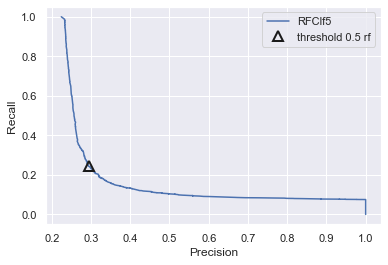

In [25]:
precision_RFClf5, recall_RFClf5, thresholds_RFClf5 = precision_recall_curve(y_test, RFClf5.predict_proba(X_test)[:, 1])
plt.plot(precision_RFClf5, recall_RFClf5, label="RFClf5")
close_default_RFClf5 = np.argmin(np.abs(thresholds_RFClf5 - 0.5))
plt.plot(precision_RFClf5[close_default_RFClf5], recall_RFClf5[close_default_RFClf5], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

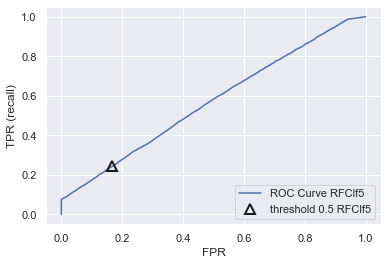

In [26]:
fpr_RFClf5, tpr_RFClf5, thresholds_RFClf5 = roc_curve(y_test, RFClf5.predict_proba(X_test)[:, 1])
plt.plot(fpr_RFClf5, tpr_RFClf5, label="ROC Curve RFClf5")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
#plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_RFClf5 = np.argmin(np.abs(thresholds_RFClf5 - 0.5))
plt.plot(fpr_RFClf5[close_default_RFClf], tpr_RFClf5[close_default_RFClf], '^', markersize=10, 
         label="threshold 0.5 RFClf5", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [27]:
RFClf_auc = roc_auc_score(y_test, RFClf5.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(RFClf_auc))

AUC for Random Forest: 0.569


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="FeatureOptimization1"> </A> <h2>Feature Optimization 1</h2>

The output of **feature engineering** is a clean and meaningful set of features that can be consumed by algorithms to identify patterns and build an ML model, which can further be applied on unseen data to predict the possible outcome.<br> In order to have an efficient ML system, often **feature optimization** is carried out to reduce the feature dimension and retain only the important/meaningful features, which will reduce the computation time and improve prediction performance.<br> Note that **ML model building is an iterative process**.<br>
**(Swamynathan, 2019).** Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. A Practical Implementation Guide to Predictive Data Analytics Using Python (2nd Ed.). Apress.

In this case, there are just a few of features, but we can also gain some practice in looking for feature optimization.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="CollinearColumns1"> </A> <h3>Collinear Columns 1</h3>

Correlated features can make coefficients in regression (or feature importance in tree models) unstable or difficult to interpret."(**Harrison, 2019**)(Harrison, Machine Learning Pocket Reference: Working with Structured Data in Python, 2019).

The "correlated_columns" function taken from (Harrison, 2019) helps to find columns that have a correlation coefficient of .95 or above.

In [28]:
def correlated_columns(df, threshold=0.95):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(np.tril(df1, k=-1),
                                     columns=df.columns,
                                     index=df.columns,
                                    )
        )
        .stack().rename("pearson").pipe(
            lambda s: s[
                s.abs() > threshold].reset_index()
        ).query("level_0 not in level_1")
    )

In [29]:
correlated_columns(HIC)

Empty DataFrame
Columns: [level_0, level_1, pearson]
Index: []

No highly correlated colums were found.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="CorrelationHeatmap1"> </A> <h3>Correlation Heatmap 1</h3>

In [69]:
HIC.corr()

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  \
tpa_fctzd      1.00e+00       0.04        0.44     -1.99e-02    -5.59e-03   
sex_fctzd      4.29e-02       1.00        0.02     -5.23e-02    -6.18e-02   
prod_fctzd     4.42e-01       0.02        1.00      3.43e-02    -1.89e-02   
policy_fctzd  -1.99e-02      -0.05        0.03      1.00e+00    -4.65e-02   
sum_insured   -5.59e-03      -0.06       -0.02     -4.65e-02     1.00e+00   
fraud         -1.25e-02       0.05        0.01      8.90e-03    -5.06e-04   

                 fraud  
tpa_fctzd    -1.25e-02  
sex_fctzd     4.97e-02  
prod_fctzd    1.49e-02  
policy_fctzd  8.90e-03  
sum_insured  -5.06e-04  
fraud         1.00e+00

As we previously verified there are not highly correlated features. The biggest correlated are tpa_fctz and prod_fctz.<br> We can create a heatmap to nicely look for stronger correlations.<br> Code taken from **(Harrison, 2019)**.

In [78]:
limit = 0.95

In [74]:
CorrCols = HIC.corr()

In [75]:
mask = np.triu(np.ones(CorrCols.shape), k=1).astype(bool)

In [76]:
CorrCols_no_diag = CorrCols.where(mask)

In [79]:
coll = [c for c in CorrCols_no_diag.columns if any(abs(CorrCols_no_diag[c]) > limit)]

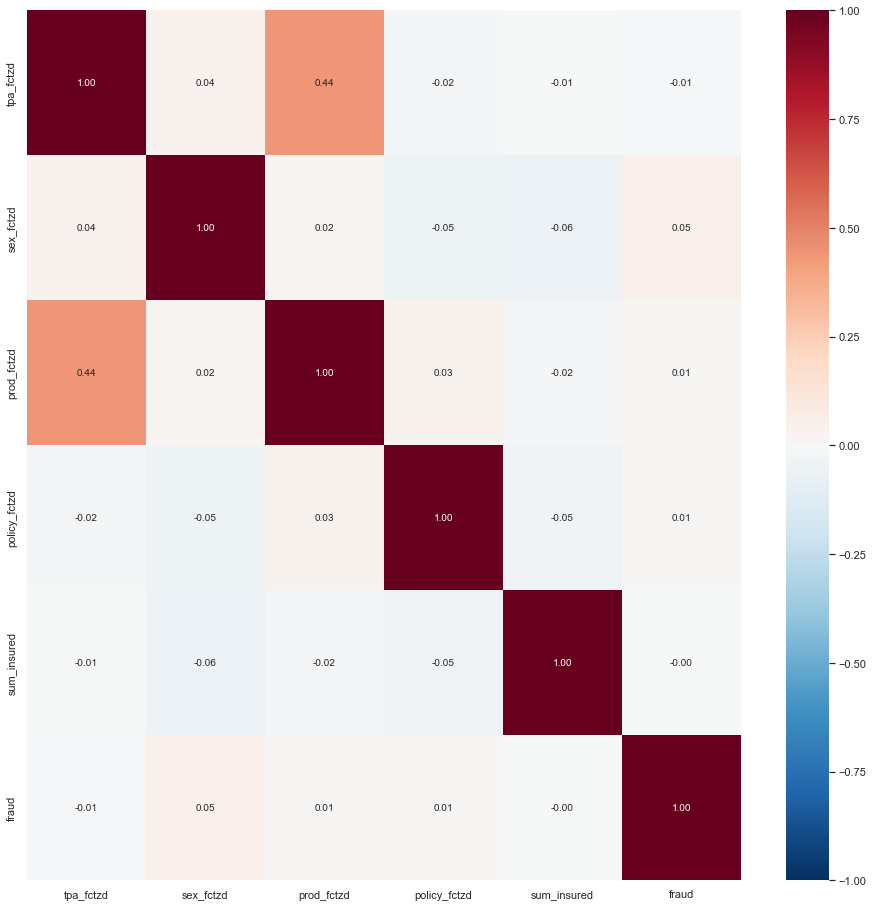

In [81]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(16, 16))
ax = heatmap(HIC.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1,)

We also generally noted that no feature could be considered highly correlated with fraud. There are a couple of negative features correlated with fraud.<br> So, if we had a lot of features, could we remove the negatively correlated ones with the target value without affecting our model?

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="ScoresIfDropNegCorrFeats1"> </A> <h3>Scores if remove columns or features 1</h3>

In [30]:
# what if remove  features negatively correlated with fraud?
# Code taken from **(Harrison, 2019)**.
cols_to_remove = ['tpa_fctzd', 'sum_insured']

In [31]:
rf7 = RandomForestClassifier(random_state=0)
rf7.fit( X_train [ [c for c in X_train.columns
                    if c not in cols_to_remove]
                 ], y_train)
rf7.score( X_test[ [c for c in X_train.columns
                     if c not in cols_to_remove]
                   ],y_test)

0.7926

In [32]:
rf8 = RandomForestClassifier(random_state=0)
rf8.fit(X_train, y_train)
rf8.score(X_test, y_test)

0.78756

We noticed a small difference. So it seems that we could remove the features negative correlated with our target value. **Nevertheless we should keep in mind that our best ML model was not a linear model. So not all the relationships are precisely linear**.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="FeaturesLessImp1"> </A> <h3>Features that are less important 1</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="LassoRegression1"> </A> <h4>Lasso Regression 1</h4>

According to **Harrison (2019)**, with lasso regression, you can set an alpha parameter that acts as a regularization parameter, then as you increase the value, it gives less weight to features that are less important.<br> Then **Harrison (2019)** shows how to use the LassoLarsCV model to iterate over various values of alpha and track the feature coefficients.

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

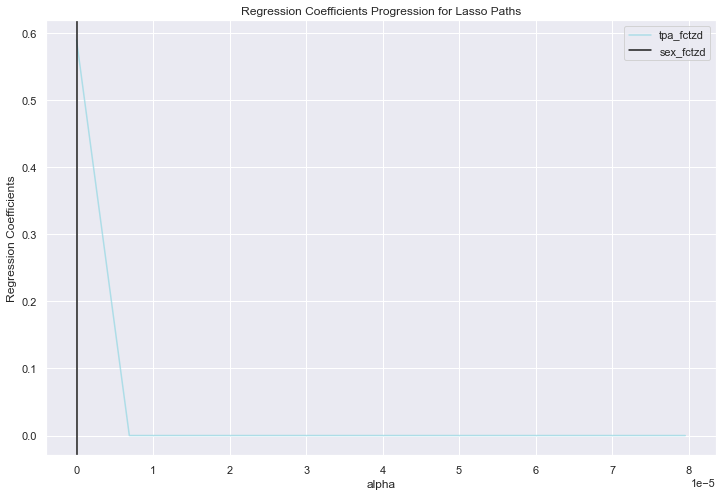

In [36]:
from sklearn import linear_model
model = linear_model.LassoLarsCV(
    cv=10, max_n_alphas=10).fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(12, 8))
cm = iter(plt.get_cmap("tab20")(np.linspace(0, 1, XGen.shape[1])))
for i in range(XGen.shape[1]):
    c = next(cm)
ax.plot(model.alphas_,
        model.coef_path_.T[:, i],
        c=c,
        alpha=0.8,
        label=XGen.columns[i])
ax.axvline(model.alpha_,
           linestyle="-",
           c="k",
           label="alphaCV")
plt.ylabel("Regression Coefficients")
ax.legend(XGen.columns, bbox_to_anchor=(1, 1))
plt.xlabel("alpha")
plt.title("Regression Coefficients Progression for Lasso Paths")

From the above plot we could interpret that tpa_fctz is the less important feature. I could agree for tpa_fctz as not so important feature but sex_fctz it was the highest important feature according to the correlation. **Nevertheless we should keep in mind that our best ML model was not a linear model. So not all the relationships are precisely linear**

In [44]:
HIC.corr().sort_values(by='fraud')

tpa_fctzd  sex_fctzd  prod_fctzd  policy_fctzd  sum_insured  \
tpa_fctzd      1.00e+00       0.04        0.44     -1.99e-02    -5.59e-03   
sum_insured   -5.59e-03      -0.06       -0.02     -4.65e-02     1.00e+00   
policy_fctzd  -1.99e-02      -0.05        0.03      1.00e+00    -4.65e-02   
prod_fctzd     4.42e-01       0.02        1.00      3.43e-02    -1.89e-02   
sex_fctzd      4.29e-02       1.00        0.02     -5.23e-02    -6.18e-02   
fraud         -1.25e-02       0.05        0.01      8.90e-03    -5.06e-04   

                 fraud  
tpa_fctzd    -1.25e-02  
sum_insured  -5.06e-04  
policy_fctzd  8.90e-03  
prod_fctzd    1.49e-02  
sex_fctzd     4.97e-02  
fraud         1.00e+00

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="UnivariateSelection1"> </A> <h4>Univariate Selection by SelectKBest 1</h4>

Taken from: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e <br>
Statistical tests can be used to select those features that have the strongest relationship with the output variable.<br>
The **scikit-learn** library provides the **SelectKBest** class that can be used with a suite of different statistical tests to select a specific number of features.<br>
The example below uses the **chi-squared (chi²) statistical test for non-negative features** to select 5 of the best features.

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(XGen,yGen)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(XGen.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

          Specs      Score
4   sum_insured  268568.39
1     sex_fctzd     133.27
2    prod_fctzd     105.63
0     tpa_fctzd      95.78
3  policy_fctzd      27.42


But do we know what is the distribution of our data?. Then chi2 might not be the right test.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="FeatImpFroMod1"> </A> <h4>Feature Importance from Tree Based Classifiers 1</h4>

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.<br>
Feature importance gives you a score for each feature of your data, **the higher the score more important or relevant is the feature towards your output variable**.<br>
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 5 features for the dataset.

[0.14166826 0.0321093  0.3583288  0.15027068 0.31762297]


Text(0.5, 1.0, 'Top 5 most importan features by their highest score')

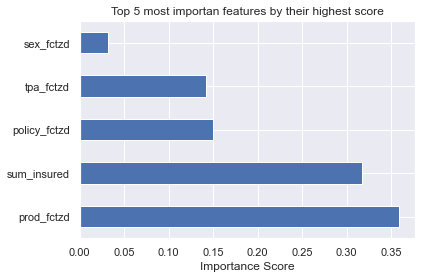

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(XGen,yGen)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XGen.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Importance Score")
plt.title("Top 5 most importan features by their highest score")
#plt.show()

This could be the most adequate modelt to test the feature importance as it is based on the same family models for which we got the best model. We could also see what is we exclude the less important columns according to the above plot.

In [59]:
# what if remove  features less important features to fraud?
# Code taken from **(Harrison, 2019)**.
cols_to_remove = ['sex_fctzd', 'tpa_fctzd']

In [60]:
rf7 = RandomForestClassifier(random_state=0)
rf7.fit( X_train [ [c for c in X_train.columns
                    if c not in cols_to_remove]
                 ], y_train)
rf7.score( X_test[ [c for c in X_train.columns
                     if c not in cols_to_remove]
                   ],y_test)

0.79056

In [61]:
rf8 = RandomForestClassifier(random_state=0)
rf8.fit(X_train, y_train)
rf8.score(X_test, y_test)

0.78756

It also seems to be a not big difference. But we should handle with caution all these tests. These tests are now as demonstrative and as a possibility when we have many features and we like to keep with the most neccesary.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Conclusions1"> </A> <h2>Conclusions of part 1</h2>

Performance metric values are not too bad despite the few features being used and the unbalanced class of fraud not being explicitly addressed. This may indicate the following:<br>
>1) These few features are sufficiently relevant to the model.

>2) Some small but important adjustments to the modeling parameters (class_weight) could make some difference in accuracy but not much difference in the ratio of FP/TP which also affects  performance metrics as Recall-Precision and ROCAUC

>3) The algorithm of RandomForestClassifier seems adequate for fraud prediction purposes.

>4) The tests for Feature Importance or feature optimization have to be treated carefully by selecting the appropiate test for the data distribution or selecting a feature importance parameter from a model simmilar to the resulted most successful model for the target o predicted feature (as in our case the use of Tree Based Classifiers which is somehow simmilar to the RandomForestClassifier).

>5) In general terms, the first process for the creation of the first prototypes (phases I, II, III, IV and IV of the CRISP'DM framework) seems to have been successful despite its limitations.

You can see that most of the effort in this first part was put into **feature engineering**.<br> 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA2"> </A> <h2>Second EDA supported by the power of feature engineering.</h2>

In view of the power of feature engineering, it seems convenient to take more advantage of its power because there are more features to apply it to.<br>
This power is not surprising when we review some literature that emphasizes the importance of this stage of the ML modeling process:

The question of how to represent your data best for a  particular application is known as **feature engineering**, and it is one of the main tasks of data scientists and machine learning practitioners trying to solve real-world problems.<br>**Feature engineering** is often an important place to use expert knowledge for a particular application.<br> Representing your data in the right way can have a bigger influence on the performance of a supervised model than the exact parameters you choose.
<br>**(Müller & Guido, 2017).** Müller, A., & Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. O’Reilly.

"One of the most creative parts of the data science process—literally the art of data
science—is the **feature engineering** stage". <br>**(Pochiraju et. al, 2019)**.Pochiraju, B., Seshadri, S., & (Editors). (2019). Essentials of Business Analytics: An Introduction to the Methodology and its Applications. Springer.

The **feature engineering** part is talked about as **an art form** and is the key differentiator in competitive ML. <br>**(Swamynathan, 2019).** Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. A Practical Implementation Guide to Predictive Data Analytics Using Python (2nd Ed.). Apress.

So, for this second part, rather than focusing on the feature engineering part, the focus will be divided into three important aspects that complement or follow this engineering:

>1) The treatment of missing data.

>2) The treatment of the imbalance of the classes of the variable or characteristic to be predicted.

>3) Modeling and recognition of the most important characteristics.

When applying feature engineering through factoring (numerical conversion of object or categorical features) to all features (except those referring to date and time), the tactics to be used in each of the above aspects will be:

>1) Impute missing values with "IterativeImputer".

> 2) Perform random oversampling of minority classes (frauds) using the "RandomOverSampler" library

> 3) Make supervised machine learning models without considering unbalanced classes and then with balanced classes to appreciate the differences in their metrics. And outline the most important features with a view towards model optimization.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Summ2"> </A> <h2>Summary of essential cells previous to construct SECOND and THIRD group of SML models(first without considering unbalanced target class, later with oversampling of minority target class).</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
#set option to display all columns contained into the dataframe
pd.set_option('display.max_columns', None) 
pd.set_option('display.precision',2)

In [5]:
#loads healt_insurance_claims.csv
HIC2=pd.read_csv("health_insurance_claims.csv")

In [6]:
'''
Feature Engineering on object features 
by convertion of categorical variables to numerics
that can easily be factorized 
independently of their number of classes.

From low quantities of classes (tens) such as:
tpa(23 classes), sex(2), prod_code(8), policy_type(9), payment_type(6),
hosp_type(2), recommendation(3)
to high quantities of classes (thousands) such as:
policy_ref(46,552), member_id(86,552), claim_ref(92,633)
hospital_id(13,303), hos_zipcode(2,815)
'''
HIC2['tpa_fctzd'] = pd.factorize(HIC2['tpa'])[0]
HIC2['sex_fctzd'] = pd.factorize(HIC2['sex'])[0]
HIC2['prod_code_fctzd'] = pd.factorize(HIC2['prod_code'])[0]
HIC2['policy_type_fctzd'] = pd.factorize(HIC2['policy_type'])[0]
HIC2['payment_type_fctzd'] = pd.factorize(HIC2['payment_type'])[0]
HIC2['hosp_type_fctzd'] = pd.factorize(HIC2['hosp_type'])[0]
HIC2['recomdtn_fctzd'] = pd.factorize(HIC2['recommendation'])[0]

HIC2['policy_ref_fctzd'] = pd.factorize(HIC2['policy_ref'])[0]
HIC2['member_id_fctzd'] = pd.factorize(HIC2['member_id'])[0]
HIC2['claim_ref_fctzd'] = pd.factorize(HIC2['claim_ref'])[0]
HIC2['hosp_id_fctzd'] = pd.factorize(HIC2['hospital_id'])[0]
HIC2['hosp_zipcd_fctzd'] = pd.factorize(HIC2['hos_zipcode'])[0]

In [7]:
# options lists of features to be used to calculate the imputed features
# these features are the `neighbor_feat_idx` indicated in the manual of IterativeImputer
Feats1Use2Impute=['tpa_fctzd', 'policy_ref_fctzd', 'member_id_fctzd',
                  'prod_code_fctzd', 'policy_type_fctzd', 'sum_insured',
                 'claim_ref_fctzd', 'hosp_zipcd_fctzd']
Feats2Use2Impute=['claim_amt', 'nursing_chg', 'surgery_chg', 'cons_fee',
                  'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp',
                  'post_hosp_exp', 'other_chg_non_hosp', 'copayment',
                  'settle_amt','payment_type_fctzd', 'hosp_type_fctzd',
                 'recomdtn_fctzd', 'fraud']
Feats3Use2Impute=['tpa_fctzd', 'policy_ref_fctzd', 'member_id_fctzd',
                  'prod_code_fctzd', 'policy_type_fctzd', 'sum_insured',
                 'claim_ref_fctzd', 'hosp_zipcd_fctzd',
                  'claim_amt', 'nursing_chg', 'surgery_chg', 'cons_fee',
                  'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp',
                  'post_hosp_exp', 'other_chg_non_hosp', 'copayment',
                  'settle_amt','payment_type_fctzd', 'hosp_type_fctzd',
                 'recomdtn_fctzd', 'fraud']
# the more features used to impute the better. So we'll use Feats3Use2Impute
# list of tuples of features to be imputed
# these features are the `feat_idx` indicated in the manual of IterativeImputer
LFeats2Impute = ['sex_fctzd','hosp_id_fctzd']

# Creates X dataframe to be used by the .fit_transform for the IterativeImputer
X=pd.concat([HIC2[LFeats2Impute], HIC2[Feats3Use2Impute]], axis=1)

# load libraries to use IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# creates an instance of the IterativeImputer with the enclosed parameters
# did knew how to get integer values for the imputed features
ItImper=IterativeImputer(
    missing_values=-1, # in this case it indicates NaNs to IterativeImputer
    n_nearest_features=8,#the number of features used to impute the current feature
    min_value=0, #to restrict the value of imputed feature
    max_value=1, #otherwise values could be negatives or bigger than specified range
    initial_strategy='most_frequent',
    random_state=0)
# specifies the list of tuples for the imputation_sequence_ attribute
Imp_Seq=( HIC2[LFeats2Impute], HIC2[Feats3Use2Impute] )
# updates the attribute "imputation_sequence_" of "IterativeImputer" instance (ItImper) 
ItImper.imputation_sequence_=Imp_Seq
# trains or fits the previously created dataframe (X)
# which only contains features to be imputed and features to be used to the imputed ones
# returning the transformed or imputed values to "Imputed" variable
Imputed=ItImper.fit_transform(X)
# copy imputed values into the working and reference dataframe HIC2
HIC2['sex_fctzd']=Imputed[:,0]
HIC2['hosp_id_fctzd']=Imputed[:,1]
# imputed 'sex_fctzd' values are floats, but we need them to be integers, so
# rounds imputed 'sex_fctzd' values: from [0,0.5] will be 0 or Male,
# from (0.5,0.99] will be 1 or Female. ie 0 to 0.5 Male, greater than 0.5 Female.
HIC2['sex_fctzd']=HIC2['sex_fctzd'].round()
#Optional:remove a couple of wealthy outliers of sum_insured=1.13e09.
# Is optional to avoid overfitting and include outliers as a good practice
# for some of negative results of Artificial Inteligence which some times
# applies its algorithms precisely to outliers and affecting them. i.e. reduce bias
#HIC2.drop([55893,55894],inplace=True)

In [8]:
'''
Convert object(date) features to timestamp
In order to try to review and improve the points to create a fraud score by the
Ideal Insurance Company (IIC) rule-based decision support systems,
we wiil investigate features containing dates to determine its possible relationship with  fraud. 
Then it is first necessary to convert them to the timestamp type.
'''
HIC2['dob']=pd.to_datetime(HIC2['dob'], errors = 'coerce')
HIC2['policy_start_dt']=pd.to_datetime(HIC2['policy_start_dt'], errors = 'coerce')
HIC2['policy_end_dt']=pd.to_datetime(HIC2['policy_end_dt'], errors = 'coerce')
HIC2['claim_dt']=pd.to_datetime(HIC2['claim_dt'], errors = 'coerce')
HIC2['admit_dt']=pd.to_datetime(HIC2['admit_dt'], errors = 'coerce')
HIC2['discharge_dt']=pd.to_datetime(HIC2['discharge_dt'], errors = 'coerce')
HIC2['payment_dt']=pd.to_datetime(HIC2['payment_dt'], errors = 'coerce')

# I noticed a couple of 'NaT' (NaN or nulls for datetime) in `dob`.
# And as they were irrelevant, I decided to drop them.
# drop NaN by specific column
HIC2=HIC2.dropna(subset=['dob'])

In [9]:
# rearrange columns to easily compare features factorized and not factorized
HIC2=HIC2[['tpa', 'tpa_fctzd', 'policy_ref', 'policy_ref_fctzd', 'member_id',
           'member_id_fctzd', 'sex', 'sex_fctzd', 'dob', 'policy_start_dt', 'policy_end_dt',
           'prod_code', 'prod_code_fctzd', 'policy_type', 'policy_type_fctzd',
           'sum_insured', 'claim_ref', 'claim_ref_fctzd', 'claim_dt', 'hospital_id',
           'hosp_id_fctzd', 'hos_zipcode', 'hosp_zipcd_fctzd', 'hosp_type', 'hosp_type_fctzd',
           'admit_dt', 'discharge_dt',  'claim_amt', 'nursing_chg', 'surgery_chg', 'cons_fee',
           'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp', 'post_hosp_exp',
           'other_chg_non_hosp', 'copayment', 'recommendation', 'recomdtn_fctzd',
           'settle_amt', 'payment_dt', 'payment_type', 'payment_type_fctzd', 'fraud']]

In [10]:
# Up to this point we have the whole dataframe converted to their more manageble dtype features,
# then it might be convenient to have this dataframe as a reference for future needs.
# So we create another working dataframe
HIC3=HIC2.copy()

In [11]:
'''
keeps only numeric features in order to perfom a second round of SML
without and with considering the unbalanced target data class issue
so it can be notice three big differences:
1) SML models performance without and with data inbalanced treatment
2) The importance of used features and those not yet used features (datetime features)
3) Consider the predictive power of SML models without the help of
Domain Knowledge but with a possible decrease in business sense or logic.
'''
HIC3=HIC3[['tpa_fctzd', 'policy_ref_fctzd', 'member_id_fctzd', 'sex_fctzd',
           'prod_code_fctzd', 'policy_type_fctzd', 'claim_ref_fctzd',
           'hosp_id_fctzd', 'hosp_zipcd_fctzd', 'hosp_type_fctzd', 
           'claim_amt', 'nursing_chg', 'surgery_chg', 'cons_fee',
           'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp',
           'post_hosp_exp', 'other_chg_non_hosp', 'copayment', 
           'recomdtn_fctzd', 'settle_amt', 'payment_type_fctzd', 'fraud']]

In [12]:
## Creates sets and normalize them for ML models 2
# separate the features and targets
XGen=HIC3.drop(['fraud'], axis=1) # selects the whole DF except the fraud column 
yGen=HIC3.iloc[:,-1]  # selects all rows of the last column 'fraud' as target
# whith a clean and expanded dataframes (X,y) we can then proceed to the modeling phase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XGen, yGen, random_state=0)

# NORMALIZING BY SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NORMALIZING BY standardization
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [13]:
#### Random over-sampling with imblearn. For second SML models ####
'''
One way to fight imbalanced data is to generate new samples in the minority classes. 
The most naive strategy is to generate new samples by randomly sampling with replacement
of the currently available samples. The RandomOverSampler offers such a scheme.
'''
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
# fit predictor and target variable
X_train_ros, y_train_ros = ros.fit_resample(XGen, yGen)

In [14]:
HIC3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tpa_fctzd           99998 non-null  int64  
 1   policy_ref_fctzd    99998 non-null  int64  
 2   member_id_fctzd     99998 non-null  int64  
 3   sex_fctzd           99998 non-null  float64
 4   prod_code_fctzd     99998 non-null  int64  
 5   policy_type_fctzd   99998 non-null  int64  
 6   claim_ref_fctzd     99998 non-null  int64  
 7   hosp_id_fctzd       99998 non-null  float64
 8   hosp_zipcd_fctzd    99998 non-null  int64  
 9   hosp_type_fctzd     99998 non-null  int64  
 10  claim_amt           99998 non-null  float64
 11  nursing_chg         99998 non-null  float64
 12  surgery_chg         99998 non-null  float64
 13  cons_fee            99998 non-null  float64
 14  test_chg            99998 non-null  float64
 15  pharmacy_cost       99998 non-null  float64
 16  othe

In [134]:
HIC2.sample(6)

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
75663   D          3  NA4-1TMNX41WH             31881  SR9-W89RE0   
30119   F          5  FR9-7ABEY21TF             11127  XU1-P43ZT0   
8226    D          3  DH9-4MGPE74DI              3502  EF8-A61KH8   
2965    F          5  SN3-6IRAJ90LM              2760  AD2-J85JO2   
59837   M         12  NO5-5RVTM52PT             25340  VY1-P89IM9   
91113   E          4  CP1-7VYGP60GG             41983  LN0-I27IF8   

       member_id_fctzd sex  sex_fctzd        dob policy_start_dt  \
75663            64673   M        0.0 2003-05-11      2008-09-29   
30119            25060   M        0.0 1985-04-26      2009-12-16   
8226              7208   F        1.0 1969-10-03      2009-10-29   
2965              2890   M        0.0 1968-10-29      2009-12-18   
59837            51262   F        1.0 1979-01-25      2007-12-04   
91113            78464   F        1.0 1982-03-02      2010-01-01   

      policy_end_dt prod_code  prod_code_fctzd policy_type  policy_type_fctzd  \
75663    2009-09-28         A                0           B                  8   
30119    2009-12-16         A                0           A                  7   
8226     2010-10-28         A                0           D                  0   
2965     2010-12-17         A                0           B                  8   
59837    2009-02-28         A                0           D                  0   
91113    2010-12-31         A                0           B                  8   

       sum_insured   claim_ref  claim_ref_fctzd   claim_dt hospital_id  \
75663         5000   DY8-X1N24            68864 2008-09-23  UBF-XMR383   
30119         5000  ZW4-U75G92            28002 2010-04-11         NaN   
8226          1250  YD9-U26Z66             7564 2010-04-16  UXJ-ZUU409   
2965         10000   QU8-J2N22             2472 2010-06-25   TNL-YNU39   
59837        10000  RS1-Z61C79            54491 2008-01-07  SQY-BKG271   
91113        25000  ER1-L25E96            84010 2010-04-02         NaN   

       hosp_id_fctzd hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd  \
75663         9029.0    ZD25KR16                16         N                0   
30119            1.0    QX10EO58              1366         N                0   
8226          1974.0    LP33DB44              1073         N                0   
2965           826.0     WI19YE3               612         Y                1   
59837         3086.0    IT30MD76               281         Y                1   
91113            1.0    RQ21DB26               453         Y                1   

        admit_dt discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  \
75663 2008-04-09   2008-08-09     946.65         0.00         0.00      0.00   
30119 2010-03-03   2010-03-04     400.93        39.05         0.00     23.43   
8226  2010-02-21   2010-02-22     362.23         0.00        28.48    105.95   
2965  2010-06-25   2010-07-01    1795.10       391.66         0.00    554.85   
59837 2008-07-27   2008-09-04    2367.29       317.08       734.34    787.33   
91113 2010-04-02   2010-04-02    2235.54         0.00         0.00      0.00   

       test_chg  pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  \
75663    138.66         266.40     541.59          0.00           0.00   
30119     39.05          28.53       0.00          0.00          43.06   
8226       5.70         210.71      11.39          0.00           0.00   
2965     356.84         234.89       0.00        199.09          72.89   
59837    322.44         206.10       0.00          0.00           0.00   
91113      0.00           0.00       0.00          0.00           0.00   

       other_chg_non_hosp  copayment recommendation  recomdtn_fctzd  \
75663                 0.0        0.0        Genuine               0   
30119                 0.0        0.0        Genuine               0   
8226                  0.0        0.0        Genuine               0   
2965                  0.0 

In [13]:
HIC2.hosp_id_fctzd.value_counts(ascending=True)

6649.0        1
8092.0        1
8094.0        1
8095.0        1
8096.0        1
          ...  
1314.0      825
19.0       1836
51.0       3420
1.0       19750
0.0       27067
Name: hosp_id_fctzd, Length: 13305, dtype: int64

From the above output of "HIC2.sample(6)" and "HIC2.hosp_id_fctzd.value_counts", we notice that for previous 21,393 `hospital_id` NaNs, most a them (19,750) were factorized as 1. This seems not so good for a couple of reasons. One is that the missing `hospital_id` appears to be as a new class rather than distributed according to its `hos_zipcode`. The other reason is that so many missing `hospital_id` suggest that there could be a major flaw in the information capture processes and systems or a suspicious and ill-intentioned manipulation or misrepresentation of the information.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="SMLModels2"> </A> <h3>SECOND SML models group to test current features importance (all numerical and none explicit date-time) to predict frauds without considering unbalanced target data class.</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="LogReg2"> </A> <h3>Logistic Regression SML 2 (without considering the unbalanced target data class).</h3>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [19]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
y_pred = logreg.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Training set score: 0.784
Test set score: 0.781
[[19537     1]
 [ 5462     0]]


C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="RFCl2"> </A> <h3>Random Forest Classifier SML2 (without considering the unbalanced target data class).</h3>

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [17]:
# RandomForestClassifier X_train
RFClf = RandomForestClassifier()
RFClf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf.score(X_test, y_test)))
y_pred = RFClf.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 1.000
Accuracy on test set: 0.774
[[19277   261]
 [ 5380    82]]


In [20]:
# RandomForestClassifier with X_train_std
RFClf4 = RandomForestClassifier(class_weight='balanced', random_state=0)
RFClf4.fit(X_train_std, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf4.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf4.score(X_test_std, y_test)))
y_pred = RFClf4.predict(X_test_std)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 1.000
Accuracy on test set: 0.774
[[19286   252]
 [ 5392    70]]


In [21]:
# RandomForestClassifier with X_train_std. 
RFClf5 = RandomForestClassifier(class_weight={0:1,1:3}, random_state=0)
RFClf5.fit(X_train_std, y_train)
print("Accuracy on training set: {:.3f}".format(RFClf5.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(RFClf5.score(X_test_std, y_test)))
y_pred = RFClf5.predict(X_test_std)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 1.000
Accuracy on test set: 0.774
[[19282   256]
 [ 5385    77]]


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EvalMetsRFClfSML2"> </A> <h2>Evaluation metrics for RFClf SML2: Accuracy, Precision Recal Curve, ROC, AUC</h2>

In [22]:
from sklearn.metrics import precision_recall_curve

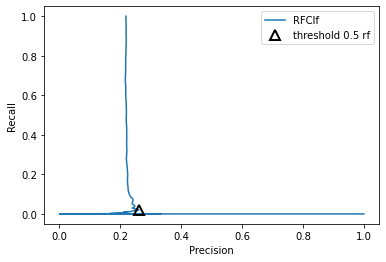

In [23]:
precision_RFClf, recall_RFClf, thresholds_RFClf= precision_recall_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
plt.plot(precision_RFClf, recall_RFClf, label="RFClf")
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(precision_RFClf[close_default_RFClf], recall_RFClf[close_default_RFClf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

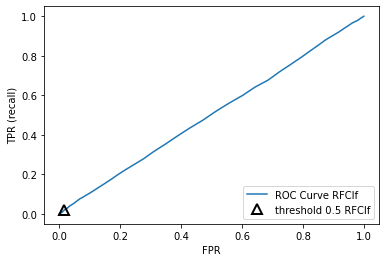

In [25]:
fpr_RFClf, tpr_RFClf, thresholds_RFClf = roc_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
#plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_RFClf, tpr_RFClf, label="ROC Curve RFClf")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
#plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(fpr_RFClf[close_default_RFClf], tpr_RFClf[close_default_RFClf], '^', markersize=10, 
         label="threshold 0.5 RFClf", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [26]:
RFClf_auc = roc_auc_score(y_test, RFClf.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(RFClf_auc))

AUC for Random Forest: 0.503


In [27]:
'''
https://www.scikit-yb.org/en/latest/
https://github.com/DistrictDataLabs/yellowbrick
https://pypi.org/project/yellowbrick/

yellowbrick used here to visualize the ROCAUC metrics
'''
import yellowbrick
from yellowbrick.classifier import ROCAUC

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\conza\AppData\Local\Temp\ipykernel_4004\3744799080.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  roc_viz.fig.show()


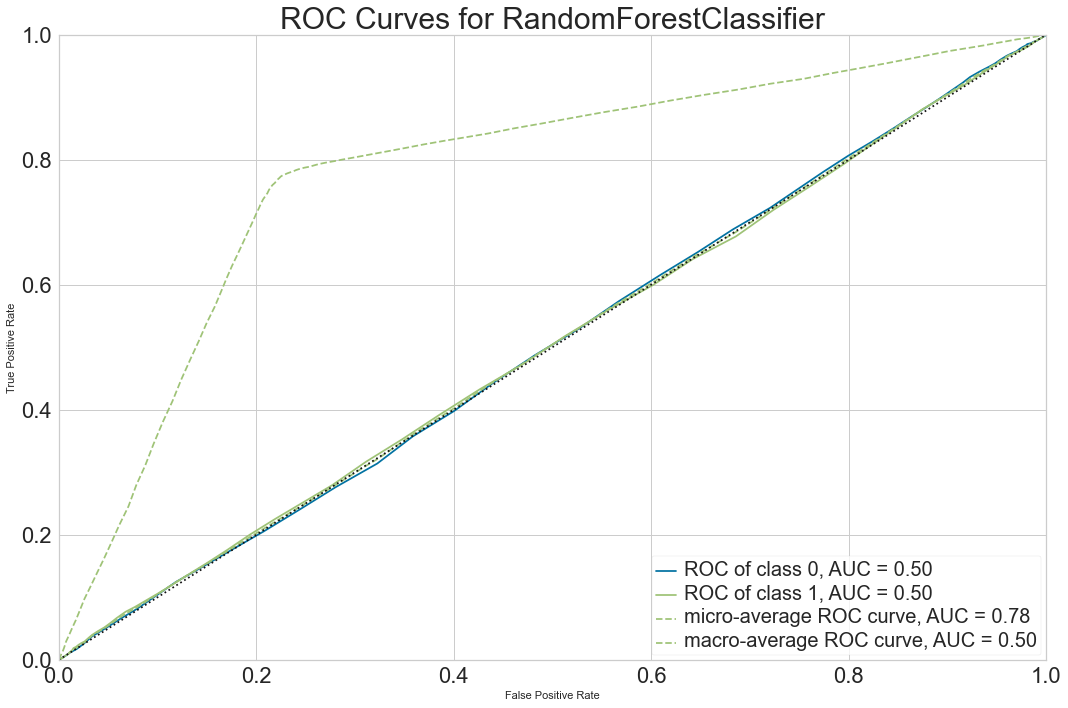

In [28]:
roc_viz = ROCAUC(RFClf,size=(1080, 720))
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)

#https://stackoverflow.com/questions/72217085/increase-font-size-of-title-labels-and-legend-for-yellowbrick-parallel-coordina
# Fit the visualizer and display it
roc_viz.finalize()  # creates title, legend, etc.
roc_viz.ax.tick_params(labelsize=22)  # change size of tick labels
roc_viz.ax.title.set_fontsize(30)  # change size of title

for text in roc_viz.ax.legend_.texts:  # change size of legend texts
     text.set_fontsize(20)

roc_viz.fig.tight_layout()  # fit all texts nicely into the surrounding figure
roc_viz.fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="SMLModels3"> </A> <h3>THIRD SML3 models group to test current features importance to predict frauds with random oversampling with imblearn.</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="LogReg3"> </A> <h3>Logistic Regression SML 3 With Random over-sampling</h3>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [30]:
logreg = LogisticRegression().fit(X_train_ros, y_train_ros)
print("Training set score: {:.3f}".format(logreg.score(X_train_ros, y_train_ros)))
print("Test set score: {:.3f}".format(logreg.score(X_train_ros, y_train_ros)))
y_pred = logreg.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Training set score: 0.510
Test set score: 0.510
[[9588 9950]
 [2604 2858]]


C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="RFCl3"> </A> <h3>Random Forest Classifier SML3. With Random over-sampling</h3>

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# RandomForestClassifier X_train
RFClf = RandomForestClassifier()
RFClf.fit(X_train_ros, y_train_ros)
print("Accuracy on training set: {:.3f}".format(RFClf.score(X_train_ros, y_train_ros)))
print("Accuracy on test set: {:.3f}".format(RFClf.score(X_test, y_test)))
y_pred = RFClf.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
[[19538     0]
 [    0  5462]]


The model is overfitted. 5462 frauds is about the 25% of total 21,692 frauds. So as the test set is about 25% of total values, the model is able to predict all the frauds.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EvalMetsRFClfSML3"> </A> <h3>Evaluation metrics for RFClf SML3: Accuracy, Precision Recal Curve, ROC, AUC</h3>

In [33]:
from sklearn.metrics import precision_recall_curve

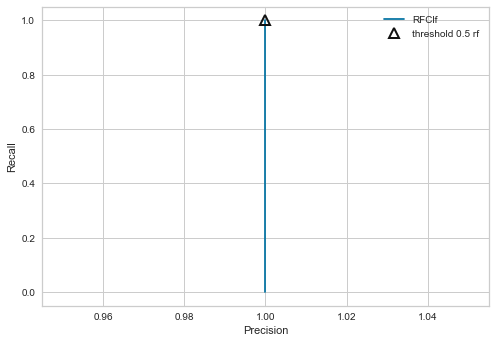

In [34]:
precision_RFClf, recall_RFClf, thresholds_RFClf= precision_recall_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
plt.plot(precision_RFClf, recall_RFClf, label="RFClf")
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(precision_RFClf[close_default_RFClf], recall_RFClf[close_default_RFClf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

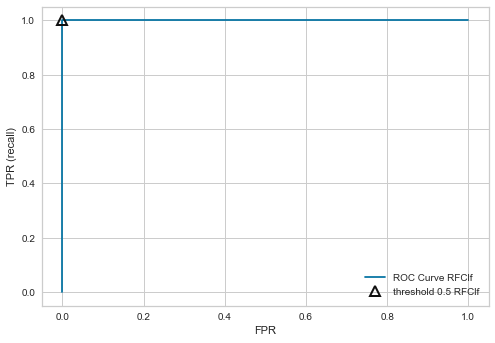

In [36]:
fpr_RFClf, tpr_RFClf, thresholds_RFClf = roc_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
#plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_RFClf, tpr_RFClf, label="ROC Curve RFClf")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
#plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(fpr_RFClf[close_default_RFClf], tpr_RFClf[close_default_RFClf], '^', markersize=10, 
         label="threshold 0.5 RFClf", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [37]:
RFClf_auc = roc_auc_score(y_test, RFClf.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(RFClf_auc))

AUC for Random Forest: 1.000


In [38]:
'''
https://www.scikit-yb.org/en/latest/
https://github.com/DistrictDataLabs/yellowbrick
https://pypi.org/project/yellowbrick/

yellowbrick used here to visualize the ROCAUC metrics
'''
import yellowbrick
from yellowbrick.classifier import ROCAUC

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\conza\AppData\Local\Temp\ipykernel_4004\3744799080.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  roc_viz.fig.show()


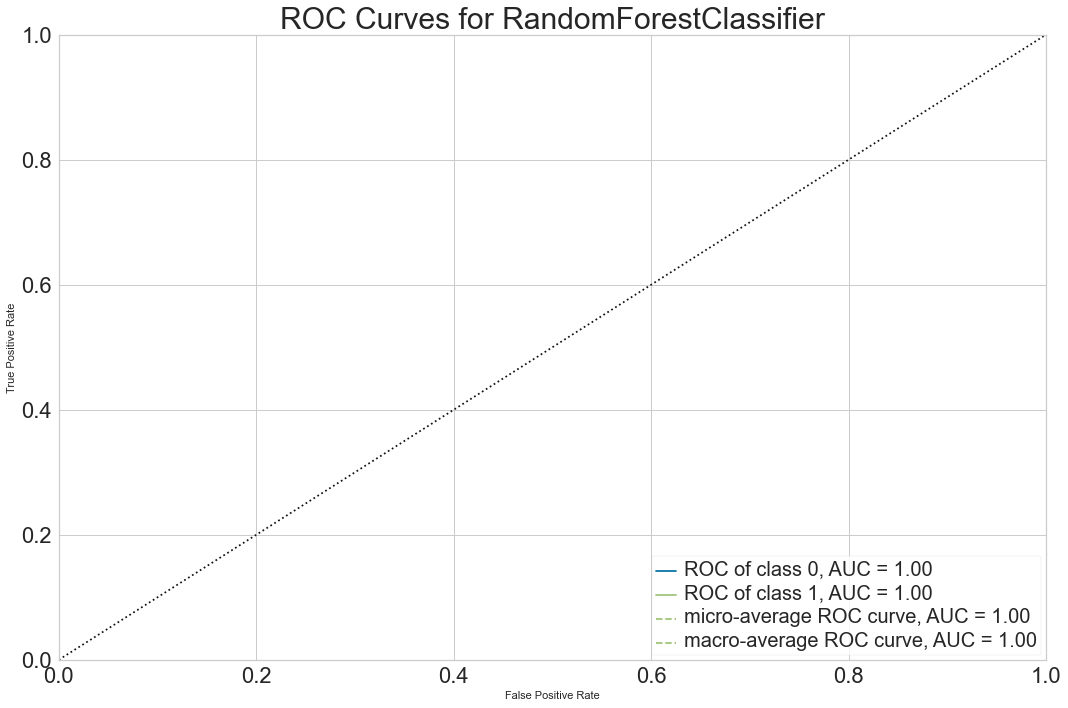

In [39]:
roc_viz = ROCAUC(RFClf,size=(1080, 720))
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)

#https://stackoverflow.com/questions/72217085/increase-font-size-of-title-labels-and-legend-for-yellowbrick-parallel-coordina
# Fit the visualizer and display it
roc_viz.finalize()  # creates title, legend, etc.
roc_viz.ax.tick_params(labelsize=22)  # change size of tick labels
roc_viz.ax.title.set_fontsize(30)  # change size of title

for text in roc_viz.ax.legend_.texts:  # change size of legend texts
     text.set_fontsize(20)

roc_viz.fig.tight_layout()  # fit all texts nicely into the surrounding figure
roc_viz.fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="FeatImpFroMod2"> </A> <h2>Importance  of features with  the balanced target class.</h2>

In [67]:
HIC3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tpa_fctzd           99998 non-null  int64  
 1   policy_ref_fctzd    99998 non-null  int64  
 2   member_id_fctzd     99998 non-null  int64  
 3   sex_fctzd           99998 non-null  float64
 4   prod_code_fctzd     99998 non-null  int64  
 5   policy_type_fctzd   99998 non-null  int64  
 6   claim_ref_fctzd     99998 non-null  int64  
 7   hosp_id_fctzd       99998 non-null  float64
 8   hosp_zipcd_fctzd    99998 non-null  int64  
 9   hosp_type_fctzd     99998 non-null  int64  
 10  claim_amt           99998 non-null  float64
 11  nursing_chg         99998 non-null  float64
 12  surgery_chg         99998 non-null  float64
 13  cons_fee            99998 non-null  float64
 14  test_chg            99998 non-null  float64
 15  pharmacy_cost       99998 non-null  float64
 16  othe

From https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e 

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.<br>
Feature importance gives you a score for each feature of your data, **the higher the score more important or relevant is the feature towards your output variable**.<br>
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.01394091 0.08186374 0.10872944 0.01671362 0.00223165 0.02239083
 0.10977679 0.04299981 0.07447035 0.00877504 0.11931855 0.03866668
 0.02154393 0.05350467 0.04241135 0.05249582 0.04091851 0.00876802
 0.01197137 0.00396232 0.00441032 0.00230493 0.10799302 0.00983834]


Text(0.5, 1.0, 'The higher the score the more relevant is the feature towards the output variable')

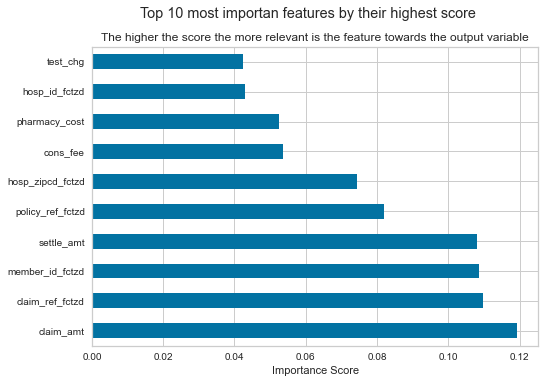

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(XGen,yGen)
#use inbuilt class or attribute "feature_importances" of RandomForestClassifier
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XGen.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Importance Score")
plt.suptitle("Top 10 most importan features by their highest score")
plt.title("The higher the score the more relevant is the feature towards the output variable")

In [57]:
#sns.countplot(HIC3.claim_amt,hue='fraud',data=HIC3)

In [44]:
# what if remove  top 10  important features to fraud?
cols_to_remove = ['test_chg','hosp_id_fctzd', 'pharmacy_cost', 'cons_fee', 'hosp_zipcd_fctzd',
                  'policy_ref_fctzd', 'settle_amt', 'member_id_fctzd', 'claim_ref_fctzd',
                  'claim_amt' ]

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf7 = RandomForestClassifier(random_state=0)
rf7.fit( X_train_ros [ [c for c in X_train_ros.columns
                    if c not in cols_to_remove]
                 ], y_train_ros)
rf7.score( X_test[ [c for c in X_train_ros.columns
                     if c not in cols_to_remove]
                   ],y_test)

0.82992

In [43]:
rf8 = RandomForestClassifier(random_state=0)
rf8.fit(X_train_ros, y_train_ros)
rf8.score(X_test, y_test)

1.0

With the top 10 features, the model is overfitted. So instead of removing any of these 10 most important features, we should look for the least important features that could be removed from the model.<br> It is also important to note the point made by **Müller and Guido (2017)**:"...if a feature has a low value in feature_importance_, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information." <br>
Müller, A., & Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. O’Reilly.

[0.01429608 0.0823977  0.10817448 0.01655782 0.00230012 0.02177183
 0.10942761 0.04323398 0.07413923 0.00881993 0.11888985 0.0386189
 0.02146539 0.05360156 0.04274713 0.05270684 0.04070905 0.00937414
 0.0121336  0.00415792 0.00443652 0.0025948  0.10758119 0.00986434]


Text(0.5, 1.0, 'The higher the score the more relevant is the feature towards the output variable')

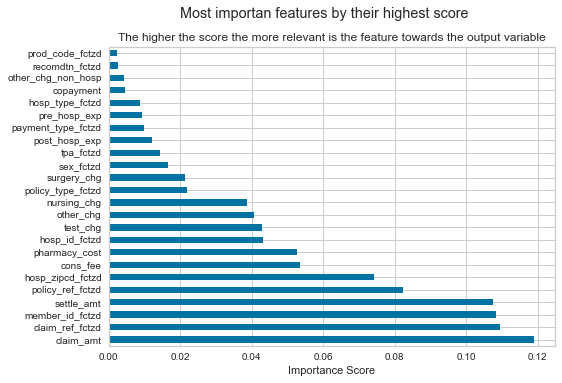

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(XGen,yGen)
#use inbuilt class or attribute "feature_importances" of RandomForestClassifier
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XGen.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.xlabel("Importance Score")
plt.suptitle("Most importan features by their highest score")
plt.title("The higher the score the more relevant is the feature towards the output variable")

As we can notice, the 10 most important characteristics are distributed within what we can consider the 3 groups of time with respect to the business perspective.<br>
>T1 features when the policy is issued:`policy_ref_fctzd`, `member_id_fctzd`<br>
>T2 features when the claim is generated: `claim_ref_fctzd`, `hosp_id_fctzd`, `hosp_zipcd_fctzd`
`claim_amt`,`cons_fee`,`test_chg`,`pharmacy_cost`.<br>
>T2 features when the claim is settled or paid:`settle_amt`.

With 2 functions for the first time group (T1), the system could identify a certain possibility of fraud in advance.<br> Thus, in the second phase (T2) with 7 more functions, the possibilities of identifying a fraud are increased.<br> Therefore, it might be more convenient to have more fraud indicators in the first time pool.<br> And for that purpose, date and time specific features could be very informative. Especially if these features serve as a foundation for features built more informative and predictive of fraud.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Conclusions2"> </A> <h2>Conclusions of SECOND and THIRD SML models</h2>

>1 Examples of the use of "IterativeImputer" are very scarce on the web. So it was a challenge to apply it to achieve the desired results.

>2. For this classification use case (and possibly for most such cases), consideration of the unbalanced target class is the most important aspect of achieving the best performance of a model.

>3 The power of SML models shows that with few features or variables (say 10 features) it is possible to obtain an exceptionally good predictive model that might even avoid having to create a set of rules designed by experts altogether.

>4 However, as pointed out by Müller & Guido (2017) "while the purpose of machine learning in many cases is to avoid having to create a set of expert-designed rules, that doesn’t mean that prior knowledge of the application or domain should be discarded".

>5 With the above and due to the fact that there are still unexplored features for fraud prediction purposes (explicit date and time features), it seems appropriate to carry out another round of feature exploration and creation for modeling and then focus on finding the best selection of variables or features, in order to generate the most suitable models, particularly to the computing power available, the quantity and quality of the data and the business requirements.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="EDA3"> </A> <h2>Third EDA supported on some of the points (specified by questions) used by the "Ideal Insurance Company" claims processing team to create their fraud score.</h2>

For a third big iteration of the **CRISP-DM** framework and according to its first phase of "Business Understanding", it seems convenient to go or be supported and compared by or with the "Substantive Expertise" domain. This way we will be more closely of working into the sweet spot or the **"Data Science"** intersection of **Drew Conway's** data science Venn diagram.

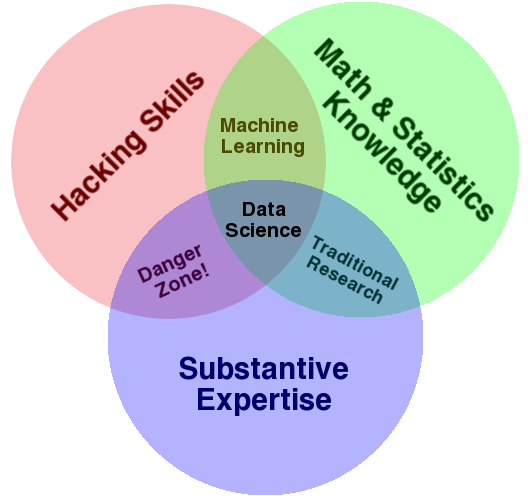

The data science venn diagram. source: http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram

**Müller & Guido (2017)** pointed out that "while the purpose of machine learning in many cases is to avoid having to create a set of expert-designed rules, that doesn’t mean that prior knowledge of the application or domain should be discarded". And also they added that "often domain experts can help in identifying useful features that are much more informative than the initial representation of the data".<br>
 Then, by being supported by the "Substantive Expertise" domain (in this case from the book chapter of current use case) it seems there are not contradictions neither from the machine learning domain of knowlegde, nor from the CRISP-DM framework.

Then, being supported by the knowledge of experts in the business domain or other interested parties, to go from the initial representation of the data and identify much more informative features, the creation of new features is almost essential. And although this involves extra work, it really is and should be considered a good investment leading to a better understanding of the problem addressed and the best construction of an efficient and effective model.

**Feature Construction or Generation**:<br>
Machine learning algorithms give the best results only when we provide them with the best possible features for the problem that you are trying to address. Often these features have to be manually created by spending a lot of time with actual raw data and trying to understand its relationship with all other data that you have collected to address a business problem.<br>
It means thinking about aggregating, splitting, or combining features to create new features or decomposing features.<br>
**Often this part is talked about as an art form, and is the key differentiator in competitive ML**.
Feature construction is manual, slow, and requires subject matter expert intervention heavily to create rich features that can be exposed to predictive modeling algorithms to produce the best results. <br>**(Swamynathan, 2019).** Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. A Practical Implementation Guide to Predictive Data Analytics Using Python (2nd Ed.). Apress.

**Focus on Feature Engineering**<br>
Relevant features lead to efficient models, not more features! Note that including a large number of features might lead to an overfitting problem.<br> Including relevant features in the model is the key to building an efficient model.<br> The **feature engineering** part is talked about as **an art form** and is the key differentiator in competitive ML. <br>**(Swamynathan, 2019).** Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. A Practical Implementation Guide to Predictive Data Analytics Using Python (2nd Ed.). Apress.

From the book where present use case is analyzed (Chapter 25 of "Essentials of Business Analytics"(https://link.springer.com/chapter/10.1007/978-3-319-68837-4_25)), 
there are a couple of very valuable findings or even critical to succeed into a better predictive model than it is menctioned into the book as the current of "rule-based decision support systems":<br>
I) The "Claims Processing" section. That in a very brief way gives an account of some key stages of the claims process as well as the characteristics (involving the variables used) to determine the score to consider the three types of recommendations (Genuine, Discuss, or Investigate) and thus try to predict the frauds.<br>
II) The "Data Descripcion" section, which also provides very brief guidance on the three groups of data collection by the transaction processing system (ERP):
    (1) when the policy is issued
    (2) when a claim is registered and 
    (3) while its progress is being tracked. 

So in this second part to incorporate the substantive expertise and the expert knowledge, tries to answer and comment about the twelve questions to create the fraud score, indicated in the claims processing section.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q1"> </A> <h3>1. Is the policyholder raising reimbursement claims from a non-network hospital?</h3>

This question requires having previously run the section on: <a href="#Summ2"><span style='background:aqua'>Summary of essential cells previous to construct SECOND and THIRD group of SML models(first without considering unbalanced target class, later with oversampling of minority target class).</span> 

In [16]:
HIC2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tpa                 99998 non-null  object        
 1   tpa_fctzd           99998 non-null  int64         
 2   policy_ref          99998 non-null  object        
 3   policy_ref_fctzd    99998 non-null  int64         
 4   member_id           99998 non-null  object        
 5   member_id_fctzd     99998 non-null  int64         
 6   sex                 94493 non-null  object        
 7   sex_fctzd           99998 non-null  float64       
 8   dob                 99998 non-null  datetime64[ns]
 9   policy_start_dt     99998 non-null  datetime64[ns]
 10  policy_end_dt       99998 non-null  datetime64[ns]
 11  prod_code           99998 non-null  object        
 12  prod_code_fctzd     99998 non-null  int64         
 13  policy_type         99998 non-null  object    

In [17]:
#copy reference dataframe HIC2 to working dataframe HIC4 for this third EDA
HIC4=HIC2.copy()

<span style='background:lightcyan'>As a summary there are not new features derived from the first three questions because the previous SML model better captures about these questions.</span><br> However addressing the first question reveals that it is first necessary to deal with **missing values of the `hosp_type_fctzd` feature*. So it is essential to perform the following operations on the next cell and with this the HIC2 reference data frame must also be updated.

<span style='background:plum'>Essential operation</span>

In [18]:
# As there are 10 missing values for feature 'hosp_type_fctzd' we can impute this values
# X dataframe to be used by the .fit_transform for the IterativeImputer
X=pd.concat([HIC4['hosp_type_fctzd'], HIC4['hosp_zipcd_fctzd']], axis=1)
# load libraries to use IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# instance of the IterativeImputer with the enclosed parameters
ItImper=IterativeImputer(
    missing_values=2, # '2' in this case it indicates NaNs to IterativeImputer
    n_nearest_features=1,#the number of features used to impute the current feature
    min_value=0, #to restrict the value of imputed feature
    max_value=1, #otherwise values could be negatives or bigger than specified range
    initial_strategy='median',
    random_state=0)
# specifies the list of tuples for the imputation_sequence_ attribute
# Imp_Seq=( HIC2[LFeats2Impute], HIC2[Feats3Use2Impute] )
Imp_Seq=( HIC4['hosp_type_fctzd'], HIC4['hosp_zipcd_fctzd'] )
# updates the attribute "imputation_sequence_" of "IterativeImputer" instance (ItImper) 
ItImper.imputation_sequence_=Imp_Seq
# trains or fits the previously created dataframe (X)
# which only contains features to be imputed and features to be used to the imputed ones
# returning the transformed or imputed values to "Imputed" variable
Imputed=ItImper.fit_transform(X)
# copy imputed values into the working and reference dataframe HIC2
HIC4['hosp_type_fctzd']=Imputed[:,0]
# https://datatofish.com/round-values-pandas-dataframe/
# Round up values under a single DataFrame column
HIC4['hosp_type_fctzd']=HIC4['hosp_type_fctzd'].apply(np.ceil)
#update reference dataframe
HIC2=HIC4.copy()

In [19]:
HIC4.hosp_type_fctzd.value_counts()

1.0    50799
0.0    49199
Name: hosp_type_fctzd, dtype: int64

<span style='background:lavenderblush'>The following cells of this question 1 section are to ilustrate the flow of ideas to address questions 1 to 3. So the imputation does not have to be repeated, if it was performed from the above cell.</span>

In [15]:
# copying the reference dataframe HIC2 to a new working dataframe HIC4
HIC4=HIC2.copy()

In [67]:
# number of samples or rows per unique values of hosp_type
HIC4.hosp_type.value_counts()

Y    50789
N    49199
.       10
Name: hosp_type, dtype: int64

In [68]:
# number of samples or rows per unique values of hosp_type
HIC4.hosp_type_fctzd.value_counts()

1    50789
0    49199
2       10
Name: hosp_type_fctzd, dtype: int64

We notice 10 "." hosp_type. We could just remove them as they are very few. But first we should take a look to them.

In [69]:
HIC4[HIC4['hosp_type'].eq('.')]

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
15651   D          3  IK3-8ZNOL39JP              9186  NJ4-J13TR6   
72180   D          3  RU9-8WJZR34FS             30531  EM4-C94FK2   
76882   D          3  QZ2-1UKHL89IF             33021  CS4-S25MQ2   
77981   D          3  AR2-3DYCF72MD             34030  FW3-M22GP9   
79204   D          3  IZ4-9WZYE68OU             34994  MW1-X23MZ0   
88898   D          3  GX1-5PNZQ14ZW             40613  ZP0-W37RG6   
88909   D          3  GZ7-5FNJF80KS             40624  OL2-Z86MA8   
89279   D          3  IZ3-4ZGYX68KH             40765  UE4-Q25TQ2   
91014   D          3  QT8-1BXRG49HY             41896  HE3-G51JN4   
93486   D          3  SA4-2NWMS90KE             43445  LV2-E44DS2   

       member_id_fctzd  sex  sex_fctzd        dob policy_start_dt  \
15651            13939  NaN        0.0 1959-02-27      2007-09-24   
72180            61675    M        0.0 1974-02-16      2008-05-03   
76882            65836    M        0.0 1958-03-17      2008-04-27   
77981            66865    F        1.0 1977-01-13      2007-12-21   
79204            67992    F        1.0 1990-06-06      2008-06-30   
88898            76598    F        1.0 1993-05-05      2007-11-18   
88909            76609    F        1.0 1984-02-06      2007-10-22   
89279            76961    F        1.0 1975-02-17      2007-10-15   
91014            78369    M        0.0 1966-02-10      2008-03-09   
93486            80650    M        0.0 1964-01-21      2008-02-20   

      policy_end_dt prod_code  prod_code_fctzd policy_type  policy_type_fctzd  \
15651    2008-09-23         A                0           C                  1   
72180    2010-05-03         A                0           B                  8   
76882    2009-04-26         A                0           B                  8   
77981    2008-12-20         A                0           B                  8   
79204    2009-06-29         A                0           B                  8   
88898    2008-11-17         A                0           B                  8   
88909    2009-10-21         A                0           B                  8   
89279    2008-10-14         A                0           B                  8   
91014    2009-03-08         A                0           B                  8   
93486    2009-02-19         A                0           B                  8   

       sum_insured   claim_ref  claim_ref_fctzd   claim_dt hospital_id  \
15651         5000  MX9-O43T42            14599 2008-08-28  PUV-BGH404   
72180        15000  QO3-T25Y76            65692 2008-07-18  HSH-QRV136   
76882        10000  IC5-Z28U22            70081 2008-06-24  OON-ZIE481   
77981         5000  HO5-Z64K57            71180 2008-08-21   JWB-ANQ22   
79204         5000  JB9-H89V35            72387 2008-09-09  KUW-VWA161   
88898         5000  PY7-D27Z21            81844 2008-06-28  MJO-BQN196   
88909         5000  TH7-J66Q36            81855 2008-07-14  UEE-FCK613   
89279         5000  JP1-S52K75            82225 2008-09-24  AOJ-WGD573   
91014        15000  WB8-T17N37            83912 2008-09-21  FMG-DBO193   
93486         5000  QD5-F86O87            86331 2008-08-20  FCH-EGN504   

       hosp_id_fctzd hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd  \
15651         1516.0    AP31UE34               149         .                2   
72180         8606.0    KJ18YJ76               266         .                2   
76882         9338.0    HL36VT49              1002         .                2   
77981         9484.0     PD5VW65               841         .                2   
79204        10133.0    IY27WK34               999         .                2   
88898        11398.0    FE26YT12               658         .                2   
88909         5056.0    TA23FF64               605         .                2   
89279         2343.0      KE7WZ1               817         .                2   
91014         6908.0    RS28WW46               422

By searching for hospital_id for those hosp_type="." we could verify if there are previously valid hosp_type.

The dot value for `hosp_type` could be due to a typing error. This should not be allowed by the systems. But as this typing errors are very few, the rows can just be removed or imputate them. A safest way of imputation is with the IterativeImputater as we already use it to imputate the missing values of `sex` and `hospital_id`.

In [136]:
# X dataframe to be used by the .fit_transform for the IterativeImputer
X=pd.concat([HIC4['hosp_type_fctzd'], HIC4['hosp_zipcd_fctzd']], axis=1)

In [137]:
# load libraries to use IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [138]:
# instance of the IterativeImputer with the enclosed parameters
ItImper=IterativeImputer(
    missing_values=2, # '2' in this case it indicates NaNs to IterativeImputer
    n_nearest_features=1,#the number of features used to impute the current feature
    min_value=0, #to restrict the value of imputed feature
    max_value=1, #otherwise values could be negatives or bigger than specified range
    initial_strategy='median',
    random_state=0)

In [139]:
# specifies the list of tuples for the imputation_sequence_ attribute
# Imp_Seq=( HIC2[LFeats2Impute], HIC2[Feats3Use2Impute] )
Imp_Seq=( HIC4['hosp_type_fctzd'], HIC4['hosp_zipcd_fctzd'] )

In [140]:
# updates the attribute "imputation_sequence_" of "IterativeImputer" instance (ItImper) 
ItImper.imputation_sequence_=Imp_Seq

In [141]:
# trains or fits the previously created dataframe (X)
# which only contains features to be imputed and features to be used to the imputed ones
# returning the transformed or imputed values to "Imputed" variable
Imputed=ItImper.fit_transform(X)

In [142]:
# copy imputed values into the working and reference dataframe HIC2
HIC4['hosp_type_fctzd']=Imputed[:,0]

In [143]:
# number of samples or rows per unique values of hosp_type
HIC4.hosp_type_fctzd.value_counts()

1.00    50789
0.00    49199
0.49        1
0.49        1
0.55        1
0.54        1
0.55        1
0.52        1
0.52        1
0.54        1
0.51        1
0.50        1
Name: hosp_type_fctzd, dtype: int64

In [144]:
# https://datatofish.com/round-values-pandas-dataframe/
# Round up values under a single DataFrame column
HIC4['hosp_type_fctzd']=HIC4['hosp_type_fctzd'].apply(np.ceil)

In [145]:
HIC4.hosp_type_fctzd.value_counts()

1.0    50799
0.0    49199
Name: hosp_type_fctzd, dtype: int64

All  the previously `hosp_type_fctzd`=2 are now `hosp_type_fctzd`=1. Meaning they are Networked hospitals

hosp_type_fctzd=0 is not NO Networked hospital

hosp_type_fctzd=1 YES it is a Networked hospital

In [148]:
HIC4[HIC4['hosp_type'].eq('.')]

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
15651   D          3  IK3-8ZNOL39JP              9186  NJ4-J13TR6   
72180   D          3  RU9-8WJZR34FS             30531  EM4-C94FK2   
76882   D          3  QZ2-1UKHL89IF             33021  CS4-S25MQ2   
77981   D          3  AR2-3DYCF72MD             34030  FW3-M22GP9   
79204   D          3  IZ4-9WZYE68OU             34994  MW1-X23MZ0   
88898   D          3  GX1-5PNZQ14ZW             40613  ZP0-W37RG6   
88909   D          3  GZ7-5FNJF80KS             40624  OL2-Z86MA8   
89279   D          3  IZ3-4ZGYX68KH             40765  UE4-Q25TQ2   
91014   D          3  QT8-1BXRG49HY             41896  HE3-G51JN4   
93486   D          3  SA4-2NWMS90KE             43445  LV2-E44DS2   

       member_id_fctzd  sex  sex_fctzd        dob policy_start_dt  \
15651            13939  NaN        0.0 1959-02-27      2007-09-24   
72180            61675    M        0.0 1974-02-16      2008-05-03   
76882            65836    M        0.0 1958-03-17      2008-04-27   
77981            66865    F        1.0 1977-01-13      2007-12-21   
79204            67992    F        1.0 1990-06-06      2008-06-30   
88898            76598    F        1.0 1993-05-05      2007-11-18   
88909            76609    F        1.0 1984-02-06      2007-10-22   
89279            76961    F        1.0 1975-02-17      2007-10-15   
91014            78369    M        0.0 1966-02-10      2008-03-09   
93486            80650    M        0.0 1964-01-21      2008-02-20   

      policy_end_dt prod_code  prod_code_fctzd policy_type  policy_type_fctzd  \
15651    2008-09-23         A                0           C                  1   
72180    2010-05-03         A                0           B                  8   
76882    2009-04-26         A                0           B                  8   
77981    2008-12-20         A                0           B                  8   
79204    2009-06-29         A                0           B                  8   
88898    2008-11-17         A                0           B                  8   
88909    2009-10-21         A                0           B                  8   
89279    2008-10-14         A                0           B                  8   
91014    2009-03-08         A                0           B                  8   
93486    2009-02-19         A                0           B                  8   

       sum_insured   claim_ref  claim_ref_fctzd   claim_dt hospital_id  \
15651         5000  MX9-O43T42            14599 2008-08-28  PUV-BGH404   
72180        15000  QO3-T25Y76            65692 2008-07-18  HSH-QRV136   
76882        10000  IC5-Z28U22            70081 2008-06-24  OON-ZIE481   
77981         5000  HO5-Z64K57            71180 2008-08-21   JWB-ANQ22   
79204         5000  JB9-H89V35            72387 2008-09-09  KUW-VWA161   
88898         5000  PY7-D27Z21            81844 2008-06-28  MJO-BQN196   
88909         5000  TH7-J66Q36            81855 2008-07-14  UEE-FCK613   
89279         5000  JP1-S52K75            82225 2008-09-24  AOJ-WGD573   
91014        15000  WB8-T17N37            83912 2008-09-21  FMG-DBO193   
93486         5000  QD5-F86O87            86331 2008-08-20  FCH-EGN504   

       hosp_id_fctzd hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd  \
15651         1516.0    AP31UE34               149         .              1.0   
72180         8606.0    KJ18YJ76               266         .              1.0   
76882         9338.0    HL36VT49              1002         .              1.0   
77981         9484.0     PD5VW65               841         .              1.0   
79204        10133.0    IY27WK34               999         .              1.0   
88898        11398.0    FE26YT12               658         .              1.0   
88909         5056.0    TA23FF64               605         .              1.0   
89279         2343.0      KE7WZ1               817         .              1.0   
91014         6908.0    RS28WW46               422

In [149]:
#update reference dataframe
HIC2=HIC4.copy()

From this question it might be assumed that the `member_id_fctzd` by itself generates `claim_ref_fctzd`s where `hosp_type_fctzd`=0 or not networked. From there it could also be assumed that in this case there are bigger probabilities of fraud. With a plot we get a quick view of this second assumption.

<AxesSubplot:xlabel='hosp_type_fctzd', ylabel='claim_ref_fctzd'>

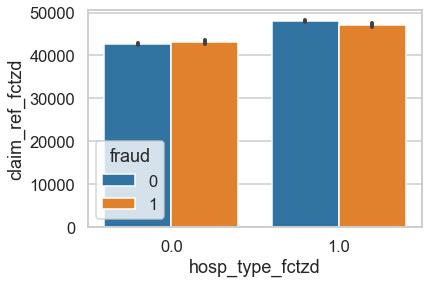

In [151]:
# medium or near largest context:
sns.set_context("talk")
# number of claims per hospital type
sns.barplot(x="hosp_type_fctzd", y="claim_ref_fctzd", hue="fraud", data=HIC4)

We notice more claims and frauds for Networked hospitals.

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hosp_type_fctzd', ylabel='count'>

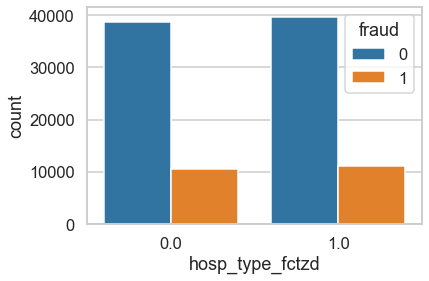

In [154]:
sns.countplot(HIC4.hosp_type_fctzd,hue='fraud',data=HIC4)

In [156]:
HIC4['member_id_fctzd'].describe()

count    99998.00
mean     42187.41
std      24848.13
min          0.00
25%      20023.25
50%      41814.50
75%      63637.75
max      86294.00
Name: member_id_fctzd, dtype: float64

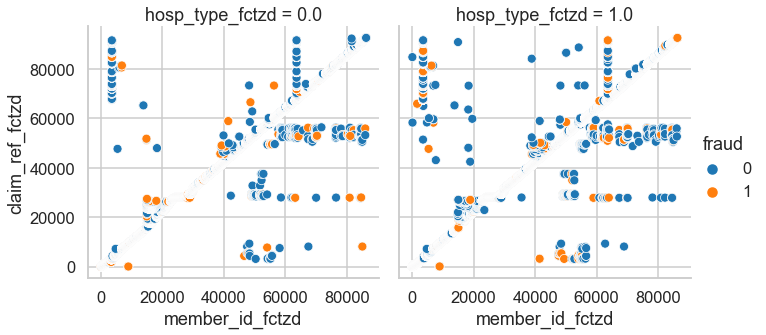

In [155]:
sns.relplot(x="member_id_fctzd",
            y="claim_ref_fctzd",
            hue="fraud",
            col='hosp_type_fctzd', data=HIC4)

In [152]:
# Importing the statistics module
from statistics import mode

In [153]:
# another form to look for a pattern between these features is with the groupby
# mean of setlle amount for frauds per sex class
HIC4.groupby(['policy_ref','member_id']).agg(
    {"claim_ref":(np.min, np.max, np.count_nonzero, mode),
     "hosp_type_fctzd":(np.min, np.max, mode, np.count_nonzero)})

claim_ref                                        \
                                amin        amax count_nonzero        mode   
policy_ref    member_id                                                      
AA0-2BQCU72BC LC3-Y93IK7  EE3-F77X17  EE3-F77X17             1  EE3-F77X17   
AA0-2USAU66SQ IY9-I86BR1  EB9-R39G76  EB9-R39G76             1  EB9-R39G76   
              XQ9-M65NP8  JO5-E30O26  JO5-E30O26             1  JO5-E30O26   
AA0-3DRBU19XR KL2-K26KV6  BI0-X95E25  BI0-X95E25             1  BI0-X95E25   
AA0-3JOJG57PS HB8-X74UB6  JH8-I29M57  JH8-I29M57             1  JH8-I29M57   
...                              ...         ...           ...         ...   
ZZ9-6DTXD85LS FU4-S35UX5  HQ8-O94T53  WQ3-L36E68             2  HQ8-O94T53   
ZZ9-6UDYM66GY FU6-A97FT6  OJ8-N11J85  OJ8-N11J85             1  OJ8-N11J85   
ZZ9-7ARPV27RM KU4-M78ES8  PG4-V27T50  PG4-V27T50             1  PG4-V27T50   
ZZ9-8XGDO33PQ IV2-Z33EG7  HS7-V72Y79  HS7-V72Y79             1  HS7-V72Y79   
ZZ9-9YHZE52LT YH6-V87YE8  LC2-Q15N12  LC2-Q15N12             1  LC2-Q15N12   

                         hosp_type_fctzd                          
                                    amin amax mode count_nonzero  
policy_ref    member_id                                           
AA0-2BQCU72BC LC3-Y93IK7             1.0  1.0  1.0             1  
AA0-2USAU66SQ IY9-I86BR1             1.0  1.0  1.0             1  
              XQ9-M65NP8             0.0  0.0  0.0             0  
AA0-3DRBU19XR KL2-K26KV6             0.0  0.0  0.0             0  
AA0-3JOJG57PS HB8-X74UB6             1.0  1.0  1.0             1  
...                                  ...  ...  ...           ...  
ZZ9-6DTXD85LS FU4-S35UX5             1.0  1.0  1.0             2  
ZZ9-6UDYM66GY FU6-A97FT6             0.0  0.0  0.0             0  
ZZ9-7ARPV27RM KU4-M78ES8             0.0  0.0  0.0             0  
ZZ9-8XGDO33PQ IV2-Z33EG7             1.0  1.0  1.0             1  
ZZ9-9YHZE52LT YH6-V87YE8             0.0  0.0  0.0             0  

[88015 rows x 8 columns]

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

We saw in previous feature importance  <a href="#FeatImpFroMod2">Importance  of features with  the balanced target class.</a> that `hosp_type_fctzd` is one of the 5 less important feature from the whole dataframe, and that `claim_ref_fctzd` and `member_id_fctzd` were within the 10 more important features. So it seems that <span style='background:lightcyan'>there is no need to create an extra feature to relate `member_id_fctzd`, `claim_ref` with `hosp_type_fctzd`</span>. The SML model was able to capture what features are more relevant to the fraud prediction.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q2"> </A> <h3>2. Are multiple claims raised from a single policy (except group policies) or policyholder?</h3>

From the original information provided <a href="#Feats1">Description of:Product type, Policy type details, Claim payment type description</a> the `policy_type`='A' and 'B' are for Individuals.
So we could investigate or flag for `policy_type`='A' | 'B' when are multiple claims  for example `claim_ref` >2.

Simmilar to previous question 1, the importance of `policy_type_fctzd` is less relevant than the  `claim_ref_fctzd` and `member_id_fctzd` which are within the 10 most important features. So in some way the multiple claims (`claim_ref_fctzd`) for any type of policy (`policy_type_fctzd`) might were somehow already learned aspects for the SML model.<br> Nevertheless we could do some extra research about the multiple claims for individual policies.

In [162]:
HIC4['policy_type_fctzd'].value_counts()

0    41237
7    20761
8    15512
1     8460
3     2861
5     2843
6     2805
2     2762
4     2757
Name: policy_type_fctzd, dtype: int64

In [163]:
HIC4['policy_type'].value_counts()

D    41237
A    20761
B    15512
C     8460
E     2861
O     2843
H     2805
G     2762
F     2757
Name: policy_type, dtype: int64

`policy_type`='A' is equivalent to `policy_type_fctzd`=7 and <br>
`policy_type`='B' is equivalent to `policy_type_fctzd`=8

From this question we can assume that multiple claims (`claim_ref`>1) for a individual policy type are more suceptible to bigger probabilities of fraud. To try to address this question we could create a flag feature for more than one `claim_ref` per `policy_ref`, so the ML model can look for patterns when `policy_type'='A'|'B'.

In [164]:
HIC4['claim_ref_fctzd'].value_counts()

28007    1176
28004     693
28015     288
28010     218
28008     164
         ... 
31364       1
31363       1
31362       1
31361       1
92632       1
Name: claim_ref_fctzd, Length: 92631, dtype: int64

<span style='background:lightgreen'>COOL QUERY EQUIVALENT</span>

In [219]:
# https://stackoverflow.com/questions/44537249/grouping-by-with-where-conditions-in-pandas
# COOL QUERY equivalent of 'where'...'groupby'
PT7idvClms=HIC4.query( 
    "policy_type_fctzd==7" 
).groupby(['policy_type_fctzd',
           'member_id_fctzd']
         ).agg({'claim_ref_fctzd':(np.count_nonzero,np.sum,np.min,np.max),
               'fraud':(np.sum,np.min,np.max)})

In [220]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
PT7idvClms.sort_values(by=[('claim_ref_fctzd','count_nonzero')], ascending=False)

claim_ref_fctzd                         \
                                    count_nonzero      sum   amin   amax   
policy_type_fctzd member_id_fctzd                                          
7                 3570                         72  5948117  67927  91627   
                  3571                         43  3631538  67920  91632   
                  63656                        41  3399194  67922  91625   
                  3569                         38  3143534  67895  91513   
                  63653                        36  2977806  67910  91631   
...                                           ...      ...    ...    ...   
                  24902                         1    28002  28002  28002   
                  24903                         1    28002  28002  28002   
                  24907                         1    28004  28004  28004   
                  24908                         1    28013  28013  28013   
                  86294                         1    92632  92632  92632   

                                  fraud            
                                    sum amin amax  
policy_type_fctzd member_id_fctzd                  
7                 3570               21    0    1  
                  3571                7    0    1  
                  63656               6    0    1  
                  3569                8    0    1  
                  63653               7    0    1  
...                                 ...  ...  ...  
                  24902               1    1    1  
                  24903               1    1    1  
                  24907               1    1    1  
                  24908               1    1    1  
                  86294               0    0    0  

[18987 rows x 7 columns]

<AxesSubplot:xlabel='policy_type_fctzd', ylabel='claim_ref_fctzd'>

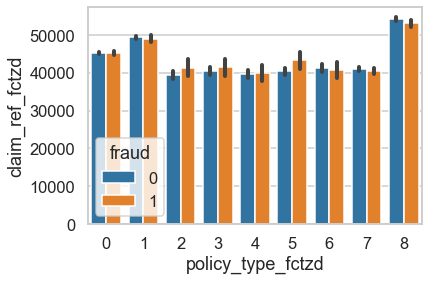

In [222]:
sns.barplot(x="policy_type_fctzd", y="claim_ref_fctzd", hue="fraud", data=HIC4)

From the graph above, it is clear that for any class of `policy_type_fctzd` there are as many `fraud` as there are not.<br> So there isn't much to be gained from looking at just one class, like individual policies. Perhaps then it would be better to try to establish an equation possibly of linear relationship.<br> However, it is possible that the algorithm of the SML model has considered something similar. Therefore, <span style='background:lightcyan'>it does not seem necessary to create another variable or characteristic to "capture" the number of claims by type of policy</span>.

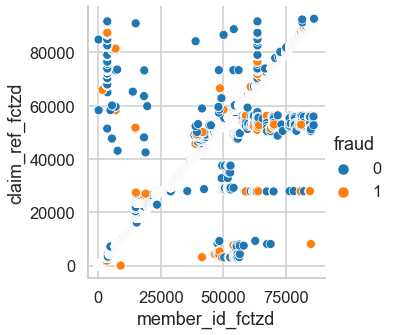

In [224]:
sns.relplot(x="member_id_fctzd",
            y="claim_ref_fctzd",
            hue="fraud",data=HIC4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q3"> </A> <h3>3. Are there multiple group claims from the same hospital?</h3>

This question is similar to question 2 in that it relates to the `claim_ref_fctzd` and `policy_type_fctzd` features but also to `hosp_id_fctzd`. <br>So again there is not much advantage in separating class from policy type as there are so many fraudulent and non-fraudulent claims, so another variable like hospital doesn't matter much.<br> Although there must be hospitals with a greater number of cases attended and with them claims, as the number of claims increases, the number of frauds or non-frauds will also increase in proportion.<br><span style='background:lightcyan'> So it wont be created a new feature, as the SML model captures better (with other features) the patterns and relationships to identify a possible fraud.</span>

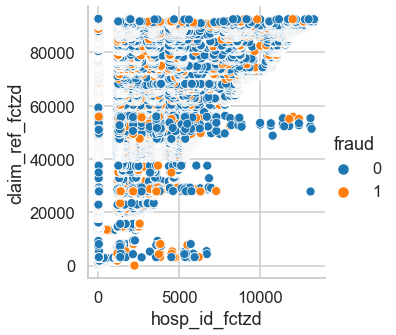

In [227]:
sns.relplot(x="hosp_id_fctzd",
            y="claim_ref_fctzd",
            hue="fraud",data=HIC4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q4"> </A> <h3>4. Is the claim raised close to the policy expiry date?</h3>

This question guides to the assumption that the more "close" to the policy expiry date the more fraud possibility.<br>
But I wonder if will only suffice to calculate the elapsed time between both dates and create a new feature that includes this elapsed time.

In [20]:
HIC4.head()

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   
2   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
3   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
4   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   
2                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
3                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
4                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   
2         A                0           D                  0        25000   
3         A                0           D                  0        25000   
4         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   
2   ZH0-U8I16                2 2009-12-23  YGV-YGC685            0.0   
3  HI3-K93J44                3 2009-12-24  YGV-YGC685            0.0   
4   DL5-O9K48                4 2009-11-26  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   
2    FA21FY42                 1         Y              1.0 2009-12-17   
3     OY17AQ3                 2         Y              1.0 2009-12-23   
4     OY17AQ3                 2         Y              1.0 2009-11-22   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   
2   2009-12-22    6798.14          0.0          0.0       0.0       0.0   
3   2010-02-28    3988.11          0.0          0.0       0.0       0.0   
4   2009-11-27    1294.92          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   
2            0.0        0.0           0.0            0.0                 0.0   
3            0.0        0.0           0.0            0.0                 0.0   
4            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   
2        0.0        Genuine               0        6525 2010-01-18   
3        0.0        Genuine               0        3680 2010-01-18   
4        0.0        Genuine               0        1165 2009-11-27   

  payment_type  payment_type_fctzd  fraud  
0            B                   0      1  
1            A                   1      0  
2            A                   1      1  
3            A                   1      0  
4            A                   1      0

In [18]:
HIC4['policy_ref'].describe()

count             99998
unique            46550
top       UA3-7IIIO74AU
freq               4511
Name: policy_ref, dtype: object

In [19]:
HIC4['policy_ref_fctzd'].describe()

count    99998.00
mean     22290.51
std      12916.46
min          0.00
25%      10001.00
50%      23306.00
75%      31280.75
max      46551.00
Name: policy_ref_fctzd, dtype: float64

In [21]:
HIC4[['policy_ref','policy_ref_fctzd','policy_start_dt','policy_end_dt','claim_dt']]

policy_ref  policy_ref_fctzd policy_start_dt policy_end_dt  \
0      RK1-1XKBF65NW                 0      2009-08-20    2010-08-19   
1      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
2      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
3      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
4      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
...              ...               ...             ...           ...   
99995  SP8-1ANSF46HC             46547      2010-02-18    2011-02-17   
99996  UI1-5FOMG54NL             46548      2009-12-19    2010-12-18   
99997  UW3-1OAMN61NM             46549      2010-02-22    2011-02-21   
99998  QZ1-6WLLT25SG             46550      2009-10-25    2010-10-24   
99999  AX5-2QBXP19MI             46551      2009-07-01    2010-06-30   

        claim_dt  
0     2009-12-27  
1     2009-01-13  
2     2009-12-23  
3     2009-12-24  
4     2009-11-26  
...          ...  
99995 2010-08-04  
99996 2010-05-05  
99997 2010-11-03  
99998 2010-05-16  
99999 2010-05-13  

[99998 rows x 5 columns]

In [24]:
# calculate average of policy time
AvgPolicyPeriod=(HIC4['policy_end_dt'] - HIC4['policy_start_dt']).dt.days
AvgPolicyPeriod.mean()

385.31480629612594

In [25]:
AvgPolicyPeriod.describe()

count    99998.00
mean       385.31
std        101.10
min       -218.00
25%        364.00
50%        364.00
75%        365.00
max       2001.00
dtype: float64

In [29]:
# calculate the elapsed time between claim date and end of policy
claim_days_before_end_policy=HIC4['policy_end_dt'] - HIC4['claim_dt']
claim_days_before_end_policy

0       235 days
1       419 days
2        75 days
3        74 days
4       102 days
          ...   
99995   197 days
99996   227 days
99997   110 days
99998   161 days
99999    48 days
Length: 99998, dtype: timedelta64[ns]

So far we only notice the "days" string which we wiil not need.

In [30]:
# calculate elapsed time ommiting "days" in the output
claim_days_before_end_policy=(HIC4['policy_end_dt'] - HIC4['claim_dt']).dt.days
claim_days_before_end_policy

0        235
1        419
2         75
3         74
4        102
        ... 
99995    197
99996    227
99997    110
99998    161
99999     48
Length: 99998, dtype: int64

In [31]:
claim_days_before_end_policy.describe()

count    99998.00
mean       141.98
std        159.02
min      -1954.00
25%         41.00
50%        149.00
75%        248.00
max       1155.00
dtype: float64

<span style='background:lightcyan'>Do negative values are for `claim_dt` made after `policy_end_dt`?</span>. <br> How many days shall be consider to be "close" to the policy expiry date?.<br> Shall be needed two new features?, one for elapsed days and other for "close" to the policy expiry date?. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="days_claimdt_endpolicy"> </A> <h4>Create "days_claimdt_endpolicy" for the elapsed time between claim raised (claim_dt) and policy_end_dt</h4>

##### summary of essential cell for creation of feature "days_claimdt_endpolicy" 
This feature covers POSITIVE days or number of days the claim was made BEFORE end of policy<br>
and NEGATIVE days or number of days the claim was made AFTER end of policy

<span style='background:plum'>Essential operation</span>

In [20]:
# summary of essential cells for creation of feature "days_claimdt_endpolicy" 
# This feature covers POSITIVE days or number of days the claim was made BEFORE end of policy
# and NEGATIVE days or number of days the claim was made AFTER end of policy
# create feature to calculate the elapsed time between
# claim raised (claim_dt) before policy_end_dt
# "".dt.days" to not include the 'days' string in each row.
HIC4['days_claimdt_endpolicy']=(HIC4['policy_end_dt'] - HIC4['claim_dt']).dt.days
#update reference dataframe
HIC2=HIC4.copy()

In [33]:
HIC4[['policy_ref','policy_ref_fctzd',
      'policy_start_dt','policy_end_dt','claim_dt',
     'days_claimdt_endpolicy']]

policy_ref  policy_ref_fctzd policy_start_dt policy_end_dt  \
0      RK1-1XKBF65NW                 0      2009-08-20    2010-08-19   
1      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
2      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
3      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
4      YD9-1XBLA13AJ                 1      2009-04-05    2010-03-08   
...              ...               ...             ...           ...   
99995  SP8-1ANSF46HC             46547      2010-02-18    2011-02-17   
99996  UI1-5FOMG54NL             46548      2009-12-19    2010-12-18   
99997  UW3-1OAMN61NM             46549      2010-02-22    2011-02-21   
99998  QZ1-6WLLT25SG             46550      2009-10-25    2010-10-24   
99999  AX5-2QBXP19MI             46551      2009-07-01    2010-06-30   

        claim_dt  days_claimdt_endpolicy  
0     2009-12-27                     235  
1     2009-01-13                     419  
2     2009-12-23                      75  
3     2009-12-24                      74  
4     2009-11-26                     102  
...          ...                     ...  
99995 2010-08-04                     197  
99996 2010-05-05                     227  
99997 2010-11-03                     110  
99998 2010-05-16                     161  
99999 2010-05-13                      48  

[99998 rows x 6 columns]

In [35]:
HIC4['days_claimdt_endpolicy'].describe()

count    99998.00
mean       141.98
std        159.02
min      -1954.00
25%         41.00
50%        149.00
75%        248.00
max       1155.00
Name: days_claimdt_endpolicy, dtype: float64

In [34]:
# number of rows with negative elapsed days
HIC4[HIC4['days_claimdt_endpolicy'] < 0]

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
12      A          0  UY3-9BWSL34YU                 3  WB3-V20GG7   
13      A          0  UY3-9BWSL34YU                 3  WB3-V20GG7   
85      A          0  NU1-5PMUZ86UV                21  EY3-E92ND0   
86      A          0  JZ4-7PVUD37HB                22  JE8-V88RY2   
89      A          0  MC9-6ECBK26FN                25  BM7-C96EI6   
...    ..        ...            ...               ...         ...   
99969   A          0  GQ9-3AYAQ21GB             46524  TN6-S61QJ7   
99975   A          0  VG9-9TCAG69LI             46530  ID8-G36TS1   
99978   A          0  YS9-7CPLV61XP             46533  UI3-F85NB4   
99982   A          0  SA6-9TRHN51PR             46536  ZL3-A28QQ7   
99988   A          0  FS5-6RHXD72OP             46541  WM1-X96NJ8   

       member_id_fctzd sex  sex_fctzd        dob policy_start_dt  \
12                   8   M        0.0 1985-01-03      2008-04-04   
13                   8   M        0.0 1985-01-03      2008-04-04   
85                  75   F        1.0 1978-02-21      2008-06-17   
86                  76   M        0.0 1935-03-12      2008-03-10   
89                  79   M        0.0 1980-03-15      2009-05-05   
...                ...  ..        ...        ...             ...   
99969            86267   M        0.0 1965-01-28      2009-05-11   
99975            86273   F        1.0 1975-03-03      2009-07-22   
99978            86276   M        0.0 1969-12-02      2009-04-26   
99982            86279   F        1.0 1974-10-18      2009-04-16   
99988            86284   F        1.0 1951-05-22      2009-05-15   

      policy_end_dt prod_code  prod_code_fctzd policy_type  policy_type_fctzd  \
12       2009-10-26         A                0           C                  1   
13       2009-10-26         A                0           C                  1   
85       2009-05-17         A                0           C                  1   
86       2009-02-08         A                0           D                  0   
89       2010-04-04         A                0           D                  0   
...             ...       ...              ...         ...                ...   
99969    2010-05-10         A                0           F                  4   
99975    2010-07-21         A                0           A                  7   
99978    2010-04-25         A                0           F                  4   
99982    2010-04-15         A                0           E                  3   
99988    2010-05-14         A                0           F                  4   

       sum_insured   claim_ref  claim_ref_fctzd   claim_dt hospital_id  \
12           15000  UJ8-W32V34               11 2009-12-31  YGV-YGC685   
13           15000  HM8-N18C11               12 2009-12-30  YGV-YGC685   
85            2500  EF6-W16C78               83 2009-12-12  YGV-YGC685   
86           15000  II9-J52E18               84 2009-09-16  YGV-YGC685   
89            8750  XB6-C64H85               87 2010-05-01  YGV-YGC685   
...            ...         ...              ...        ...         ...   
99969        10000  SO7-D66R79            92603 2010-08-30  YGV-YGC685   
99975         5000  IV5-D39H91            92609 2010-12-01  YGV-YGC685   
99978         5000  EG8-I67K24            92612 2010-11-29  YGV-YGC685   
99982         5000  IT3-H21P56            92615 2010-06-03  YGV-YGC685   
99988        15000  ZU4-F78E65            92621 2010-08-30  YGV-YGC685   

       hosp_id_fctzd hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd  \
12               0.0    TY22HV36                 7         Y              1.0   
13               0.0    TY22HV36                 7         Y              1.0   
85               0.0     SP22KT6                53         Y              1.0   
86               0.0     MM5AU41                54         Y              1.0   
89               0.0    ZD25KR16                16         N              0.0   
...         

Many thousands of negative values(17,897).<br>The negative values are for `claim_dt` made after the end of policy `policy_end_dt`. As these number is so high, I wonder if this a IIC systems error, a misrepresentation of data to commit frauds or a relatively normal event.<br> For any of those situations seems it is needed a new feature to capture this events.

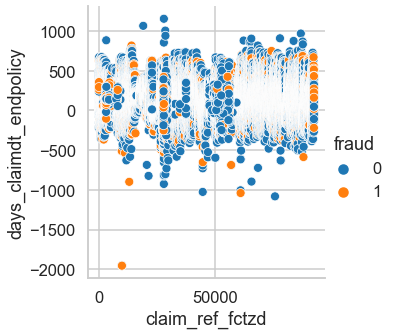

In [43]:
# medium or near largest context:
sns.set_context("talk")
sns.relplot(x="claim_ref_fctzd",
            y="days_claimdt_endpolicy",
            hue="fraud",data=HIC4)

In [38]:
#number of frauds of claims made after the end of policy 
HIC4[(HIC4['days_claimdt_endpolicy'] < 0) & (HIC4['fraud'] == 1)]

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
162     D          3  ZK1-1WOHP26VK                72  XK7-N56DT0   
163     D          3  XC2-9WTAT89FI                73  HK9-V74FL1   
309     D          3  LF6-2QWRT53NJ               210  QY5-J14JF8   
322     F          5  VJ8-4EZEB24OM               222  LX5-M80NY1   
324     D          3  SG3-9ECTR38VH               224  CO0-A55KN1   
...    ..        ...            ...               ...         ...   
99479   A          0  ZI8-5RFKH51ZB             46090  YM1-S50KE8   
99566   A          0  ZI8-3MSWX39RQ             46167  UP0-R61ZE6   
99752   D          3  AX6-3QGUK37PR             46329  UB7-N50CD4   
99773   D          3  HR0-5YIWI25GJ             46350  PO8-X98VA5   
99978   A          0  YS9-7CPLV61XP             46533  UI3-F85NB4   

       member_id_fctzd sex  sex_fctzd        dob policy_start_dt  \
162                147   F        1.0 1931-06-19      2009-05-18   
163                148   F        1.0 1970-09-15      2009-05-11   
309                291   M        0.0 1984-06-12      2009-05-13   
322                303   F        1.0 1974-06-30      2009-04-02   
324                305   F        1.0 1947-04-24      2009-02-15   
...                ...  ..        ...        ...             ...   
99479            85816   M        0.0 1936-12-23      2009-10-28   
99566            85893   F        1.0 1949-02-05      2009-01-06   
99752            86063   F        1.0 1993-09-23      2009-06-18   
99773            86084   M        0.0 1984-03-10      2008-08-15   
99978            86276   M        0.0 1969-12-02      2009-04-26   

      policy_end_dt prod_code  prod_code_fctzd policy_type  policy_type_fctzd  \
162      2010-05-17         A                0           A                  7   
163      2010-05-10         A                0           A                  7   
309      2010-05-12         A                0           A                  7   
322      2010-04-01         D                1           A                  7   
324      2010-02-14         A                0           A                  7   
...             ...       ...              ...         ...                ...   
99479    2010-10-27         A                0           O                  5   
99566    2010-04-02         A                0           F                  4   
99752    2010-06-17         A                0           B                  8   
99773    2009-07-16         A                0           A                  7   
99978    2010-04-25         A                0           F                  4   

       sum_insured   claim_ref  claim_ref_fctzd   claim_dt hospital_id  \
162           5000  SE9-W63R10              159 2010-05-19         NaN   
163           5000  MN1-D81J63              160 2010-05-16         NaN   
309           5000  CT7-Z88F37              306 2010-05-24         NaN   
322           1500  DA5-Z61M26              319 2010-04-08         NaN   
324           5000  YR8-M67Q15              321 2010-02-15         NaN   
...            ...         ...              ...        ...         ...   
99479        10000  JU4-O27J17            92144 2010-12-04  YGV-YGC685   
99566        15000  EM5-M61O32            92225 2010-04-03  YGV-YGC685   
99752         5000  FZ2-D65A67            92396 2010-07-05  YGV-YGC685   
99773         7500  FK0-F50K20            92417 2009-12-04  VUU-YTF353   
99978         5000  EG8-I67K24            92612 2010-11-29  YGV-YGC685   

       hosp_id_fctzd hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd  \
162              0.0    RJ17UL72                89         Y              1.0   
163              0.0    EG12ZV48                84         Y              1.0   
309              0.0    EG12ZV48                84         Y              1.0   
322              0.0    ND18MZ80               168         N              0.0   
324              0.0    DI31AP64               170         Y              1.0   
...         

In [39]:
#number of frauds of claims made before the end of policy 
HIC4[(HIC4['days_claimdt_endpolicy'] >= 0) & (HIC4['fraud'] == 1)]

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0       A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
2       A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
10      A          0  YD9-1XBLA13AJ                 1  AZ4-K18CH2   
20      B          1  WB6-4SPZA80PB                 4  QN7-C27UP3   
26      C          2  LX0-2EEZA56BF                 5  KH9-L92WQ8   
...    ..        ...            ...               ...         ...   
99991   A          0  DH2-9QSKA50BV             46543  NV7-V12ZT0   
99992   A          0  KZ7-3QHVI67QQ             46544  UR0-Y54HS2   
99994   A          0  XT6-3EAJO66WD             46546  UE1-H38NJ7   
99996   A          0  UI1-5FOMG54NL             46548  NG6-V91ZC8   
99998   A          0  QZ1-6WLLT25SG             46550  RA5-H28KO7   

       member_id_fctzd sex  sex_fctzd        dob policy_start_dt  \
0                    0   M        0.0 1978-04-14      2009-08-20   
2                    2   F        1.0 1936-03-14      2009-04-05   
10                   6   M        0.0 1949-01-28      2009-04-05   
20                  15   F        1.0 1984-01-26      2008-03-24   
26                  21   F        1.0 1992-01-31      2008-05-18   
...                ...  ..        ...        ...             ...   
99991            86286   M        0.0 1933-05-04      2009-06-21   
99992            86287   M        0.0 1938-12-22      2009-11-25   
99994            86289   M        0.0 1959-10-13      2009-10-28   
99996            86291   M        0.0 1974-01-25      2009-12-19   
99998            86293   M        0.0 1946-09-18      2009-10-25   

      policy_end_dt prod_code  prod_code_fctzd policy_type  policy_type_fctzd  \
0        2010-08-19         A                0           D                  0   
2        2010-03-08         A                0           D                  0   
10       2010-03-08         A                0           D                  0   
20       2009-03-23         A                0           D                  0   
26       2009-05-17         A                0           D                  0   
...             ...       ...              ...         ...                ...   
99991    2010-06-20         A                0           A                  7   
99992    2010-11-24         A                0           G                  2   
99994    2010-11-26         A                0           G                  2   
99996    2010-12-18         A                0           G                  2   
99998    2010-10-24         A                0           A                  7   

       sum_insured   claim_ref  claim_ref_fctzd   claim_dt hospital_id  \
0             8750  LS3-F51V56                0 2009-12-27  YGV-YGC685   
2            25000   ZH0-U8I16                2 2009-12-23  YGV-YGC685   
10           25000   VF1-N8F68                8 2010-02-02  YGV-YGC685   
20           10000   FX6-W3X40               19 2008-08-25  TEI-CMZ321   
26           15000  IU0-H30W81               25 2008-06-07   BXB-CUP94   
...            ...         ...              ...        ...         ...   
99991         5000  KE4-D29F50            92624 2009-04-13  YGV-YGC685   
99992         7500  FN1-A61U35            92625 2010-10-05  YGV-YGC685   
99994         5000  KU4-E54M52            92627 2010-02-24  YGV-YGC685   
99996         5000  KM2-Z93Y78            92629 2010-05-05  YGV-YGC685   
99998         7500  ET1-L65M19            92631 2010-05-16         NaN   

       hosp_id_fctzd hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd  \
0                0.0    TX25ID35                 0         N              0.0   
2                0.0    FA21FY42                 1         Y              1.0   
10               0.0    JK34TA24                 5         Y              1.0   
20               7.0    PA25WD87                13         N              0.0   
26              11.0    WV13VS62                17         Y              1.0   
...         

A considerable number of frauds (3,790 around 17% of the total frauds) corresponding to the number of <span style='background:lightcyan'>negative days (frauds carried out with claims after the expiration of the policy)</span>. So, as the frauds are numerous, as are the negative days of `days_claimdt_endpolicy`, **this feature should be normalized to a range of 0 to 1** so that the SML model can indirectly include the negative values.

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='days_claimdt_endpolicy'>

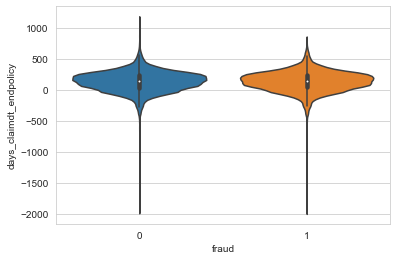

In [40]:
sns.violinplot("fraud", "days_claimdt_endpolicy", data=HIC4)

We notice the widest range for frauds and not frauds a little bit above 0 days. But unsured if widest line is below the 250 days for positive 'y' axis.

In [46]:
HIC4['days_claimdt_endpolicy'].describe()

count    99998.00
mean       141.98
std        159.02
min      -1954.00
25%         41.00
50%        149.00
75%        248.00
max       1155.00
Name: days_claimdt_endpolicy, dtype: float64

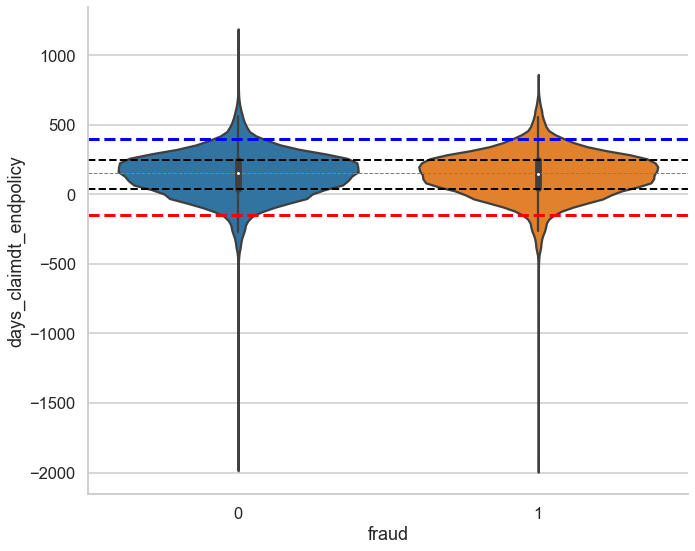

In [48]:
g=sns.catplot(x="fraud", y="days_claimdt_endpolicy", kind="violin", data=HIC4)
g.fig.set_size_inches(10,8)
g.refline( y = 400, color = "blue", lw = 3)
g.refline( y = 248, color = "black", lw = 2)
g.refline( y = 149, color = "grey", lw = 1)
g.refline( y = 41, color = "black", lw = 2)
g.refline( y = -150, color = "red", lw = 3)

In [45]:
sns.violinplot?

The violin plot shows both statistical measures and the probability distribution.<br>
The median (Q2=148) is the white point into the middle of the small black rectangle. The edges of the small black rectangle are the Q1=41 and Q3=248 quartiles.<br> The blue and orange colored areas are the the probability distribution of those days which correspond to not fraud (blue) or  fraud (orange). So the widest is the area the more the days for not fraud and fraud.<br> Then for example, for the range of days between Q1 and Q3 is when the bigger number of claims occur and also when the bigger number of frauds ocurrs.

With the `days_claimdt_endpolicy` feature, the SML model could learn wheather are more frauds far, close or even in the middle of `policy_end_dt`.

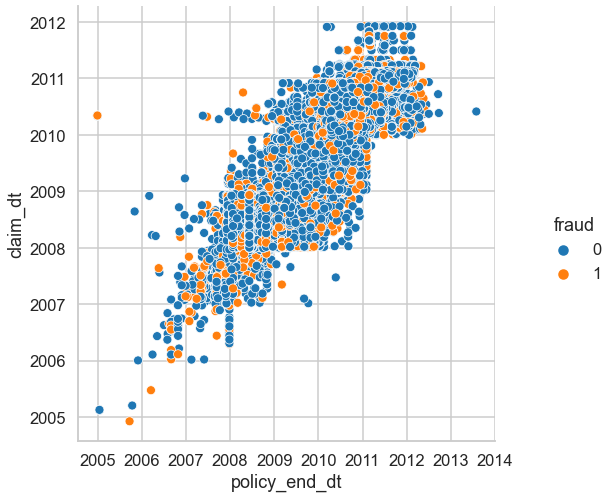

In [53]:
# medium or near largest context:
sns.set_context("talk")

g=sns.relplot(x="policy_end_dt",
            y="claim_dt",
            hue="fraud",data=HIC4)
g.fig.set_size_inches(10,8)

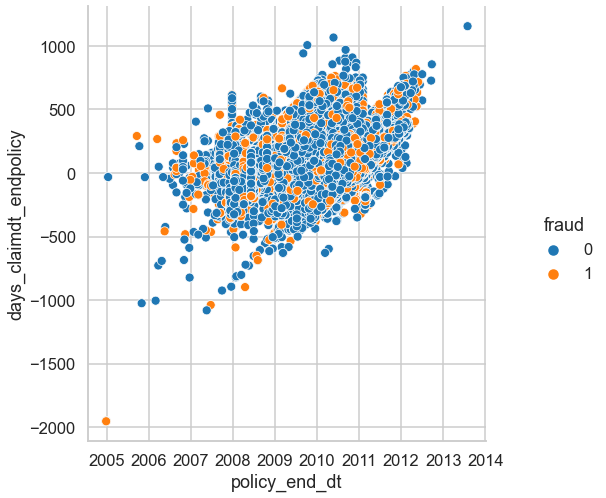

In [54]:
# medium or near largest context:
sns.set_context("talk")

g=sns.relplot(x="policy_end_dt",
            y="days_claimdt_endpolicy",
            hue="fraud",data=HIC4)
g.fig.set_size_inches(10,8)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="DropOutlsDaysClaimdtEndPolicy"> </A> <h4>Drop outliers rows of "days_claimdt_endpolicy" so they can not impact the scaling in range 0 to 1 to deal with the negative values</h4>

<span style='background:plum'>Essential operation</span>

In [21]:
# summary cell of esential operations of this section
# drop 3 outliers of 'days_claimdt_endpolicy'
HIC4.drop( HIC4[HIC4['days_claimdt_endpolicy'].lt(-1200)].index, inplace=True)
#updates reference dataframe HIC2
HIC2=HIC4.copy()

Regarding the negative values we could transform them along the possitive ones into a range 0,1. But before that it might help to remove negative outliers.

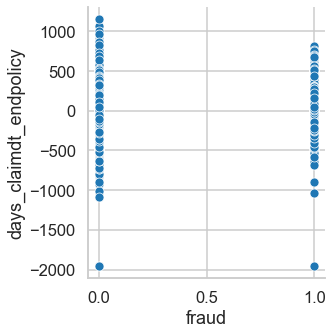

In [55]:
sns.relplot(x="fraud", y="days_claimdt_endpolicy", data=HIC4)

With this plot it is more clear the potential outliers so they can not affect the new scaling from 0 to 1.

In [68]:
len(HIC4[(HIC4['days_claimdt_endpolicy'] < -1200) & (HIC4['fraud'] == 1)])

1

In [69]:
len(HIC4[(HIC4['days_claimdt_endpolicy'] < -1200) & (HIC4['fraud'] == 0)])

2

In [63]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tpa                     99998 non-null  object        
 1   tpa_fctzd               99998 non-null  int64         
 2   policy_ref              99998 non-null  object        
 3   policy_ref_fctzd        99998 non-null  int64         
 4   member_id               99998 non-null  object        
 5   member_id_fctzd         99998 non-null  int64         
 6   sex                     94493 non-null  object        
 7   sex_fctzd               99998 non-null  float64       
 8   dob                     99998 non-null  datetime64[ns]
 9   policy_start_dt         99998 non-null  datetime64[ns]
 10  policy_end_dt           99998 non-null  datetime64[ns]
 11  prod_code               99998 non-null  object        
 12  prod_code_fctzd         99998 non-null  int64 

In [70]:
HIC4.drop( HIC4[HIC4['days_claimdt_endpolicy'].lt(-1200)].index, inplace=True)

In [71]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99995 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tpa                     99995 non-null  object        
 1   tpa_fctzd               99995 non-null  int64         
 2   policy_ref              99995 non-null  object        
 3   policy_ref_fctzd        99995 non-null  int64         
 4   member_id               99995 non-null  object        
 5   member_id_fctzd         99995 non-null  int64         
 6   sex                     94490 non-null  object        
 7   sex_fctzd               99995 non-null  float64       
 8   dob                     99995 non-null  datetime64[ns]
 9   policy_start_dt         99995 non-null  datetime64[ns]
 10  policy_end_dt           99995 non-null  datetime64[ns]
 11  prod_code               99995 non-null  object        
 12  prod_code_fctzd         99995 non-null  int64 

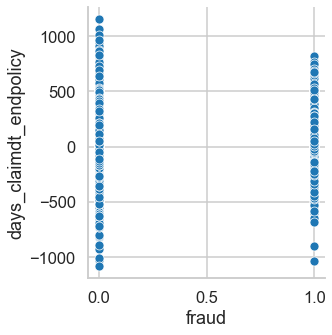

In [72]:
sns.relplot(x="fraud", y="days_claimdt_endpolicy", data=HIC4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Scales_DaysClaimdtEndPolicy"> </A> <h4>Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_endpolicy"</h4>

In [74]:
HIC4['days_claimdt_endpolicy'].describe()

count    99995.00
mean       142.05
std        158.60
min      -1081.00
25%         41.00
50%        149.00
75%        248.00
max       1155.00
Name: days_claimdt_endpolicy, dtype: float64

In [76]:
HIC4.head()

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   
2   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
3   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
4   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   
2                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
3                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
4                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   
2         A                0           D                  0        25000   
3         A                0           D                  0        25000   
4         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   
2   ZH0-U8I16                2 2009-12-23  YGV-YGC685            0.0   
3  HI3-K93J44                3 2009-12-24  YGV-YGC685            0.0   
4   DL5-O9K48                4 2009-11-26  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   
2    FA21FY42                 1         Y              1.0 2009-12-17   
3     OY17AQ3                 2         Y              1.0 2009-12-23   
4     OY17AQ3                 2         Y              1.0 2009-11-22   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   
2   2009-12-22    6798.14          0.0          0.0       0.0       0.0   
3   2010-02-28    3988.11          0.0          0.0       0.0       0.0   
4   2009-11-27    1294.92          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   
2            0.0        0.0           0.0            0.0                 0.0   
3            0.0        0.0           0.0            0.0                 0.0   
4            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   
2        0.0        Genuine               0        6525 2010-01-18   
3        0.0        Genuine               0        3680 2010-01-18   
4        0.0        Genuine               0        1165 2009-11-27   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  
0            B                   0      1                     235  
1            A                   1      0                     419  
2            A                   1      1                      75  
3            A                   1      0                      74  
4            A                   1      0                     102

<span style='background:plum'>Summary of essential operations of this section</span>

In [22]:
# summary of this section
# https://stackoverflow.com/questions/51643004/apply-minmaxscaler-on-a-pandas-column
# Normalizing the values of 'days_claimdt_endpolicy' from 0 to 1 might be a good decision.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y=scaler.fit_transform(HIC4[['days_claimdt_endpolicy']])
# updates 'days_claimdt_endpolicy' to standardized values between 0 and 1 
HIC4['days_claimdt_endpolicy']=y
#update reference dataframe
HIC2=HIC4.copy()

In [80]:
HIC4['days_claimdt_endpolicy'].describe()

count    99995.00
mean         0.55
std          0.07
min          0.00
25%          0.50
50%          0.55
75%          0.59
max          1.00
Name: days_claimdt_endpolicy, dtype: float64

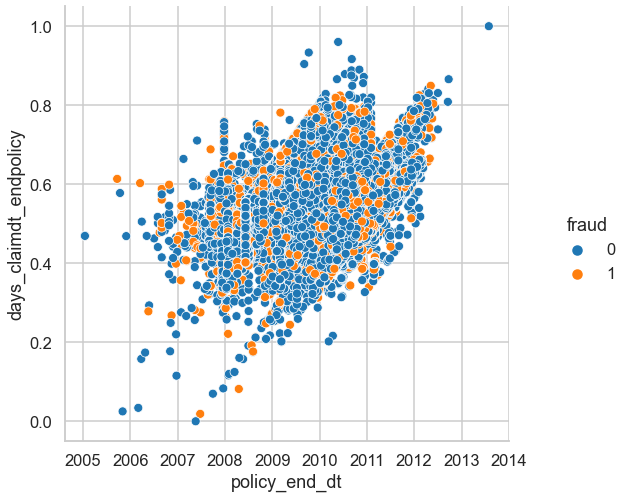

In [81]:
# medium or near largest context:
sns.set_context("talk")

g=sns.relplot(x="policy_end_dt",
            y="days_claimdt_endpolicy",
            hue="fraud",data=HIC4)
g.fig.set_size_inches(10,8)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q5"> </A> <h2>5. Is the claim raised close to the policy inception date?</h2>

<A name="days_claimdt_startpolicy"> </A> <h3>Create "days_claimdt_startpolicy" for the elapsed time between claim raised (claim_dt) and inception of policy ('policy_start_dt')</h3>

<span style='background:plum'>summary of essential cell for creation of feature "days_claimdt_startpolicy" </span>
This feature covers POSITIVE days or number of days the claim was made BEFORE end of policy<br>
and NEGATIVE days or number of days the claim was made AFTER end of policy

<span style='background:plum'>Essential operation</span>

In [23]:
# summary of essential cells for creation of feature "days_claimdt_endpolicy" 
# POSITIVE days are when the claim was made AFTER the start of policy 'policy_start_dt'
# NEGATIVE days or are when the claim was made BEFORE the start of policy 'policy_start_dt'
# Negative days could or should be an annomaly of the IIC systems
### Create "days_claimdt_startpolicy" for the elapsed time between claim raised (claim_dt) ###
## and inception of policy ('policy_start_dt') ###
# .dt.days to exclude the 'days' string in each row.
# It is assumed for most samples that policy_start_dt ocurred first in time than claim_dt
# then to minimize the negative numbers, the calculus should substract the 
# 'policy_start_dt' from 'claim_dt'. Then negative numbers could be an annomaly
HIC4['days_claimdt_startpolicy']=(HIC4['claim_dt'] - HIC4['policy_start_dt']).dt.days
#update reference dataframe
HIC2=HIC4.copy()

In [85]:
HIC4['days_claimdt_startpolicy'].describe()

count    99995.00
mean       243.27
std        163.75
min       -702.00
25%        128.00
50%        231.00
75%        353.00
max       1713.00
Name: days_claimdt_startpolicy, dtype: float64

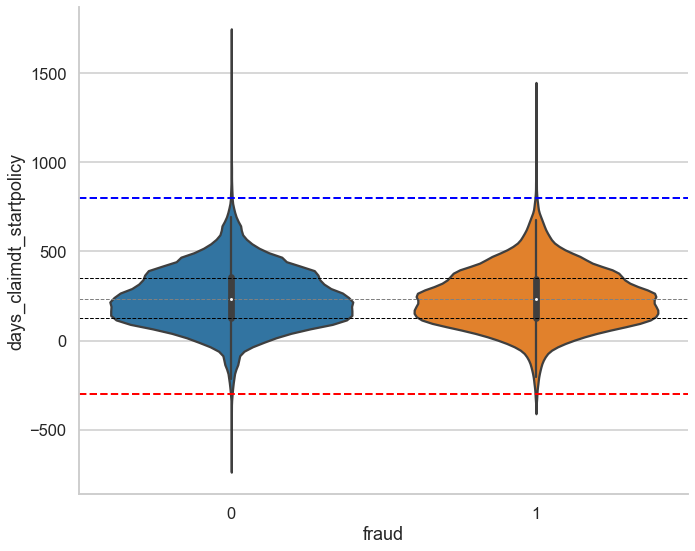

In [88]:
g=sns.catplot(x="fraud", y="days_claimdt_startpolicy", kind="violin", data=HIC4)
g.fig.set_size_inches(10,8)
g.refline( y = 800, color = "blue", lw = 2)
g.refline( y = 353, color = "black", lw = 1)
g.refline( y = 231, color = "grey", lw = 1)
g.refline( y = 128, color = "black", lw = 1)
g.refline( y = -300, color = "red", lw = 2)

In the above plot, the negative densities might look not that big. Lets take a look to negative values of `days_claimdt_startpolicy`

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="DropOutlsDaysClaimdtStartPolicy"> </A> <h3>Drop outliers of "days_claimdt_startpolicy" so they can not impact the scaling in range 0 to 1 to deal with the negative values</h3>

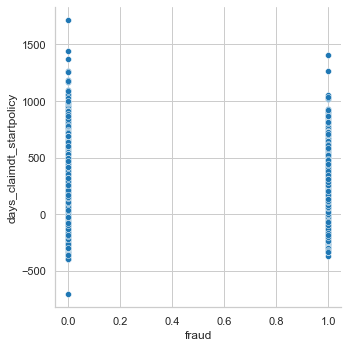

In [91]:
# smal context:
sns.set_context("notebook")
sns.relplot(x="fraud", y="days_claimdt_startpolicy", data=HIC4)

In [92]:
len(HIC4[HIC4['days_claimdt_startpolicy'] < -400])

1

In [94]:
len(HIC4[HIC4['days_claimdt_startpolicy'] > 1400])

3

<span style='background:plum'>Essential operation</span>

In [24]:
# summary cell of esential operations of this section
# drop 4 outliers of 'days_claimdt_endpolicy'
# Drop outliers rows of "days_claimdt_endpolicy" so they can not impact the scaling 
# in range 0 to 1 to deal with the negative value
HIC4.drop(HIC4[HIC4['days_claimdt_startpolicy'].lt(-400)].index, inplace=True)
HIC4.drop(HIC4[HIC4['days_claimdt_startpolicy'].gt(1400)].index, inplace=True)
HIC2=HIC4.copy()

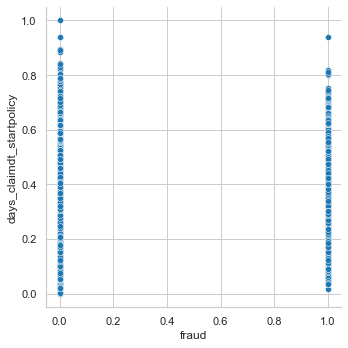

In [36]:
# smal context:
sns.set_context("notebook")
sns.relplot(x="fraud", y="days_claimdt_startpolicy", data=HIC4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Scales_DaysClaimdtStartPolicy"> </A> <h3>Scales the values of 'days_claimdt_startpolicy' in range 0 to 1 to deal with the negative values of "days_claimdt_startpolicy"</h3>

In [99]:
HIC4['days_claimdt_startpolicy'].describe()

count    99991.00
mean       243.24
std        163.58
min       -397.00
25%        128.00
50%        231.00
75%        353.00
max       1369.00
Name: days_claimdt_startpolicy, dtype: float64

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='days_claimdt_startpolicy'>

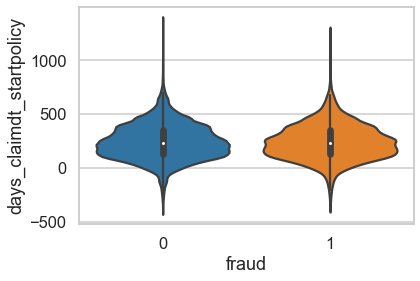

In [101]:
# medium or near largest context:
sns.set_context("talk")
sns.violinplot("fraud", "days_claimdt_startpolicy", data=HIC4)

In [25]:
## summary cell to scale values
## Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_startpolicy"
# Normalizing the values of 'days_claimdt_endpolicy' from 0 to 1 might be a good decision.
# This way the values between a certain range () will have higher frauds probability.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# https://stackoverflow.com/questions/51643004/apply-minmaxscaler-on-a-pandas-column
y=scaler.fit_transform(HIC4[['days_claimdt_startpolicy']])
# updates claim_disch_days to standardized values between 0 and 1 
HIC4['days_claimdt_startpolicy']=y
HIC2=HIC4.copy()

In [26]:
HIC4['days_claimdt_startpolicy'].describe()

count    99991.00
mean         0.36
std          0.09
min          0.00
25%          0.30
50%          0.36
75%          0.42
max          1.00
Name: days_claimdt_startpolicy, dtype: float64

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='days_claimdt_startpolicy'>

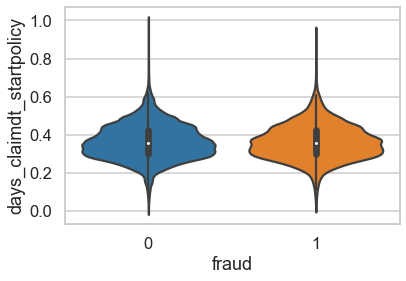

In [37]:
# medium or near largest context:
sns.set_context("talk")
sns.violinplot("fraud", "days_claimdt_startpolicy", data=HIC4)

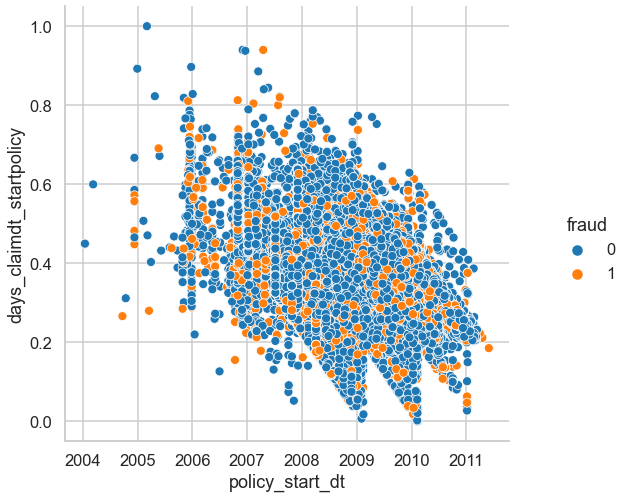

In [27]:
# medium or near largest context:
sns.set_context("talk")

g=sns.relplot(x="policy_start_dt",
            y="days_claimdt_startpolicy",
            hue="fraud",data=HIC4)
g.fig.set_size_inches(10,8)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q6"> </A> <h3>6. Is there no pre- or post-claim to the main claim?</h3>

First of all, this question requires some way of knowing what the main claim is. Therefore, we do not have that information. Although we could deduce it from the dates<br> Secondly, several claims must always be attached to a policy_reference, member_id, etc.<br> If we want to know the number of claims related to a certain policy or member, and how these data are related to fraud, then we could try to create a function to count the number of claims (say, for example, MultipleClaims). So, for example, we could fetch the following `count_nonzero` for our new function (MultipleClaims=`claim_ref.count_nonzero`). But then we should capture this value for all rows of the same member id or policy reference. This seems quite complicated.<span style='background:lightcyan'> So we might instead choose to rely on the SML algorithm and some other important feature already identified to be linked to fraud.</span>

In [29]:
# Importing the statistics module
from statistics import mode

In [35]:
# another form to look for a pattern between these features is with the groupby
# mean of setlle amount for frauds per sex class
HIC4.groupby(['policy_ref','member_id']).agg(
    {"claim_ref":(np.min, np.max, np.count_nonzero, mode),
     "claim_dt":(np.min, np.max, mode, np.count_nonzero),
    "fraud":(np.min, np.max, mode, np.count_nonzero)})

claim_ref                                        \
                                amin        amax count_nonzero        mode   
policy_ref    member_id                                                      
AA0-2BQCU72BC LC3-Y93IK7  EE3-F77X17  EE3-F77X17             1  EE3-F77X17   
AA0-2USAU66SQ IY9-I86BR1  EB9-R39G76  EB9-R39G76             1  EB9-R39G76   
              XQ9-M65NP8  JO5-E30O26  JO5-E30O26             1  JO5-E30O26   
AA0-3DRBU19XR KL2-K26KV6  BI0-X95E25  BI0-X95E25             1  BI0-X95E25   
AA0-3JOJG57PS HB8-X74UB6  JH8-I29M57  JH8-I29M57             1  JH8-I29M57   
...                              ...         ...           ...         ...   
ZZ9-6DTXD85LS FU4-S35UX5  HQ8-O94T53  WQ3-L36E68             2  HQ8-O94T53   
ZZ9-6UDYM66GY FU6-A97FT6  OJ8-N11J85  OJ8-N11J85             1  OJ8-N11J85   
ZZ9-7ARPV27RM KU4-M78ES8  PG4-V27T50  PG4-V27T50             1  PG4-V27T50   
ZZ9-8XGDO33PQ IV2-Z33EG7  HS7-V72Y79  HS7-V72Y79             1  HS7-V72Y79   
ZZ9-9YHZE52LT YH6-V87YE8  LC2-Q15N12  LC2-Q15N12             1  LC2-Q15N12   

                           claim_dt                                     fraud  \
                               amin       amax       mode count_nonzero  amin   
policy_ref    member_id                                                         
AA0-2BQCU72BC LC3-Y93IK7 2010-05-02 2010-05-02 2010-05-02             1     0   
AA0-2USAU66SQ IY9-I86BR1 2008-06-07 2008-06-07 2008-06-07             1     0   
              XQ9-M65NP8 2008-01-30 2008-01-30 2008-01-30             1     0   
AA0-3DRBU19XR KL2-K26KV6 2010-04-18 2010-04-18 2010-04-18             1     0   
AA0-3JOJG57PS HB8-X74UB6 2010-04-02 2010-04-02 2010-04-02             1     0   
...                             ...        ...        ...           ...   ...   
ZZ9-6DTXD85LS FU4-S35UX5 2010-04-19 2010-06-15 2010-04-19             2     0   
ZZ9-6UDYM66GY FU6-A97FT6 2010-06-02 2010-06-02 2010-06-02             1     0   
ZZ9-7ARPV27RM KU4-M78ES8 2008-10-17 2008-10-17 2008-10-17             1     0   
ZZ9-8XGDO33PQ IV2-Z33EG7 2010-01-25 2010-01-25 2010-01-25             1     0   
ZZ9-9YHZE52LT YH6-V87YE8 2008-12-06 2008-12-06 2008-12-06             1     0   

                                                  
                         amax mode count_nonzero  
policy_ref    member_id                           
AA0-2BQCU72BC LC3-Y93IK7    0    0             0  
AA0-2USAU66SQ IY9-I86BR1    0    0             0  
              XQ9-M65NP8    0    0             0  
AA0-3DRBU19XR KL2-K26KV6    0    0             0  
AA0-3JOJG57PS HB8-X74UB6    0    0             0  
...                       ...  ...           ...  
ZZ9-6DTXD85LS FU4-S35UX5    0    0             0  
ZZ9-6UDYM66GY FU6-A97FT6    0    0             0  
ZZ9-7ARPV27RM KU4-M78ES8    0    0             0  
ZZ9-8XGDO33PQ IV2-Z33EG7    0    0             0  
ZZ9-9YHZE52LT YH6-V87YE8    0    0             0  

[88010 rows x 12 columns]

In [31]:
# To identify how many claim_ref_fctzd by date
HIC4.groupby(['policy_ref_fctzd','member_id_fctzd']).agg(
    {"claim_ref_fctzd":(np.min, np.max, np.count_nonzero, mode),
     "claim_dt":(np.min, np.max, mode, np.count_nonzero)})

claim_ref_fctzd                              \
                                            amin   amax count_nonzero   mode   
policy_ref_fctzd member_id_fctzd                                               
0                0                             0      0             0      0   
1                1                             1      1             1      1   
                 2                             2      4             3      2   
                 3                             5      5             1      5   
                 4                             6      6             1      6   
...                                          ...    ...           ...    ...   
46547            86290                     92628  92628             1  92628   
46548            86291                     92629  92629             1  92629   
46549            86292                     92630  92630             1  92630   
46550            86293                     92631  92631             1  92631   
46551            86294                     92632  92632             1  92632   

                                   claim_dt                        \
                                       amin       amax       mode   
policy_ref_fctzd member_id_fctzd                                    
0                0               2009-12-27 2009-12-27 2009-12-27   
1                1               2009-01-13 2009-01-13 2009-01-13   
                 2               2009-11-26 2009-12-24 2009-12-23   
                 3               2009-11-28 2009-11-28 2009-11-28   
                 4               2009-12-14 2009-12-14 2009-12-14   
...                                     ...        ...        ...   
46547            86290           2010-08-04 2010-08-04 2010-08-04   
46548            86291           2010-05-05 2010-05-05 2010-05-05   
46549            86292           2010-11-03 2010-11-03 2010-11-03   
46550            86293           2010-05-16 2010-05-16 2010-05-16   
46551            86294           2010-05-13 2010-05-13 2010-05-13   

                                                
                                 count_nonzero  
policy_ref_fctzd member_id_fctzd                
0                0                           1  
1                1                           1  
                 2                           3  
                 3                           1  
                 4                           1  
...                                        ...  
46547            86290                       1  
46548            86291                       1  
46549            86292                       1  
46550            86293                       1  
46551            86294                       1  

[88010 rows x 8 columns]

In [32]:
HIC4.groupby(['claim_dt','policy_ref_fctzd','member_id_fctzd']).agg(
    {"claim_dt":(np.min, np.max, mode, np.count_nonzero),
     "claim_ref_fctzd":(np.min, np.max, np.count_nonzero, mode)})

claim_dt                        \
                                                  amin       amax       mode   
claim_dt   policy_ref_fctzd member_id_fctzd                                    
2004-12-04 6673             10971           2004-12-04 2004-12-04 2004-12-04   
2005-02-14 28679            59172           2005-02-14 2005-02-14 2005-02-14   
2005-02-16 28679            59172           2005-02-16 2005-02-16 2005-02-16   
2005-02-17 28679            59172           2005-02-17 2005-02-17 2005-02-17   
2005-03-16 17990            33249           2005-03-16 2005-03-16 2005-03-16   
...                                                ...        ...        ...   
2011-12-04 14885            29867           2011-12-04 2011-12-04 2011-12-04   
2011-12-05 14600            29592           2011-12-05 2011-12-05 2011-12-05   
           14728            29720           2011-12-05 2011-12-05 2011-12-05   
           14826            29812           2011-12-05 2011-12-05 2011-12-05   
           14878            29860           2011-12-05 2011-12-05 2011-12-05   

                                                          claim_ref_fctzd  \
                                            count_nonzero            amin   
claim_dt   policy_ref_fctzd member_id_fctzd                                 
2004-12-04 6673             10971                       1           11499   
2005-02-14 28679            59172                       1           63033   
2005-02-16 28679            59172                       1           63032   
2005-02-17 28679            59172                       1           63032   
2005-03-16 17990            33249                       1           35067   
...                                                   ...             ...   
2011-12-04 14885            29867                       1           30533   
2011-12-05 14600            29592                       1           30092   
           14728            29720                       1           30243   
           14826            29812                       1           30360   
           14878            29860                       1           30422   

                                                                         
                                              amax count_nonzero   mode  
claim_dt   policy_ref_fctzd member_id_fctzd                              
2004-12-04 6673             10971            11499             1  11499  
2005-02-14 28679            59172            63033             1  63033  
2005-02-16 28679            59172            63032             1  63032  
2005-02-17 28679            59172            63032             1  63032  
2005-03-16 17990            33249            35067             1  35067  
...                                            ...           ...    ...  
2011-12-04 14885            29867            30533             1  30533  
2011-12-05 14600            29592            30092             1  30092  
           14728            29720            30243             1  30243  
           14826            29812            30360             1  30360  
           14878            29860            30422             1  30422  

[98511 rows x 8 columns]

In [28]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tpa                       99991 non-null  object        
 1   tpa_fctzd                 99991 non-null  int64         
 2   policy_ref                99991 non-null  object        
 3   policy_ref_fctzd          99991 non-null  int64         
 4   member_id                 99991 non-null  object        
 5   member_id_fctzd           99991 non-null  int64         
 6   sex                       94486 non-null  object        
 7   sex_fctzd                 99991 non-null  float64       
 8   dob                       99991 non-null  datetime64[ns]
 9   policy_start_dt           99991 non-null  datetime64[ns]
 10  policy_end_dt             99991 non-null  datetime64[ns]
 11  prod_code                 99991 non-null  object        
 12  prod_code_fctzd   

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q7"> </A> <h3>7. Is there misrepresentation of material information identified in the report?</h3>

What for now could be thought of as a misrepresentation is the large amount of data missing from the hospital_id feature. To mitigate this, the imputation of missing data was carried out using the IterativeIterator algorithm.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q8"> </A> <h3>8. Was the claim submitted on a weekend?</h3>

Inquiring if the claim was made on a weekend suggests that these are days of greater vulnerability or risk of fraud. In order to capture this information, it is possible to create a previous characteristic which identifies the number of the day on which the claim was made. So you can have two characteristics, one for the day of the claim and another to specify if the claim occurred on a weekend (Friday, Saturday and Sunday).

In [40]:
#https://datascientyst.com/convert-datetime-day-of-week-name-number-in-pandas/
HIC4['claim_dt'].dt.day_name()

0           Sunday
1          Tuesday
2        Wednesday
3         Thursday
4         Thursday
           ...    
99995    Wednesday
99996    Wednesday
99997    Wednesday
99998       Sunday
99999     Thursday
Name: claim_dt, Length: 99991, dtype: object

Monday=0, Tuesday=1, Wednesday=2, Thursday=3, Friday=4, Saturday=5, Sunday=6

In [41]:
HIC4['claim_dt'].dt.day_of_week

0        6
1        1
2        2
3        3
4        3
        ..
99995    2
99996    2
99997    2
99998    6
99999    3
Name: claim_dt, Length: 99991, dtype: int64

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="claimdt_day_week"> </A> <h3>Create "claimdt_day_week" to declared the name of the day when raised the claim (claim_dt) </h3>

<span style='background:plum'>Essential operation</span>

In [38]:
# Create "claimdt_day_week" to declared the name of the day when raised the claim (claim_dt)
HIC4['claimdt_day_week']=HIC4['claim_dt'].dt.day_of_week
#update reference HIC2
HIC2=HIC4.copy()

In [39]:
HIC4.head(2)

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  \
0            B                   0      1                    0.59   
1            A                   1      0                    0.67   

   days_claimdt_startpolicy  claimdt_day_week  
0                      0.30                 6  
1                      0.18                 1

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="claimdt_on_weekend"> </A> <h3>Create "claimdt_on_weekend" as it may be important to determine frauds</h3>

In [42]:
weekend_days=[4,5,6]
weekend_days

[4, 5, 6]

In [43]:
# Create "claimdt_on_weekend" to flag if claim was made on weekedn
HIC4['claimdt_on_weekend']=HIC4['claimdt_day_week'].isin(weekend_days).astype(int)
#update reference HIC2
HIC2=HIC4.copy()

In [44]:
HIC4.head(2)

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  \
0            B                   0      1                    0.59   
1            A                   1      0                    0.67   

   days_claimdt_startpolicy  claimdt_day_week  claimdt_on_weekend  
0                      0.30                 6                   1  
1                      0.18                 1                   0

In [45]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tpa                       99991 non-null  object        
 1   tpa_fctzd                 99991 non-null  int64         
 2   policy_ref                99991 non-null  object        
 3   policy_ref_fctzd          99991 non-null  int64         
 4   member_id                 99991 non-null  object        
 5   member_id_fctzd           99991 non-null  int64         
 6   sex                       94486 non-null  object        
 7   sex_fctzd                 99991 non-null  float64       
 8   dob                       99991 non-null  datetime64[ns]
 9   policy_start_dt           99991 non-null  datetime64[ns]
 10  policy_end_dt             99991 non-null  datetime64[ns]
 11  prod_code                 99991 non-null  object        
 12  prod_code_fctzd   

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q9"> </A> <h3>9. Are there “costlier” investigations?</h3>

To inquire about expensive investigations, these can be related to the test_chg feature. Which in turn has already been considered in the SML model.

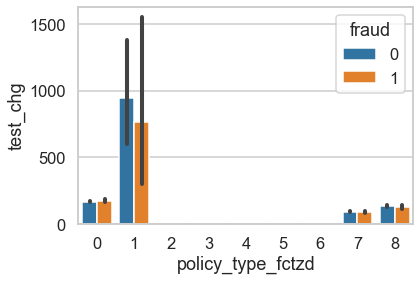

In [47]:
# medium or near largest context:
sns.set_context("talk")
g=sns.barplot(x="policy_type_fctzd",
              y="test_chg",
              hue="fraud",
              data=HIC4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q10"> </A> <h3>10. Are there high doctor fees?</h3>

Simmilar to question 9, these doctor fess can be related to the cons_fee feature. Which in turn has already been considered in the SML model.

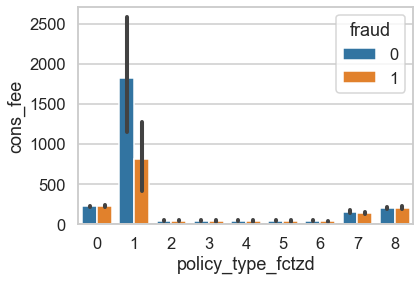

In [48]:
# medium or near largest context:
sns.set_context("talk")
g=sns.barplot(x="policy_type_fctzd",
              y="cons_fee",
              hue="fraud",
              data=HIC4)

Seems to be more frauds related with `test_chg` than `cons_fee`

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q11"> </A> <h3>11. Was the claim reported one day before discharge?</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="days_claimdt_discharge"> </A> <h4>Create "days_claimdt_discharge" for claims raised (claim_dt) before discharged (discharge_dt)</h4>

In [49]:
# calculates the elapsed days between claim and discharge dates
DaysClaimDisc=HIC4['claim_dt']-HIC4['discharge_dt']

In [54]:
DaysClaimDisc.describe()

count                          99991
mean      18 days 05:35:04.497404766
std      106 days 17:21:25.887053558
min              -426 days +00:00:00
25%                -9 days +00:00:00
50%                 12 days 00:00:00
75%                 58 days 00:00:00
max               1133 days 00:00:00
dtype: object

Positive values correspond to claims that were made days after discharge.<br> Negative days are when claim was made before discharge.<br> Then we could create a feature for days elapsed between claim and discharge, either positive or negative. 

<span style='background:plum'>Essential operation</span>

In [59]:
# create days_claimdt_discharge for days elapsed between claim and discharge
# it is assumed that most claims are made after discharge. Then negative values 
# correspond to claims made before discharge. Zero values for claims made same day of discharge
# and positive values for claims made after discharge
HIC4['days_claimdt_discharge']=(HIC4['claim_dt']-HIC4['discharge_dt']).dt.days

In [60]:
HIC4.head()

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   
2   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
3   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
4   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   
2                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
3                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
4                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   
2         A                0           D                  0        25000   
3         A                0           D                  0        25000   
4         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   
2   ZH0-U8I16                2 2009-12-23  YGV-YGC685            0.0   
3  HI3-K93J44                3 2009-12-24  YGV-YGC685            0.0   
4   DL5-O9K48                4 2009-11-26  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   
2    FA21FY42                 1         Y              1.0 2009-12-17   
3     OY17AQ3                 2         Y              1.0 2009-12-23   
4     OY17AQ3                 2         Y              1.0 2009-11-22   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   
2   2009-12-22    6798.14          0.0          0.0       0.0       0.0   
3   2010-02-28    3988.11          0.0          0.0       0.0       0.0   
4   2009-11-27    1294.92          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   
2            0.0        0.0           0.0            0.0                 0.0   
3            0.0        0.0           0.0            0.0                 0.0   
4            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   
2        0.0        Genuine               0        6525 2010-01-18   
3        0.0        Genuine               0        3680 2010-01-18   
4        0.0        Genuine               0        1165 2009-11-27   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  \
0            B                   0      1                    0.59   
1            A                   1      0                    0.67   
2            A                   1      1                    0.52   
3            A                   1      0                    0.52   
4            A                   1      0                    0.53   

   days_claimdt_startpolicy  claimdt_day_week

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='days_claimdt_discharge'>

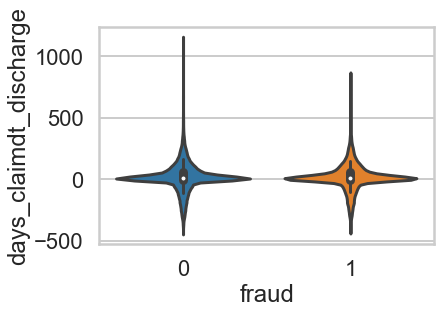

In [63]:
# largest context:
sns.set_context("poster")
sns.violinplot("fraud", "days_claimdt_discharge", data=HIC4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="ScaleDaysClaimdtDischarge"> </A> <h4>Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_discharge"</h4>

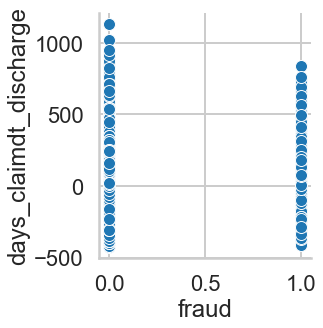

In [65]:
sns.relplot(x="fraud", y="days_claimdt_discharge", data=HIC4)

Not evident potential outliers

<span style='background:plum'>Essential operation</span>

In [66]:
## Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_discharge"
# Normalizing the values of 'days_claimdt_discharge' from 0 to 1 might be a good decision.
# This way the values between a certain range () will have higher frauds probability.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# https://stackoverflow.com/questions/51643004/apply-minmaxscaler-on-a-pandas-column
y=scaler.fit_transform(HIC4[['days_claimdt_discharge']])
# updates claim_disch_days to standardized values between 0 and 1 
HIC4['days_claimdt_discharge']=y
HIC2=HIC4.copy()

In [68]:
HIC4.head()

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   
2   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
3   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
4   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   
2                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
3                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   
4                2   F        1.0 1936-03-14      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   
2         A                0           D                  0        25000   
3         A                0           D                  0        25000   
4         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   
2   ZH0-U8I16                2 2009-12-23  YGV-YGC685            0.0   
3  HI3-K93J44                3 2009-12-24  YGV-YGC685            0.0   
4   DL5-O9K48                4 2009-11-26  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   
2    FA21FY42                 1         Y              1.0 2009-12-17   
3     OY17AQ3                 2         Y              1.0 2009-12-23   
4     OY17AQ3                 2         Y              1.0 2009-11-22   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   
2   2009-12-22    6798.14          0.0          0.0       0.0       0.0   
3   2010-02-28    3988.11          0.0          0.0       0.0       0.0   
4   2009-11-27    1294.92          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   
2            0.0        0.0           0.0            0.0                 0.0   
3            0.0        0.0           0.0            0.0                 0.0   
4            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   
2        0.0        Genuine               0        6525 2010-01-18   
3        0.0        Genuine               0        3680 2010-01-18   
4        0.0        Genuine               0        1165 2009-11-27   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  \
0            B                   0      1                    0.59   
1            A                   1      0                    0.67   
2            A                   1      1                    0.52   
3            A                   1      0                    0.52   
4            A                   1      0                    0.53   

   days_claimdt_startpolicy  claimdt_day_week

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='days_claimdt_discharge'>

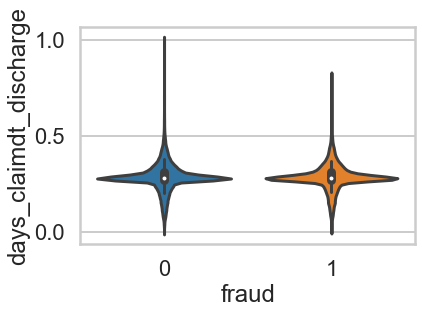

In [69]:
# largest context:
sns.set_context("poster")
sns.violinplot("fraud", "days_claimdt_discharge", data=HIC4)

In [70]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tpa                       99991 non-null  object        
 1   tpa_fctzd                 99991 non-null  int64         
 2   policy_ref                99991 non-null  object        
 3   policy_ref_fctzd          99991 non-null  int64         
 4   member_id                 99991 non-null  object        
 5   member_id_fctzd           99991 non-null  int64         
 6   sex                       94486 non-null  object        
 7   sex_fctzd                 99991 non-null  float64       
 8   dob                       99991 non-null  datetime64[ns]
 9   policy_start_dt           99991 non-null  datetime64[ns]
 10  policy_end_dt             99991 non-null  datetime64[ns]
 11  prod_code                 99991 non-null  object        
 12  prod_code_fctzd   

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="Q12"> </A> <h3>12. Did the claim intimation happen after 48 h of admission?</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="days_claimdt_admitdt"> </A> <h4>Create "days_claimdt_admitdt" for claims raised (claim_dt) after admission (admit_dt)</h4>

<span style='background:plum'>Essential operation</span>

In [71]:
# positive values should be normal as it is expected to claim after being admitted.
# negative values shall be considered as an anomaly 
# zero values should be suspicious
HIC4['days_claimdt_admitdt']=(HIC4['claim_dt']-HIC4['admit_dt']).dt.days
HIC2=HIC4.copy()

In [72]:
HIC4.head(2)

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  \
0            B                   0      1                    0.59   
1            A                   1      0                    0.67   

   days_claimdt_startpolicy  claimdt_day_week  claimdt_on_weekend  \
0                      0.30                 6                   1   
1                      0.18                 1                   0   

   days_claimdt_discharge  days_claimdt_admitdt  
0                    0.28                    29  
1                    0.18                   -31

In [73]:
HIC4['days_claimdt_admitdt'].describe()

count    99991.00
mean        41.79
std        105.15
min       -365.00
25%          0.00
50%         24.00
75%         77.00
max       1138.00
Name: days_claimdt_admitdt, dtype: float64

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="ScaleDaysClaimdtAdmitdt"> </A> <h4>Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_admitdt"</h4>

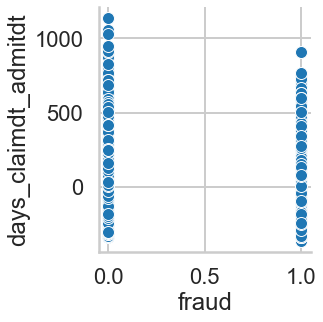

In [74]:
sns.relplot(x="fraud", y="days_claimdt_admitdt", data=HIC4)

Not evident potential outliers

<span style='background:plum'>Essential operation</span>

In [75]:
## Scales the values in range 0 to 1 to deal with the negative values of "days_claimdt_discharge"
# Normalizing the values of 'days_claimdt_discharge' from 0 to 1 might be a good decision.
# This way the values between a certain range () will have higher frauds probability.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# https://stackoverflow.com/questions/51643004/apply-minmaxscaler-on-a-pandas-column
y=scaler.fit_transform(HIC4[['days_claimdt_admitdt']])
# updates claim_disch_days to standardized values between 0 and 1 
HIC4['days_claimdt_admitdt']=y
HIC2=HIC4.copy()

In [76]:
HIC4.head(2)

tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   

   member_id_fctzd sex  sex_fctzd        dob policy_start_dt policy_end_dt  \
0                0   M        0.0 1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0 1935-02-18      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd   claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0 2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1 2009-01-13  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd   admit_dt  \
0    TX25ID35                 0         N              0.0 2009-11-28   
1    FA21FY42                 1         Y              1.0 2009-02-13   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt payment_dt  \
0        0.0        Genuine               0         570 2010-01-17   
1        0.0        Genuine               0        3150 2009-12-31   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  \
0            B                   0      1                    0.59   
1            A                   1      0                    0.67   

   days_claimdt_startpolicy  claimdt_day_week  claimdt_on_weekend  \
0                      0.30                 6                   1   
1                      0.18                 1                   0   

   days_claimdt_discharge  days_claimdt_admitdt  
0                    0.28                  0.26  
1                    0.18                  0.22

In [77]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   tpa                       99991 non-null  object        
 1   tpa_fctzd                 99991 non-null  int64         
 2   policy_ref                99991 non-null  object        
 3   policy_ref_fctzd          99991 non-null  int64         
 4   member_id                 99991 non-null  object        
 5   member_id_fctzd           99991 non-null  int64         
 6   sex                       94486 non-null  object        
 7   sex_fctzd                 99991 non-null  float64       
 8   dob                       99991 non-null  datetime64[ns]
 9   policy_start_dt           99991 non-null  datetime64[ns]
 10  policy_end_dt             99991 non-null  datetime64[ns]
 11  prod_code                 99991 non-null  object        
 12  prod_code_fctzd   

In [90]:
#save datframes to csv files
HIC2.to_csv('HIC2.csv')
HIC4.to_csv('HIC4.csv')

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="SelectingFeatures4Model"> </A> <h2>Preparing final columns or features  in order to create final models</h2>

<span style='background:plum'>Essential operation if starting from section of **"Preparing final columns or features in order to perform a test model"**</span>

In [80]:
# load dataframes if starting here
HIC2=pd.read_csv("HIC2.csv")
HIC4=pd.read_csv("HIC4.csv")

In [81]:
HIC2.head()

Unnamed: 0 tpa  tpa_fctzd     policy_ref  policy_ref_fctzd   member_id  \
0           0   A          0  RK1-1XKBF65NW                 0  XK8-H47QX8   
1           1   A          0  YD9-1XBLA13AJ                 1  OD6-R24XM3   
2           2   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
3           3   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   
4           4   A          0  YD9-1XBLA13AJ                 1  WZ8-O40WT6   

   member_id_fctzd sex  sex_fctzd         dob policy_start_dt policy_end_dt  \
0                0   M        0.0  1978-04-14      2009-08-20    2010-08-19   
1                1   M        0.0  1935-02-18      2009-04-05    2010-03-08   
2                2   F        1.0  1936-03-14      2009-04-05    2010-03-08   
3                2   F        1.0  1936-03-14      2009-04-05    2010-03-08   
4                2   F        1.0  1936-03-14      2009-04-05    2010-03-08   

  prod_code  prod_code_fctzd policy_type  policy_type_fctzd  sum_insured  \
0         A                0           D                  0         8750   
1         A                0           D                  0        25000   
2         A                0           D                  0        25000   
3         A                0           D                  0        25000   
4         A                0           D                  0        25000   

    claim_ref  claim_ref_fctzd    claim_dt hospital_id  hosp_id_fctzd  \
0  LS3-F51V56                0  2009-12-27  YGV-YGC685            0.0   
1  LQ8-V12K42                1  2009-01-13  YGV-YGC685            0.0   
2   ZH0-U8I16                2  2009-12-23  YGV-YGC685            0.0   
3  HI3-K93J44                3  2009-12-24  YGV-YGC685            0.0   
4   DL5-O9K48                4  2009-11-26  YGV-YGC685            0.0   

  hos_zipcode  hosp_zipcd_fctzd hosp_type  hosp_type_fctzd    admit_dt  \
0    TX25ID35                 0         N              0.0  2009-11-28   
1    FA21FY42                 1         Y              1.0  2009-02-13   
2    FA21FY42                 1         Y              1.0  2009-12-17   
3     OY17AQ3                 2         Y              1.0  2009-12-23   
4     OY17AQ3                 2         Y              1.0  2009-11-22   

  discharge_dt  claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  \
0   2009-12-22     922.99          0.0          0.0       0.0       0.0   
1   2009-06-13    3151.08          0.0          0.0       0.0       0.0   
2   2009-12-22    6798.14          0.0          0.0       0.0       0.0   
3   2010-02-28    3988.11          0.0          0.0       0.0       0.0   
4   2009-11-27    1294.92          0.0          0.0       0.0       0.0   

   pharmacy_cost  other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  \
0            0.0        0.0           0.0            0.0                 0.0   
1            0.0        0.0           0.0            0.0                 0.0   
2            0.0        0.0           0.0            0.0                 0.0   
3            0.0        0.0           0.0            0.0                 0.0   
4            0.0        0.0           0.0            0.0                 0.0   

   copayment recommendation  recomdtn_fctzd  settle_amt  payment_dt  \
0        0.0        Genuine               0         570  2010-01-17   
1        0.0        Genuine               0        3150  2009-12-31   
2        0.0        Genuine               0        6525  2010-01-18   
3        0.0        Genuine               0        3680  2010-01-18   
4        0.0        Genuine               0        1165  2009-11-27   

  payment_type  payment_type_fctzd  fraud  days_claimdt_endpolicy  \
0            B                   0      1                    0.59   
1            A                   1      0                    0.67   
2            A                   1      1                    0.52   
3            A                   1      0                    0.52   
4            A      

<span style='background:plum'>Essential operation if starting from section of **"Preparing final columns or features in order to perform a test model"**</span>

In [82]:
#drops index 0 created when the dataframe was saved
# https://www.adamsmith.haus/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-index-in-python
HIC2.drop(HIC2.columns[0],axis=1, inplace=True)
HIC4.drop(HIC4.columns[0],axis=1, inplace=True)

In [83]:
HIC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tpa                       99991 non-null  object 
 1   tpa_fctzd                 99991 non-null  int64  
 2   policy_ref                99991 non-null  object 
 3   policy_ref_fctzd          99991 non-null  int64  
 4   member_id                 99991 non-null  object 
 5   member_id_fctzd           99991 non-null  int64  
 6   sex                       94486 non-null  object 
 7   sex_fctzd                 99991 non-null  float64
 8   dob                       99991 non-null  object 
 9   policy_start_dt           99991 non-null  object 
 10  policy_end_dt             99991 non-null  object 
 11  prod_code                 99991 non-null  object 
 12  prod_code_fctzd           99991 non-null  int64  
 13  policy_type               99991 non-null  object 
 14  policy

In [84]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tpa                       99991 non-null  object 
 1   tpa_fctzd                 99991 non-null  int64  
 2   policy_ref                99991 non-null  object 
 3   policy_ref_fctzd          99991 non-null  int64  
 4   member_id                 99991 non-null  object 
 5   member_id_fctzd           99991 non-null  int64  
 6   sex                       94486 non-null  object 
 7   sex_fctzd                 99991 non-null  float64
 8   dob                       99991 non-null  object 
 9   policy_start_dt           99991 non-null  object 
 10  policy_end_dt             99991 non-null  object 
 11  prod_code                 99991 non-null  object 
 12  prod_code_fctzd           99991 non-null  int64  
 13  policy_type               99991 non-null  object 
 14  policy

In [85]:
TotalFrauds=len(HIC4[HIC4['fraud']==1])
TotalFrauds

21689

In [86]:
TotalNotFrauds=len(HIC4[HIC4['fraud']==0])
TotalNotFrauds

78302

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="DropingColumns2"> </A> <h3>Drop all but numeric and 'fctzd' features</h3>

In [87]:
HIC4.dtypes.value_counts()

object     19
float64    18
int64      14
dtype: int64

In [88]:
HIC4.columns

Index(['tpa', 'tpa_fctzd', 'policy_ref', 'policy_ref_fctzd', 'member_id',
       'member_id_fctzd', 'sex', 'sex_fctzd', 'dob', 'policy_start_dt',
       'policy_end_dt', 'prod_code', 'prod_code_fctzd', 'policy_type',
       'policy_type_fctzd', 'sum_insured', 'claim_ref', 'claim_ref_fctzd',
       'claim_dt', 'hospital_id', 'hosp_id_fctzd', 'hos_zipcode',
       'hosp_zipcd_fctzd', 'hosp_type', 'hosp_type_fctzd', 'admit_dt',
       'discharge_dt', 'claim_amt', 'nursing_chg', 'surgery_chg', 'cons_fee',
       'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp',
       'post_hosp_exp', 'other_chg_non_hosp', 'copayment', 'recommendation',
       'recomdtn_fctzd', 'settle_amt', 'payment_dt', 'payment_type',
       'payment_type_fctzd', 'fraud', 'days_claimdt_endpolicy',
       'days_claimdt_startpolicy', 'claimdt_day_week', 'claimdt_on_weekend',
       'days_claimdt_discharge', 'days_claimdt_admitdt'],
      dtype='object')

<span style='background:plum'>Essential operation if starting from section of **"Preparing final columns or features in order to perform a test model"**</span>

In [89]:
# drop 19 features
HIC4.drop(['tpa', 'policy_ref', 'member_id', 'sex', 'dob', 'policy_start_dt', 'policy_end_dt', 'prod_code',
            'policy_type', 'claim_ref', 'claim_dt', 'hospital_id', 'hos_zipcode', 'hosp_type', 'admit_dt',
            'discharge_dt', 'recommendation', 'payment_dt', 'payment_type'], axis=1, inplace=True)

In [90]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tpa_fctzd                 99991 non-null  int64  
 1   policy_ref_fctzd          99991 non-null  int64  
 2   member_id_fctzd           99991 non-null  int64  
 3   sex_fctzd                 99991 non-null  float64
 4   prod_code_fctzd           99991 non-null  int64  
 5   policy_type_fctzd         99991 non-null  int64  
 6   sum_insured               99991 non-null  int64  
 7   claim_ref_fctzd           99991 non-null  int64  
 8   hosp_id_fctzd             99991 non-null  float64
 9   hosp_zipcd_fctzd          99991 non-null  int64  
 10  hosp_type_fctzd           99991 non-null  float64
 11  claim_amt                 99991 non-null  float64
 12  nursing_chg               99991 non-null  float64
 13  surgery_chg               99991 non-null  float64
 14  cons_f

There are now 32 features on HIC4

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="RearrangeFeatures"> </A> <h3>Rearranges features to facilitate view of correlation with fraud</h3>

In [38]:
HIC4.columns

Index(['tpa_fctzd', 'policy_ref_fctzd', 'member_id_fctzd', 'sex_fctzd',
       'prod_code_fctzd', 'policy_type_fctzd', 'sum_insured',
       'claim_ref_fctzd', 'hosp_id_fctzd', 'hosp_zipcd_fctzd',
       'hosp_type_fctzd', 'claim_amt', 'nursing_chg', 'surgery_chg',
       'cons_fee', 'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp',
       'post_hosp_exp', 'other_chg_non_hosp', 'copayment', 'recomdtn_fctzd',
       'settle_amt', 'payment_type_fctzd', 'fraud', 'days_claimdt_endpolicy',
       'days_claimdt_startpolicy', 'claimdt_day_week', 'claimdt_on_weekend',
       'days_claimdt_discharge', 'days_claimdt_admitdt'],
      dtype='object')

In [91]:
HIC4=HIC4[['fraud','tpa_fctzd', 'policy_ref_fctzd', 'member_id_fctzd', 'sex_fctzd',
             'prod_code_fctzd', 'policy_type_fctzd', 'sum_insured', 'claim_ref_fctzd',
             'hosp_id_fctzd', 'hosp_zipcd_fctzd', 'hosp_type_fctzd', 'claim_amt', 'nursing_chg',
             'surgery_chg', 'cons_fee', 'test_chg', 'pharmacy_cost', 'other_chg', 'pre_hosp_exp', 
             'post_hosp_exp', 'other_chg_non_hosp', 'copayment', 'recomdtn_fctzd', 'settle_amt',
             'payment_type_fctzd', 'days_claimdt_endpolicy', 'days_claimdt_startpolicy',
             'claimdt_day_week', 'claimdt_on_weekend', 'days_claimdt_discharge', 'days_claimdt_admitdt']]

In [92]:
HIC4.head()

fraud  tpa_fctzd  policy_ref_fctzd  member_id_fctzd  sex_fctzd  \
0      1          0                 0                0        0.0   
1      0          0                 1                1        0.0   
2      1          0                 1                2        1.0   
3      0          0                 1                2        1.0   
4      0          0                 1                2        1.0   

   prod_code_fctzd  policy_type_fctzd  sum_insured  claim_ref_fctzd  \
0                0                  0         8750                0   
1                0                  0        25000                1   
2                0                  0        25000                2   
3                0                  0        25000                3   
4                0                  0        25000                4   

   hosp_id_fctzd  hosp_zipcd_fctzd  hosp_type_fctzd  claim_amt  nursing_chg  \
0            0.0                 0              0.0     922.99          0.0   
1            0.0                 1              1.0    3151.08          0.0   
2            0.0                 1              1.0    6798.14          0.0   
3            0.0                 2              1.0    3988.11          0.0   
4            0.0                 2              1.0    1294.92          0.0   

   surgery_chg  cons_fee  test_chg  pharmacy_cost  other_chg  pre_hosp_exp  \
0          0.0       0.0       0.0            0.0        0.0           0.0   
1          0.0       0.0       0.0            0.0        0.0           0.0   
2          0.0       0.0       0.0            0.0        0.0           0.0   
3          0.0       0.0       0.0            0.0        0.0           0.0   
4          0.0       0.0       0.0            0.0        0.0           0.0   

   post_hosp_exp  other_chg_non_hosp  copayment  recomdtn_fctzd  settle_amt  \
0            0.0                 0.0        0.0               0         570   
1            0.0                 0.0        0.0               0        3150   
2            0.0                 0.0        0.0               0        6525   
3            0.0                 0.0        0.0               0        3680   
4            0.0                 0.0        0.0               0        1165   

   payment_type_fctzd  days_claimdt_endpolicy  days_claimdt_startpolicy  \
0                   0                    0.59                      0.30   
1                   1                    0.67                      0.18   
2                   1                    0.52                      0.37   
3                   1                    0.52                      0.37   
4                   1                    0.53                      0.36   

   claimdt_day_week  claimdt_on_weekend  days_claimdt_discharge  \
0                 6                   1                    0.28   
1                 1                   0                    0.18   
2                 2                   0                    0.27   
3                 3                   0                    0.23   
4                 3                   0                    0.27   

   days_claimdt_admitdt  
0                  0.26  
1                  0.22  
2                  0.25  
3                  0.24  
4                  0.25

In [93]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fraud                     99991 non-null  int64  
 1   tpa_fctzd                 99991 non-null  int64  
 2   policy_ref_fctzd          99991 non-null  int64  
 3   member_id_fctzd           99991 non-null  int64  
 4   sex_fctzd                 99991 non-null  float64
 5   prod_code_fctzd           99991 non-null  int64  
 6   policy_type_fctzd         99991 non-null  int64  
 7   sum_insured               99991 non-null  int64  
 8   claim_ref_fctzd           99991 non-null  int64  
 9   hosp_id_fctzd             99991 non-null  float64
 10  hosp_zipcd_fctzd          99991 non-null  int64  
 11  hosp_type_fctzd           99991 non-null  float64
 12  claim_amt                 99991 non-null  float64
 13  nursing_chg               99991 non-null  float64
 14  surger

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="FeatureSelection"> </A> <h2>Feature Selection</h2>

Before removing fraud negative correlated values, as a demonstration we can explore the existance of any other feature highly correlated.

" Correlated features can make coefficients in regression (or feature importance in tree models) unstable or difficult to
interpret."(Harrison, Machine Learning Pocket Reference: Working with Structured Data in Python, 2019). 

"We can use the correlated_columns function or run the following code to find columns that have a correlation coefficient of .95 or above:."(Harrison, Machine Learning Pocket Reference: Working with Structured Data in Python, 2019). 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="CollinearColumns"> </A> <h3>Collinear Columns</h3>

In [43]:
def correlated_columns(df, threshold=0.95):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(np.tril(df1, k=-1),
                                     columns=df.columns,
                                     index=df.columns,
                                    )
        )
        .stack().rename("pearson").pipe(
            lambda s: s[
                s.abs() > threshold].reset_index()
        ).query("level_0 not in level_1")
    )

In [94]:
correlated_columns(HIC4)

level_0           level_1  pearson
1  claim_ref_fctzd  policy_ref_fctzd     0.99
2  claim_ref_fctzd   member_id_fctzd     0.97

"Highly correlated columns don’t add value and can throw off feature importance and interpretation of regression coefficients." <br>**"If we had correlated columns, we could choose to remove either the columns from level_0 or level_1 from the feature data"**<br>**(Harrison, Machine Learning Pocket Reference: Working with Structured Data in Python, 2019)**.

AS claim_ref_fctzd appears twice, it might be convenient to remove it.<br> But before we could consider a linear correlation to fraud.

<A name="CorrTest"> </A> <h3>Test linear correlation</h3>

In [42]:
# test linear correlation with fraud
HIC4.corr()

fraud  tpa_fctzd  policy_ref_fctzd  \
fraud                     1.00e+00  -7.77e-03         -3.86e-03   
tpa_fctzd                -7.77e-03   1.00e+00         -2.45e-01   
policy_ref_fctzd         -3.86e-03  -2.45e-01          1.00e+00   
member_id_fctzd          -2.16e-03  -2.53e-01          9.68e-01   
sex_fctzd                -3.27e-03   2.96e-02         -1.63e-03   
prod_code_fctzd          -6.87e-03   4.41e-01         -2.38e-01   
policy_type_fctzd         1.39e-02  -4.42e-02          1.95e-02   
sum_insured              -2.27e-03  -5.06e-04          2.88e-03   
claim_ref_fctzd          -3.64e-03  -2.23e-01          9.89e-01   
hosp_id_fctzd            -5.71e-03  -4.95e-02          4.74e-01   
hosp_zipcd_fctzd          1.18e-02  -3.19e-02          4.02e-02   
hosp_type_fctzd           5.58e-03  -4.92e-02          9.57e-02   
claim_amt                -1.79e-03  -2.77e-03          5.81e-03   
nursing_chg              -2.83e-03  -7.02e-03          1.92e-03   
surgery_chg               1.51e-03  -1.90e-02          7.20e-03   
cons_fee                 -4.79e-03  -5.26e-03          1.76e-03   
test_chg                 -1.10e-03  -6.44e-03          3.34e-03   
pharmacy_cost             6.05e-04  -1.00e-02          4.76e-03   
other_chg                -2.06e-03  -3.62e-03          9.95e-03   
pre_hosp_exp              1.90e-03   1.48e-02         -1.39e-02   
post_hosp_exp             4.20e-03  -8.84e-03         -1.05e-02   
other_chg_non_hosp        1.58e-03   2.88e-02         -8.16e-04   
copayment                 8.94e-03   8.34e-03          1.32e-02   
recomdtn_fctzd           -3.38e-02   3.04e-01         -1.01e-01   
settle_amt               -1.24e-03  -4.83e-03          9.80e-03   
payment_type_fctzd       -4.43e-03   2.56e-01         -1.11e-01   
days_claimdt_endpolicy    1.91e-03  -5.91e-02          5.55e-02   
days_claimdt_startpolicy -6.59e-03   2.73e-03          1.61e-03   
claimdt_day_week          1.74e-03   4.19e-03          2.74e-04   
claimdt_on_weekend       -5.63e-04   1.04e-03          1.61e-03   
days_claimdt_discharge    1.76e-03   1.87e-01         -8.03e-02   
days_claimdt_admitdt      6.00e-04   1.02e-01         -4.97e-02   

                          member_id_fctzd  sex_fctzd  prod_code_fctzd  \
fraud                           -2.16e-03  -3.27e-03        -6.87e-03   
tpa_fctzd                       -2.53e-01   2.96e-02         4.41e-01   
policy_ref_fctzd                 9.68e-01  -1.63e-03        -2.38e-01   
member_id_fctzd                  1.00e+00  -1.48e-03        -2.50e-01   
sex_fctzd                       -1.48e-03   1.00e+00         5.34e-03   
prod_code_fctzd                 -2.50e-01   5.34e-03         1.00e+00   
policy_type_fctzd                1.99e-02  -7.36e-02         3.14e-02   
sum_insured                      3.44e-03  -1.38e-02        -4.09e-03   
claim_ref_fctzd                  9.67e-01  -2.06e-03        -2.49e-01   
hosp_id_fctzd                    4.54e-01   2.37e-02        -1.45e-01   
hosp_zipcd_fctzd                 4.23e-02  -1.91e-03        -5.34e-02   
hosp_type_fctzd                  9.59e-02  -7.24e-02        -9.59e-02   
claim_amt                        6.65e-03  -2.16e-02        -7.58e-03   
nursing_chg                      2.35e-03  -1.33e-02        -7.02e-03   
surgery_chg                      1.04e-02  -6.00e-03        -1.85e-02   
cons_fee                         2.28e-03  -1.47e-02        -5.24e-03   
test_chg                         4.00e-03  -1.58e-02        -7.97e-03   
pharmacy_cost                    5.74e-03  -1.67e-02        -1.09e-02   
other_chg                        1.03e-02  -4.60e-03        -5.18e-03   
pre_hosp_exp                    -9.30e-03   1.57e-02        -3.94e-03   
post_hosp_exp                   -1.12e-02  -1.02e-02         7.00e-03   
other_chg_non_hosp               1.34e-03   6.39e-03        -7.35e-03   
copayment                        1.54e-02   4.77e-03        -1.68e-02   
recomdtn_fctzd                  -9.50e-02   9.69e-03        -3.68

<span style='background:bisque'> Do negative fraud correlated values should be removed from the features?</span>

The following cells of this subsection are to plot a heat map of correlation of features.

In [45]:
limit = 0.95

In [46]:
#corr = agg_df.corr()
CorrCols = HIC4.corr()

In [47]:
#mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
mask = np.triu(np.ones(CorrCols.shape), k=1).astype(bool)

In [48]:
#corr_no_diag = corr.where(mask)
CorrCols_no_diag = CorrCols.where(mask)

In [49]:
# coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > threshold)]
coll = [c for c in CorrCols_no_diag.columns if any(abs(CorrCols_no_diag[c]) > limit)]

In [50]:
coll

['member_id_fctzd', 'claim_ref_fctzd']

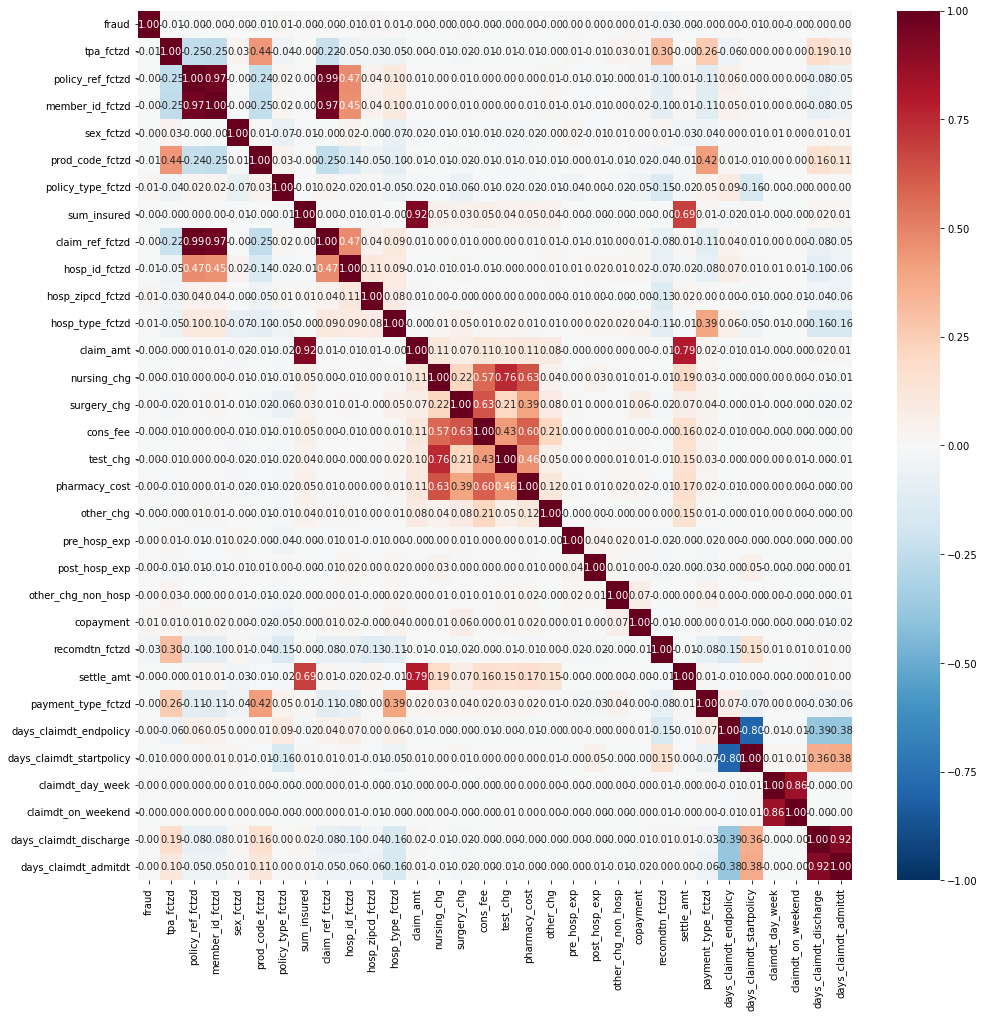

In [52]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(16, 16))
ax = heatmap(HIC4.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1,)

With so many features it difficult to plot their correlation. Nevertheless we can see the following:
>1) `policy_ref_fctzd` is very close correlated (>0.90) with `member_id_fctzd` and `claim_ref_ftzd`

>2) `member_id_fctzd` is very close correlated (>0.90) with `policy_ref_fctzd` and `claim_ref_ftzd`

>3) `claim_ref_ftzd` is very close correlated (>0.90) with `policy_ref_fctzd`, `member_id_fctzd`

>4) `claimdt_day_week` is very close correlated (>0.90) with `claimdt_on_weekend` and viceversa

>5) `claim_amt` is very close correlated (>0.90) with `sum_insured` and viceversa

>6) `days_claimdt_discharge` is very close correlated (>0.90) with `days_claimdt_admit` and viceversa

Then could be convenient to review more carefully what of the former features are more correlated with fraud so we can decide which features should be removed.

In [95]:
# test linear correlation with fraud
# https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns
HIC4[['fraud','policy_ref_fctzd','member_id_fctzd', 'claim_ref_fctzd',
      'claim_amt', 'sum_insured', 'claimdt_day_week', 'claimdt_on_weekend',
      'days_claimdt_discharge', 'days_claimdt_admitdt']].corr()

fraud  policy_ref_fctzd  member_id_fctzd  \
fraud                   1.00e+00         -3.86e-03        -2.16e-03   
policy_ref_fctzd       -3.86e-03          1.00e+00         9.68e-01   
member_id_fctzd        -2.16e-03          9.68e-01         1.00e+00   
claim_ref_fctzd        -3.64e-03          9.89e-01         9.67e-01   
claim_amt              -1.79e-03          5.81e-03         6.65e-03   
sum_insured            -2.27e-03          2.88e-03         3.44e-03   
claimdt_day_week        1.74e-03          2.74e-04         7.97e-05   
claimdt_on_weekend     -5.63e-04          1.61e-03         1.10e-03   
days_claimdt_discharge  1.76e-03         -8.03e-02        -8.24e-02   
days_claimdt_admitdt    6.00e-04         -4.97e-02        -5.07e-02   

                        claim_ref_fctzd  claim_amt  sum_insured  \
fraud                         -3.64e-03  -1.79e-03    -2.27e-03   
policy_ref_fctzd               9.89e-01   5.81e-03     2.88e-03   
member_id_fctzd                9.67e-01   6.65e-03     3.44e-03   
claim_ref_fctzd                1.00e+00   6.27e-03     3.16e-03   
claim_amt                      6.27e-03   1.00e+00     9.23e-01   
sum_insured                    3.16e-03   9.23e-01     1.00e+00   
claimdt_day_week               9.93e-04  -3.98e-03    -3.90e-03   
claimdt_on_weekend             2.18e-03  -4.21e-03    -4.08e-03   
days_claimdt_discharge        -7.61e-02   1.52e-02     1.76e-02   
days_claimdt_admitdt          -4.99e-02   1.15e-02     1.50e-02   

                        claimdt_day_week  claimdt_on_weekend  \
fraud                           1.74e-03           -5.63e-04   
policy_ref_fctzd                2.74e-04            1.61e-03   
member_id_fctzd                 7.97e-05            1.10e-03   
claim_ref_fctzd                 9.93e-04            2.18e-03   
claim_amt                      -3.98e-03           -4.21e-03   
sum_insured                    -3.90e-03           -4.08e-03   
claimdt_day_week                1.00e+00            8.59e-01   
claimdt_on_weekend              8.59e-01            1.00e+00   
days_claimdt_discharge         -8.96e-04           -2.57e-03   
days_claimdt_admitdt           -9.22e-04           -1.87e-03   

                        days_claimdt_discharge  days_claimdt_admitdt  
fraud                                 1.76e-03              6.00e-04  
policy_ref_fctzd                     -8.03e-02             -4.97e-02  
member_id_fctzd                      -8.24e-02             -5.07e-02  
claim_ref_fctzd                      -7.61e-02             -4.99e-02  
claim_amt                             1.52e-02              1.15e-02  
sum_insured                           1.76e-02              1.50e-02  
claimdt_day_week                     -8.96e-04             -9.22e-04  
claimdt_on_weekend                   -2.57e-03             -1.87e-03  
days_claimdt_discharge                1.00e+00              9.15e-01  
days_claimdt_admitdt                  9.15e-01              1.00e+00

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="DropLessCorrWF"> </A> <h3>For close correlated features each other, removes the less correlated features with fraud</h3>

In [96]:
# for close correlated features each other, removes the less correlated features with fraud 
HIC4.drop(['policy_ref_fctzd', 'claim_ref_fctzd', 'sum_insured',
           'claimdt_on_weekend', 'days_claimdt_admitdt'], axis=1, inplace=True)

In [97]:
HIC4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fraud                     99991 non-null  int64  
 1   tpa_fctzd                 99991 non-null  int64  
 2   member_id_fctzd           99991 non-null  int64  
 3   sex_fctzd                 99991 non-null  float64
 4   prod_code_fctzd           99991 non-null  int64  
 5   policy_type_fctzd         99991 non-null  int64  
 6   hosp_id_fctzd             99991 non-null  float64
 7   hosp_zipcd_fctzd          99991 non-null  int64  
 8   hosp_type_fctzd           99991 non-null  float64
 9   claim_amt                 99991 non-null  float64
 10  nursing_chg               99991 non-null  float64
 11  surgery_chg               99991 non-null  float64
 12  cons_fee                  99991 non-null  float64
 13  test_chg                  99991 non-null  float64
 14  pharma

In [100]:
# creates dataframe for models
HIC5=HIC4.copy()

In [101]:
# to avoid extra column[0] for the index
HIC5.to_csv("HIC5.csv", index=False)

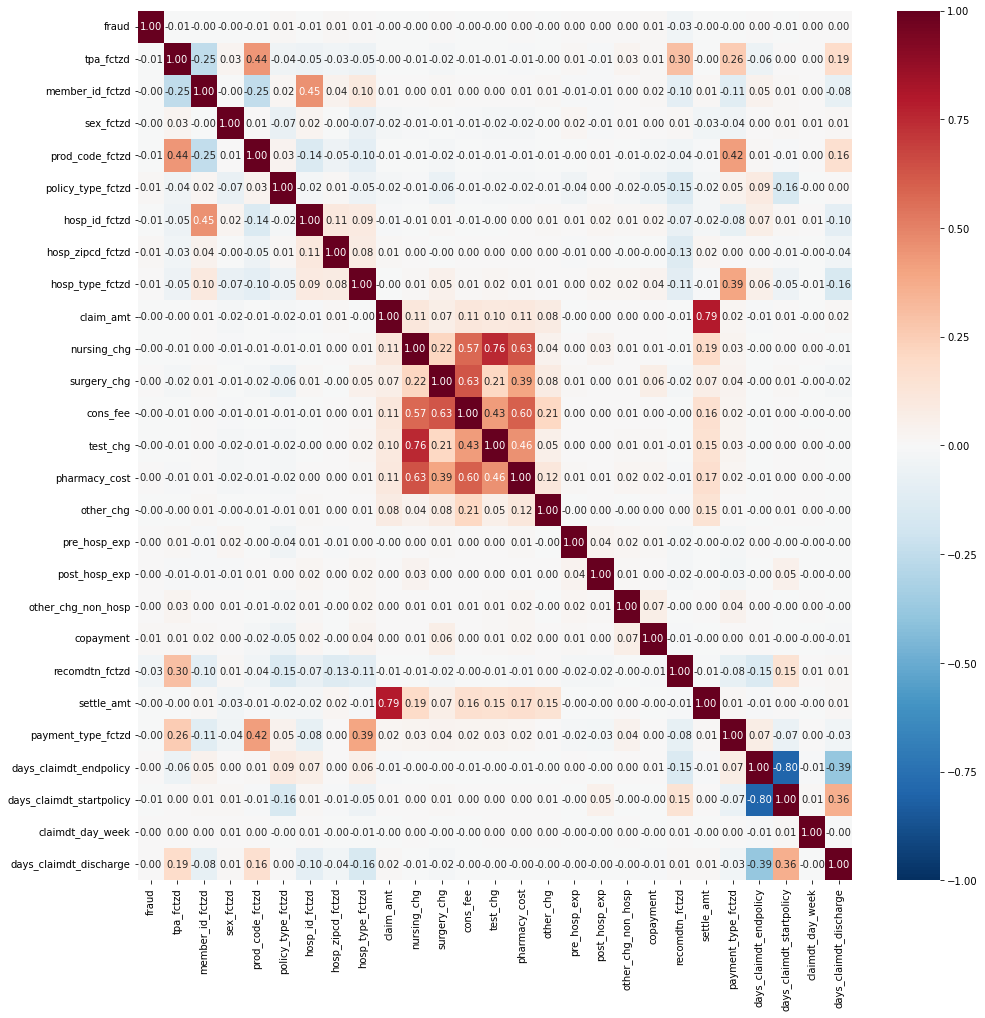

In [99]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(16, 16))
ax = heatmap(HIC4.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1,)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="CreateSets4SML"> </A> <h2>Creates sets for Supervised ML models</h2>

In [102]:
HIC5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fraud                     99991 non-null  int64  
 1   tpa_fctzd                 99991 non-null  int64  
 2   member_id_fctzd           99991 non-null  int64  
 3   sex_fctzd                 99991 non-null  float64
 4   prod_code_fctzd           99991 non-null  int64  
 5   policy_type_fctzd         99991 non-null  int64  
 6   hosp_id_fctzd             99991 non-null  float64
 7   hosp_zipcd_fctzd          99991 non-null  int64  
 8   hosp_type_fctzd           99991 non-null  float64
 9   claim_amt                 99991 non-null  float64
 10  nursing_chg               99991 non-null  float64
 11  surgery_chg               99991 non-null  float64
 12  cons_fee                  99991 non-null  float64
 13  test_chg                  99991 non-null  float64
 14  pharma

As we could considering to have the necessary features it numeric type, the following is to create the sets in order to continue with the ML modeling phase.

In [103]:
# separate the features and targets
yGen=HIC5['fraud']  # selects the first column fraud as target
XGen=HIC5.drop(['fraud'], axis=1) 

In [104]:
yGen

0        1
1        0
2        1
3        0
4        0
        ..
99986    0
99987    1
99988    0
99989    1
99990    0
Name: fraud, Length: 99991, dtype: int64

In [105]:
XGen

tpa_fctzd  member_id_fctzd  sex_fctzd  prod_code_fctzd  \
0              0                0        0.0                0   
1              0                1        0.0                0   
2              0                2        1.0                0   
3              0                2        1.0                0   
4              0                2        1.0                0   
...          ...              ...        ...              ...   
99986          0            86290        1.0                0   
99987          0            86291        0.0                0   
99988          0            86292        1.0                0   
99989          0            86293        0.0                0   
99990          5            86294        0.0                0   

       policy_type_fctzd  hosp_id_fctzd  hosp_zipcd_fctzd  hosp_type_fctzd  \
0                      0            0.0                 0              0.0   
1                      0            0.0                 1              1.0   
2                      0            0.0                 1              1.0   
3                      0            0.0                 2              1.0   
4                      0            0.0                 2              1.0   
...                  ...            ...               ...              ...   
99986                  2            0.0                16              0.0   
99987                  2            0.0               295              1.0   
99988                  4            0.0                16              0.0   
99989                  7            1.0               298              1.0   
99990                  7            1.0               980              0.0   

       claim_amt  nursing_chg  surgery_chg  cons_fee  test_chg  pharmacy_cost  \
0         922.99          0.0          0.0       0.0       0.0            0.0   
1        3151.08          0.0          0.0       0.0       0.0            0.0   
2        6798.14          0.0          0.0       0.0       0.0            0.0   
3        3988.11          0.0          0.0       0.0       0.0            0.0   
4        1294.92          0.0          0.0       0.0       0.0            0.0   
...          ...          ...          ...       ...       ...            ...   
99986     998.34          0.0          0.0       0.0       0.0            0.0   
99987     955.70          0.0          0.0       0.0       0.0            0.0   
99988    1197.22          0.0          0.0       0.0       0.0            0.0   
99989    1194.64          0.0          0.0       0.0       0.0            0.0   
99990    1035.02          0.0          0.0       0.0       0.0            0.0   

       other_chg  pre_hosp_exp  post_hosp_exp  other_chg_non_hosp  copayment  \
0            0.0           0.0            0.0                 0.0        0.0   
1            0.0           0.0            0.0                 0.0        0.0   
2            0.0           0.0            0.0                 0.0        0.0   
3            0.0           0.0            0.0                 0.0        0.0   
4            0.0           0.0            0.0                 0.0        0.0   
...          ...           ...            ...                 ...        ...   
99986        0.0           0.0            0.0                 0.0        0.0   
99987        0.0           0.0            0.0                 0.0        0.0   
99988        0.0           0.0            0.0                 0.0        0.0   
99989        0.0           0.0            0.0                 0.0        0.0   
99990        0.0           0.0            0.0                 0.0        0.0   

       recomdtn_fctzd  settle_amt  payment_type_fctzd  days_claimdt_endpolicy  \
0                   0         570                   0                    0.59   
1                   0        3150                   1                    0.67   
2                   0        6525                   1                    0.52   
3                   0        36

In [106]:
# train_test spliting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XGen, yGen, random_state=0)

In [107]:
# NORMALIZING BY SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
# NORMALIZING BY standardization
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="BalancedClassModels"> </A> <h2>With 3 BALANCED techniques on fraud class, creates Random Forest Classifier (RFClf) models</h2>

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

**Resampling Technique**<br>
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

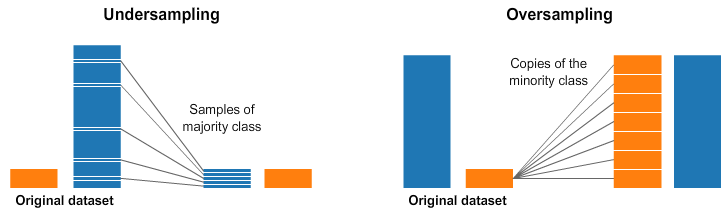

The simplest implementation of **over-sampling** is to duplicate random records from the minority class, which **can cause overfishing**.<br>
In **under-sampling**, the simplest technique involves removing random records from the majority class, which **can cause loss of information**.

1. **Random Under-Sampling**
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.<br>
<span style='background:palegreen'>Undersampling can be a good choice when you have a ton of data -think millions of rows</span>.<span style='background:bisque'> But a drawback to undersampling is that we are removing information that may be valuable.</span>

2. **Random Over-Sampling**
Oversampling can be defined as adding more copies to the minority class.<br> 
<span style='background:palegreen'>**Oversampling can be a good choice when you don’t have a ton of data to work with**</span>.<br>
<span style='background:bisque'>A con to consider when undersampling is that it **can cause overfitting and poor generalization to your test set**.</span>

**Balance data with the<span style='background:paleturquoise'> imbalanced-learn</span> python module**.<br>
A number of more sophisticated resampling techniques have been proposed in the scientific literature.<br>
For example, we can cluster the records of the majority class, and do the **under-sampling** by removing records from each cluster, thus seeking to preserve information.<br> In **over-sampling**, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more **diverse synthetic samples**.

<span style='background:darkorange'>*"Tip oversampling/undersampling has to be used only for the training data</span>.<br> The testing data should not be treated.<br> So oversampling/undersampling is done only after creating a train/test split on the data and not before that".**(Verdhan, 2020)**. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="ROS"> </A> <h3>Random over-sampling with imblearn</h3>

One way to fight imbalanced data is to **generate new samples in the minority classes**. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme.

In [109]:
# import library
from imblearn.over_sampling import RandomOverSampler

In [110]:
from collections import Counter

In [111]:
ros = RandomOverSampler(random_state=0)

In [112]:
# fit predictor and target variable
X_train_ros, y_train_ros = ros.fit_resample(XGen, yGen)

In [113]:
print('Original dataset shape', Counter(yGen))
print('Resample dataset shape', Counter(y_train_ros))

Original dataset shape Counter({0: 78302, 1: 21689})
Resample dataset shape Counter({1: 78302, 0: 78302})


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="RFCl_Resampled"> </A> <h3>Random Forest Classifier with Random over-sampling</h3>

In [121]:
# RandomForestClassifier  X_train_ros, y_train_ros
RFClf = RandomForestClassifier().fit(X_train_ros, y_train_ros)
print("Accuracy on training set: {:.3f}".format(RFClf.score(X_train_ros, y_train_ros)))
print("Accuracy on test set: {:.3f}".format(RFClf.score(X_test, y_test)))
y_pred = RFClf.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
[[19442     0]
 [    0  5556]]


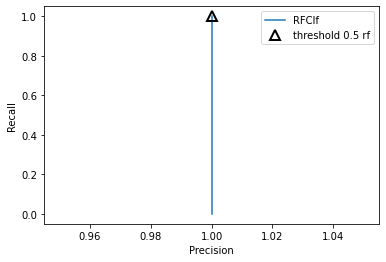

In [123]:
from sklearn.metrics import precision_recall_curve
precision_RFClf, recall_RFClf, thresholds_RFClf= precision_recall_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
plt.plot(precision_RFClf, recall_RFClf, label="RFClf")
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(precision_RFClf[close_default_RFClf], recall_RFClf[close_default_RFClf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

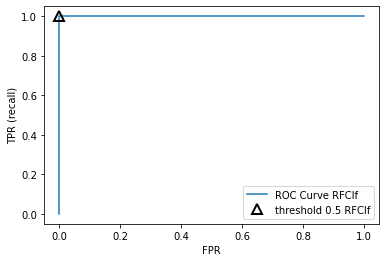

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_RFClf, tpr_RFClf, thresholds_RFClf = roc_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
#plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_RFClf, tpr_RFClf, label="ROC Curve RFClf")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
#plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(fpr_RFClf[close_default_RFClf], tpr_RFClf[close_default_RFClf], '^', markersize=10, 
         label="threshold 0.5 RFClf", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [126]:
RFClf_auc = roc_auc_score(y_test, RFClf.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(RFClf_auc))

AUC for Random Forest: 1.000


In [128]:
'''
https://www.scikit-yb.org/en/latest/
https://github.com/DistrictDataLabs/yellowbrick
https://pypi.org/project/yellowbrick/

yellowbrick used here to visualize the ROCAUC metrics
'''
import yellowbrick
from yellowbrick.classifier import ROCAUC

C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\conza\AppData\Local\Temp\ipykernel_20220\3744799080.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  roc_viz.fig.show()


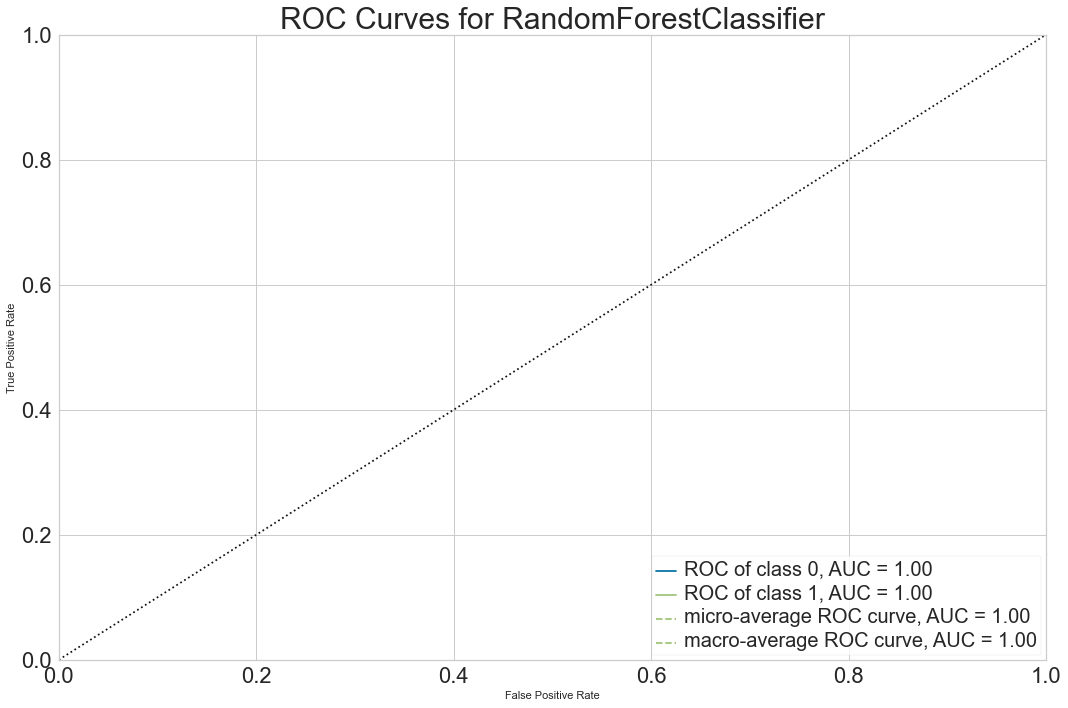

In [129]:
roc_viz = ROCAUC(RFClf,size=(1080, 720))
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)

#https://stackoverflow.com/questions/72217085/increase-font-size-of-title-labels-and-legend-for-yellowbrick-parallel-coordina
# Fit the visualizer and display it
roc_viz.finalize()  # creates title, legend, etc.
roc_viz.ax.tick_params(labelsize=22)  # change size of tick labels
roc_viz.ax.title.set_fontsize(30)  # change size of title

for text in roc_viz.ax.legend_.texts:  # change size of legend texts
     text.set_fontsize(20)

roc_viz.fig.tight_layout()  # fit all texts nicely into the surrounding figure
roc_viz.fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="FeatImpMod3"> </A> <h2>Importance of features with balanced target class.</h2>

In [130]:
HIC5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fraud                     99991 non-null  int64  
 1   tpa_fctzd                 99991 non-null  int64  
 2   member_id_fctzd           99991 non-null  int64  
 3   sex_fctzd                 99991 non-null  float64
 4   prod_code_fctzd           99991 non-null  int64  
 5   policy_type_fctzd         99991 non-null  int64  
 6   hosp_id_fctzd             99991 non-null  float64
 7   hosp_zipcd_fctzd          99991 non-null  int64  
 8   hosp_type_fctzd           99991 non-null  float64
 9   claim_amt                 99991 non-null  float64
 10  nursing_chg               99991 non-null  float64
 11  surgery_chg               99991 non-null  float64
 12  cons_fee                  99991 non-null  float64
 13  test_chg                  99991 non-null  float64
 14  pharma

From https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e 

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.<br>
Feature importance gives you a score for each feature of your data, **the higher the score more important or relevant is the feature towards your output variable**.<br>
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.01778196 0.09472931 0.01420346 0.0028519  0.02082697 0.04046681
 0.06491684 0.00823689 0.09288108 0.03346707 0.01893377 0.04532138
 0.03716047 0.04507934 0.0352167  0.00802422 0.01088006 0.00376328
 0.00406072 0.00227994 0.0862007  0.0106422  0.08639186 0.08628874
 0.04239494 0.08699941]


Text(0.5, 1.0, 'The higher the score the more relevant is the feature towards the output variable')

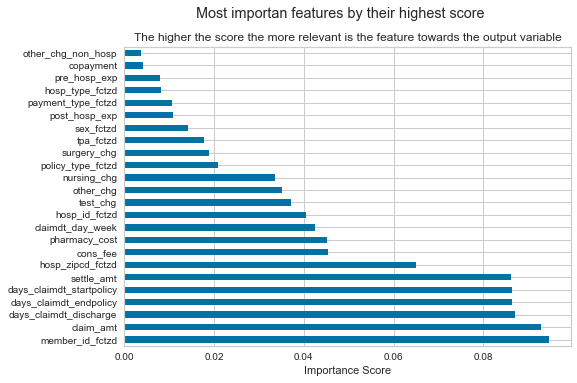

In [157]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(XGen,yGen)
#use inbuilt class or attribute "feature_importances" of RandomForestClassifier
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XGen.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.xlabel("Importance Score")
plt.suptitle("Most importan features by their highest score")
plt.title("The higher the score the more relevant is the feature towards the output variable")

As we can notice, the 10 most important characteristics are distributed within what we can consider the 3 groups of time with respect to the business perspective.<br>
>T1 features when the policy is issued:`policy_ref_fctzd`, `member_id_fctzd`<br>
>T2 features when the claim is generated: `claim_ref_fctzd`, `hosp_id_fctzd`, `hosp_zipcd_fctzd`
`claim_amt`,`cons_fee`,`test_chg`,`pharmacy_cost`.<br>
>T2 features when the claim is settled or paid:`settle_amt`.

With 2 functions for the first time group (T1), the system could identify a certain possibility of fraud in advance.<br> Thus, in the second phase (T2) with 7 more functions, the possibilities of identifying a fraud are increased.<br> Therefore, it might be more convenient to have more fraud indicators in the first time pool.<br> And for that purpose, date and time specific features could be very informative. Especially if these features serve as a foundation for features built more informative and predictive of fraud.

[0.01781479 0.09396699 0.01441269 0.00281098 0.0211956  0.04039465
 0.0649001  0.00820411 0.09313741 0.03379976 0.01920058 0.04524992
 0.03703899 0.04487338 0.03497824 0.00777752 0.01093955 0.00369611
 0.00415784 0.00216183 0.08638042 0.01025851 0.08646598 0.08717485
 0.04239674 0.08661246]


Text(0.5, 1.0, 'The higher the score the more relevant is the feature towards the output variable')

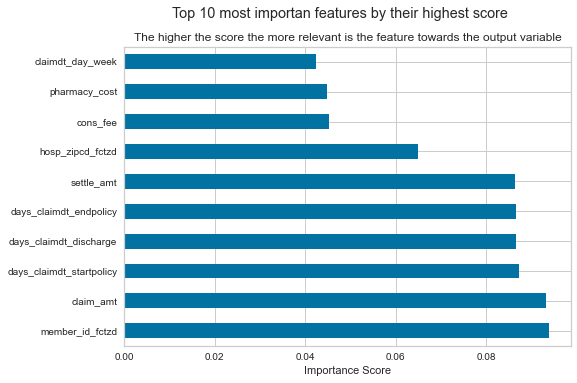

In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(XGen,yGen)
#use inbuilt class or attribute "feature_importances" of RandomForestClassifier
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XGen.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Importance Score")
plt.suptitle("Top 10 most importan features by their highest score")
plt.title("The higher the score the more relevant is the feature towards the output variable")

With the top 10 features, the model is overfitted. So instead of removing any of these 10 most important features, we should look for the least important features that could be removed from the model.<br> It is also important to note the point made by **Müller and Guido (2017)**:"...if a feature has a low value in feature_importance_, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information." <br>
Müller, A., & Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. O’Reilly.

In [135]:
# what if remove  top 10  important features to fraud?
cols_to_remove = ['member_id_fctzd', 'claim_amt', 'days_claimdt_startpolicy', 'days_claimdt_discharge',
                  'days_claimdt_endpolicy', 'settle_amt', 'hosp_zipcd_fctzd', 'cons_fee',
                  'pharmacy_cost', 'claimdt_day_week']

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf7 = RandomForestClassifier(random_state=0)
rf7.fit( X_train_ros [ [c for c in X_train_ros.columns
                    if c not in cols_to_remove]
                 ], y_train_ros)
rf7.score( X_test[ [c for c in X_train_ros.columns
                     if c not in cols_to_remove]
                   ],y_test)

0.8258260660852869

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="4FeatImp"> </A> <h2>What if create the model with only 4 out of top 10  important features to fraud?</h2>

What if create the model with only 4 out of top 10  important features to fraud?

In [169]:
HICT10=HIC5[['fraud','member_id_fctzd', 'days_claimdt_startpolicy', 
             'days_claimdt_discharge', 'days_claimdt_endpolicy']]

In [170]:
HICT10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fraud                     99991 non-null  int64  
 1   member_id_fctzd           99991 non-null  int64  
 2   days_claimdt_startpolicy  99991 non-null  float64
 3   days_claimdt_discharge    99991 non-null  float64
 4   days_claimdt_endpolicy    99991 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.8 MB


In [171]:
# separate the features and targets
yGenT10=HICT10['fraud']  # selects the first column fraud as target
XGenT10=HICT10.drop(['fraud'], axis=1) 

In [172]:
yGenT10.head()

0    1
1    0
2    1
3    0
4    0
Name: fraud, dtype: int64

In [173]:
XGenT10.head()

member_id_fctzd  days_claimdt_startpolicy  days_claimdt_discharge  \
0                0                      0.30                    0.28   
1                1                      0.18                    0.18   
2                2                      0.37                    0.27   
3                2                      0.37                    0.23   
4                2                      0.36                    0.27   

   days_claimdt_endpolicy  
0                    0.59  
1                    0.67  
2                    0.52  
3                    0.52  
4                    0.53

In [174]:
# train_test spliting 
from sklearn.model_selection import train_test_split
X_trainT10, X_testT10, y_trainT10, y_testT10 = train_test_split(XGenT10, yGenT10, random_state=0)

In [175]:
rosT10 = RandomOverSampler(random_state=0)

In [176]:
# fit predictor and target variable
X_train_rosT10, y_train_rosT10 = rosT10.fit_resample(XGenT10, yGenT10)

In [177]:
# RandomForestClassifier  X_train_rosT10, y_train_rosT10
RFClf = RandomForestClassifier().fit(X_train_rosT10, y_train_rosT10)
print("Accuracy on training set: {:.3f}".format(RFClf.score(X_train_rosT10, y_train_rosT10)))
print("Accuracy on test set: {:.3f}".format(RFClf.score(X_testT10, y_testT10)))
y_pred = RFClf.predict(X_testT10)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_testT10, y_pred)
print(cf_matrix)

Accuracy on training set: 0.999
Accuracy on test set: 0.999
[[19413    29]
 [    3  5553]]


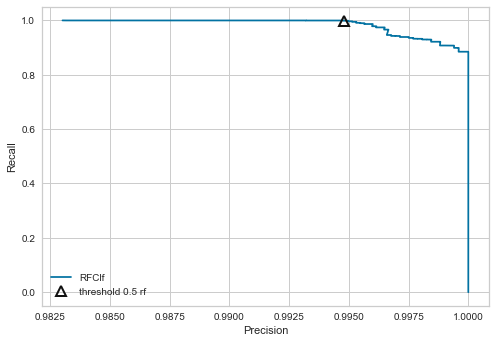

In [180]:
from sklearn.metrics import precision_recall_curve
precision_RFClf, recall_RFClf, thresholds_RFClf= precision_recall_curve(y_testT10, RFClf.predict_proba(X_testT10)[:, 1])
plt.plot(precision_RFClf, recall_RFClf, label="RFClf")
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(precision_RFClf[close_default_RFClf], recall_RFClf[close_default_RFClf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

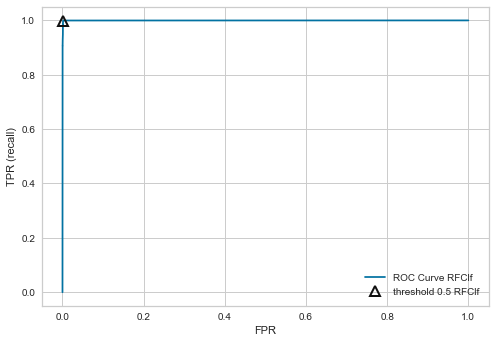

In [181]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_RFClf, tpr_RFClf, thresholds_RFClf = roc_curve(y_testT10, RFClf.predict_proba(X_testT10)[:, 1])
#plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_RFClf, tpr_RFClf, label="ROC Curve RFClf")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
#plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(fpr_RFClf[close_default_RFClf], tpr_RFClf[close_default_RFClf], '^', markersize=10, 
         label="threshold 0.5 RFClf", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [182]:
RFClf_auc = roc_auc_score(y_testT10, RFClf.predict_proba(X_testT10)[:, 1])
print("AUC for Random Forest: {:.3f}".format(RFClf_auc))

AUC for Random Forest: 1.000


C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\conza\AppData\Local\Temp\ipykernel_20220\3992481314.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  roc_viz.fig.show()


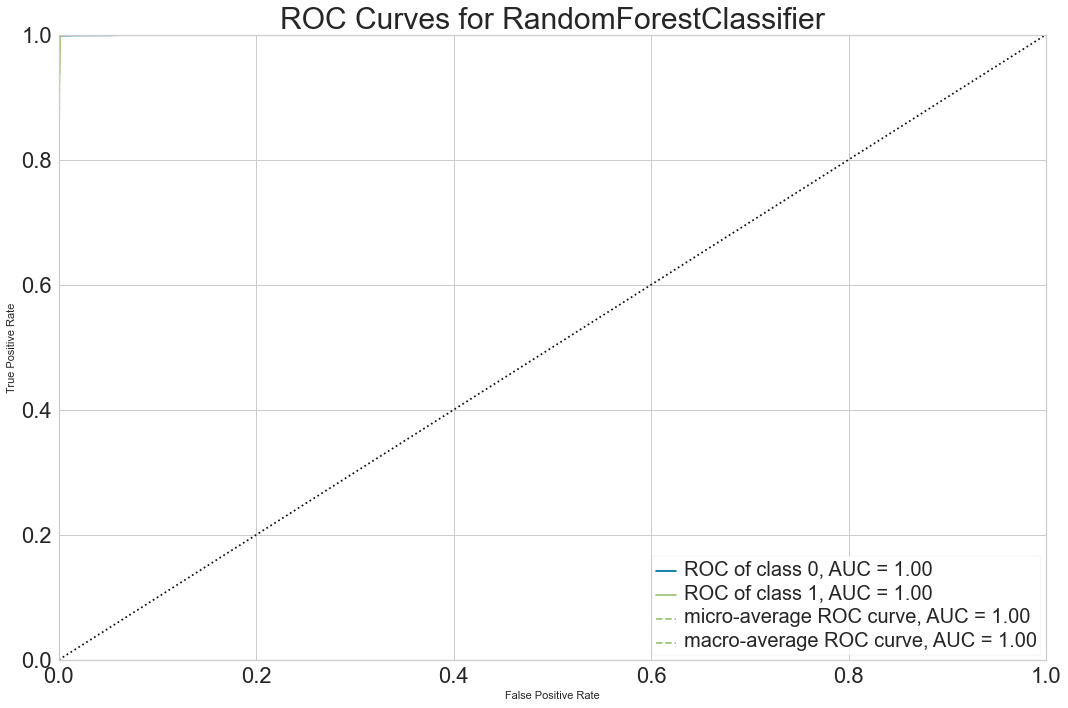

In [183]:
roc_viz = ROCAUC(RFClf,size=(1080, 720))
roc_viz.fit(X_trainT10, y_trainT10)
roc_viz.score(X_testT10, y_testT10)

#https://stackoverflow.com/questions/72217085/increase-font-size-of-title-labels-and-legend-for-yellowbrick-parallel-coordina
# Fit the visualizer and display it
roc_viz.finalize()  # creates title, legend, etc.
roc_viz.ax.tick_params(labelsize=22)  # change size of tick labels
roc_viz.ax.title.set_fontsize(30)  # change size of title

for text in roc_viz.ax.legend_.texts:  # change size of legend texts
     text.set_fontsize(20)

roc_viz.fig.tight_layout()  # fit all texts nicely into the surrounding figure
roc_viz.fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="USTomek"> </A> <h3>Under-sampling: Tomek links</h3>

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.<br>
Tomek’s link exists if the two samples are the nearest neighbors of each other.

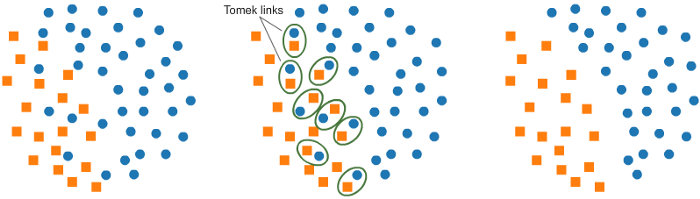

<span style='background:bisque'>Running "Tomek links" is perceived to require much more time and machine resources than `RandomOverSampler`. This could be an additional drawback to sampling that reduces the number of the majority classes (not frauds).</span>

In the code below, the ratio='majority' is used  to resample the majority class.

In [178]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
X_train_t1, y_train_t1 = tl.fit_sample(XGen, yGen)

print('Original dataset shape:', Counter(yGen))
print('Resample dataset shape:', Counter(y_train_t1))

Original dataset shape: Counter({0: 78302, 1: 21689})
Resample dataset shape: Counter({0: 69687, 1: 21689})


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="RFCl_Tomek"> </A> <h3>Random Forest Classifier with Under-sampling: Tomek links</h3>

In [184]:
# RandomForestClassifier  X_train_t1, y_train_t1
RFClf = RandomForestClassifier().fit( X_train_t1, y_train_t1)
print("Accuracy on training set: {:.3f}".format(RFClf.score( X_train_t1, y_train_t1)))
print("Accuracy on test set: {:.3f}".format(RFClf.score(X_test, y_test)))
y_pred = RFClf.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 1.000
Accuracy on test set: 0.998
[[19400    42]
 [    0  5556]]


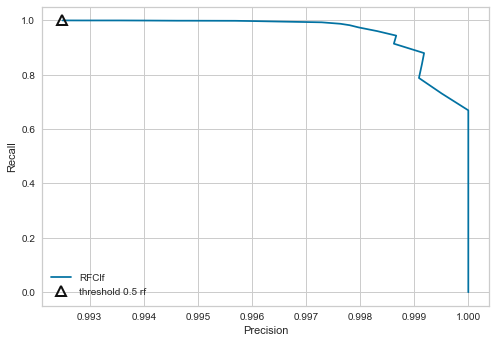

In [185]:
precision_RFClf, recall_RFClf, thresholds_RFClf= precision_recall_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
plt.plot(precision_RFClf, recall_RFClf, label="RFClf")
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(precision_RFClf[close_default_RFClf], recall_RFClf[close_default_RFClf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

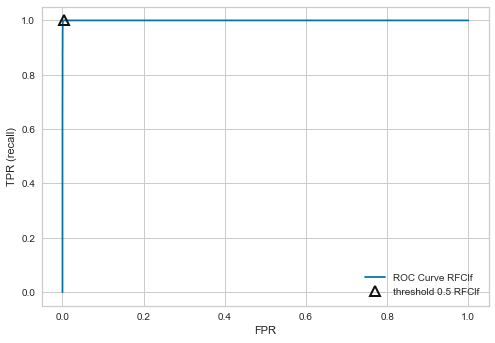

In [186]:
fpr_RFClf, tpr_RFClf, thresholds_RFClf = roc_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
#plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_RFClf, tpr_RFClf, label="ROC Curve RFClf")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
#plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(fpr_RFClf[close_default_RFClf], tpr_RFClf[close_default_RFClf], '^', markersize=10, 
         label="threshold 0.5 RFClf", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [187]:
RFClf_auc = roc_auc_score(y_test, RFClf.predict_proba(X_test)[:, 1])
print("AUC for Random Forest: {:.3f}".format(RFClf_auc))

AUC for Random Forest: 1.000


C:\Users\conza\Anaconda3\envs\JupyterEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\conza\AppData\Local\Temp\ipykernel_20220\3744799080.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  roc_viz.fig.show()


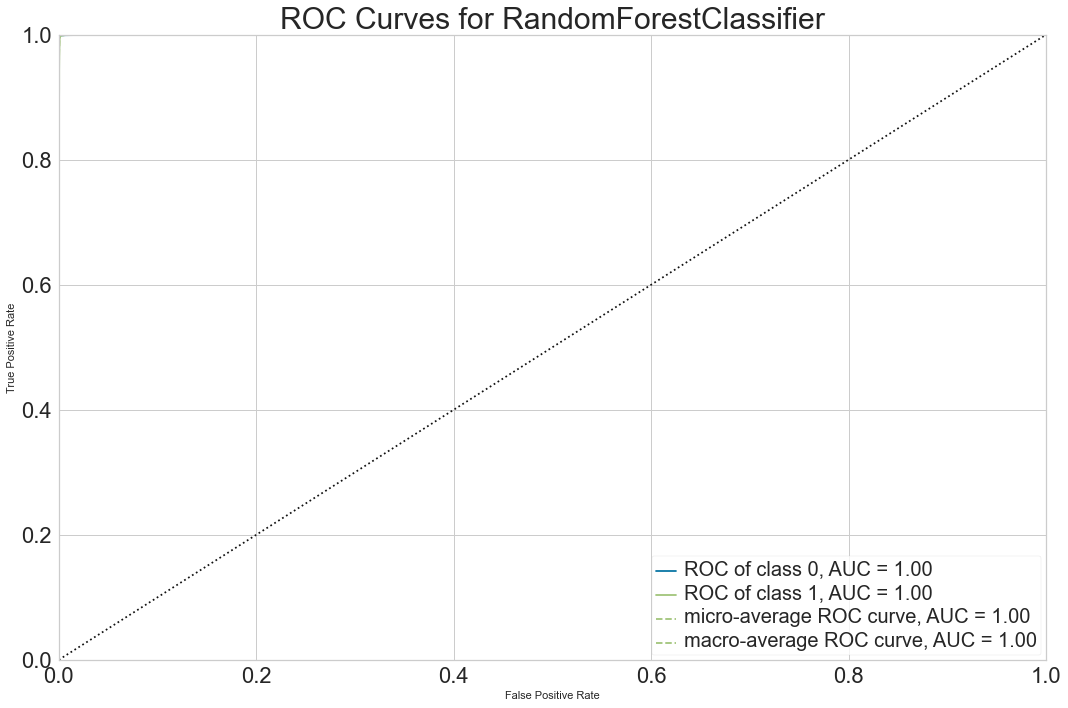

In [188]:
roc_viz = ROCAUC(RFClf,size=(1080, 720))
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)

#https://stackoverflow.com/questions/72217085/increase-font-size-of-title-labels-and-legend-for-yellowbrick-parallel-coordina
# Fit the visualizer and display it
roc_viz.finalize()  # creates title, legend, etc.
roc_viz.ax.tick_params(labelsize=22)  # change size of tick labels
roc_viz.ax.title.set_fontsize(30)  # change size of title

for text in roc_viz.ax.legend_.texts:  # change size of legend texts
     text.set_fontsize(20)

roc_viz.fig.tight_layout()  # fit all texts nicely into the surrounding figure
roc_viz.fig.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="smote"> </A> <h3>Synthetic minority over-sampling technique(SMOTE)</h3>

This technique generates synthetic data for the minority class.<br>
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

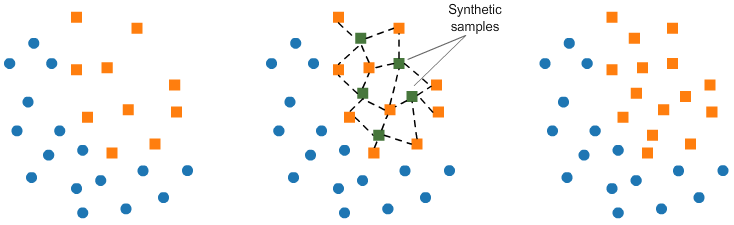

SMOTE algorithm works in 4 simple steps:<br>

1. Choose a minority class as the input vector.<br>
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).<br>
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.<br>
4. Repeat the steps until data is balanced.<br>

In [189]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
X_train_smote , y_train_smote = smote.fit_sample(XGen, yGen)

print('Origianl dataset shape:', Counter(yGen))
print('Resampple dataset shape:', Counter(y_train_smote))

Origianl dataset shape: Counter({0: 78302, 1: 21689})
Resampple dataset shape: Counter({1: 78302, 0: 78302})


<span style='background:lightblue'>SMOTE is perceived to take similar time and machine resources as `RandomOverSampler`.</span>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="RFClSMOTE"> </A> <h3>Random Forest Classifier with over-sampling: SMOTE</h3>

In [190]:
# RandomForestClassifier  X_train_t1, y_train_t1
RFClf = RandomForestClassifier().fit( X_train_smote, y_train_smote)
print("Accuracy on training set: {:.3f}".format(RFClf.score( X_train_smote, y_train_smote)))
print("Accuracy on test set: {:.3f}".format(RFClf.score(X_test, y_test)))
y_pred = RFClf.predict(X_test)
y_pred = np.round(y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
[[19442     0]
 [    0  5556]]


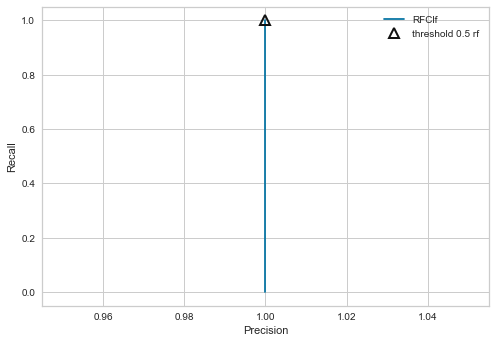

In [191]:
precision_RFClf, recall_RFClf, thresholds_RFClf= precision_recall_curve(y_test, RFClf.predict_proba(X_test)[:, 1])
plt.plot(precision_RFClf, recall_RFClf, label="RFClf")
close_default_RFClf = np.argmin(np.abs(thresholds_RFClf - 0.5))
plt.plot(precision_RFClf[close_default_RFClf], recall_RFClf[close_default_RFClf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>

<A name="References"> </A> <h1>References</h1>

Harrison, M. (2019). Machine Learning Pocket Reference: Working with Structured Data in Python. O’Reilly.

McKinney, W. (2018). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 2nd. Ed. O’Reilly

Müller, A., & Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. O’Reilly.

Pochiraju, B., Seshadri, S., & (Editors). (2019). Essentials of Business Analytics: An Introduction to the Methodology and its Applications. Springer.

 Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. A Practical Implementation Guide to Predictive Data Analytics Using Python (2nd Ed.). Apress.

 Verdhan, V. (2020). Supervised Learning with Python: Concepts and Practical Implementation Using Python. Apress.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#TableOfContents">Return to Table of Contents</a></li>
    </ul>
</div>